In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### The dataset contain sales of differenet items take place in different countries of different region. It comprises online as well as offline sale with different order priority.

### Reading the dataset.

In [4]:
df=pd.read_csv("sales.csv")

In [5]:
df.head()

Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M  11-07-2011  185941302  12-08-2011        3018      154.06   
2              C  10/31/2016  246222341  12-09-2016        1517      255.28   
3              C  04-10-2010  161442649  05-12-2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.20  2224085.18    1468506.02  
1      90.93      464953.08   274426.74     190526.34  
2     159.42      387259.76   241840.14     145419.62  
3     117.11      683335.40   389039.42     294295.98  
4       6.92       91853.85    68127.40      23726.45

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


### There are total 14 columns and 1000 rows in dataset.

### Checking whether any null value present in dataset.

In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### There is no null value present in dataset.

### EDA

### From dataset we get to know that the Order Date and Ship Date columns are having different format values. So we will change the format and keep the identical format for all values.

In [8]:
from datetime import datetime

In [9]:
def parse_date(date_str):
    for fmt in ("%m/%d/%Y", "%m-%d-%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"Date format for '{date_str}' not recognized")

df['std_Ship Date'] = [parse_date(i).strftime("%Y-%m-%d") for i in df['Ship Date']]

In [10]:
df['std_Ship Date'].head()

0    2014-10-31
1    2011-12-08
2    2016-12-09
3    2010-05-12
4    2011-08-31
Name: std_Ship Date, dtype: object

In [11]:
df['std_Order Date'] = [parse_date(i).strftime("%Y-%m-%d") for i in df['Order Date']]

In [12]:
df['std_Order Date'].head()

0    2014-10-18
1    2011-11-07
2    2016-10-31
3    2010-04-10
4    2011-08-16
Name: std_Order Date, dtype: object

### Checking the head of dataset.

In [13]:
df.head()

Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M  11-07-2011  185941302  12-08-2011        3018      154.06   
2              C  10/31/2016  246222341  12-09-2016        1517      255.28   
3              C  04-10-2010  161442649  05-12-2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit std_Ship Date  \
0     263.33     3692591.20  2224085.18    1468506.02    2014-10-31   
1      90.93      464953.08   274426.74     190526.34    2011-12-08   
2     159.42      387259.76   241840.14     145419.62    2016-12-09   
3     117.11      683335.40   389039.42     294295.98    2010-05-12   
4       6.92       91853.85    68127.40      23726.45    2011-08-31   

  std_Order Date  
0     2014-10-18  
1     2011-11-07  
2     2016-10-31  
3     2010-04-10  
4     2011-08-16

### Now we can calculate actual days required to ship the orders.

In [14]:
df['Days to Ship'] = ((pd.to_datetime(df['std_Ship Date'], format='%Y-%m-%d')) - (pd.to_datetime(df['std_Order Date'], format='%Y-%m-%d'))).dt.days

In [15]:
df.head()

Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M  11-07-2011  185941302  12-08-2011        3018      154.06   
2              C  10/31/2016  246222341  12-09-2016        1517      255.28   
3              C  04-10-2010  161442649  05-12-2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit std_Ship Date  \
0     263.33     3692591.20  2224085.18    1468506.02    2014-10-31   
1      90.93      464953.08   274426.74     190526.34    2011-12-08   
2     159.42      387259.76   241840.14     145419.62    2016-12-09   
3     117.11      683335.40   389039.42     294295.98    2010-05-12   
4       6.92       91853.85    68127.40      23726.45    2011-08-31   

  std_Order Date  Days to Ship  
0     2014-10-18            13  
1     2011-11-07            31  
2     2016-10-31            39  
3     2010-04-10            32  
4     2011-08-16            15

### Plotting Count Plot for various column of dataframe.

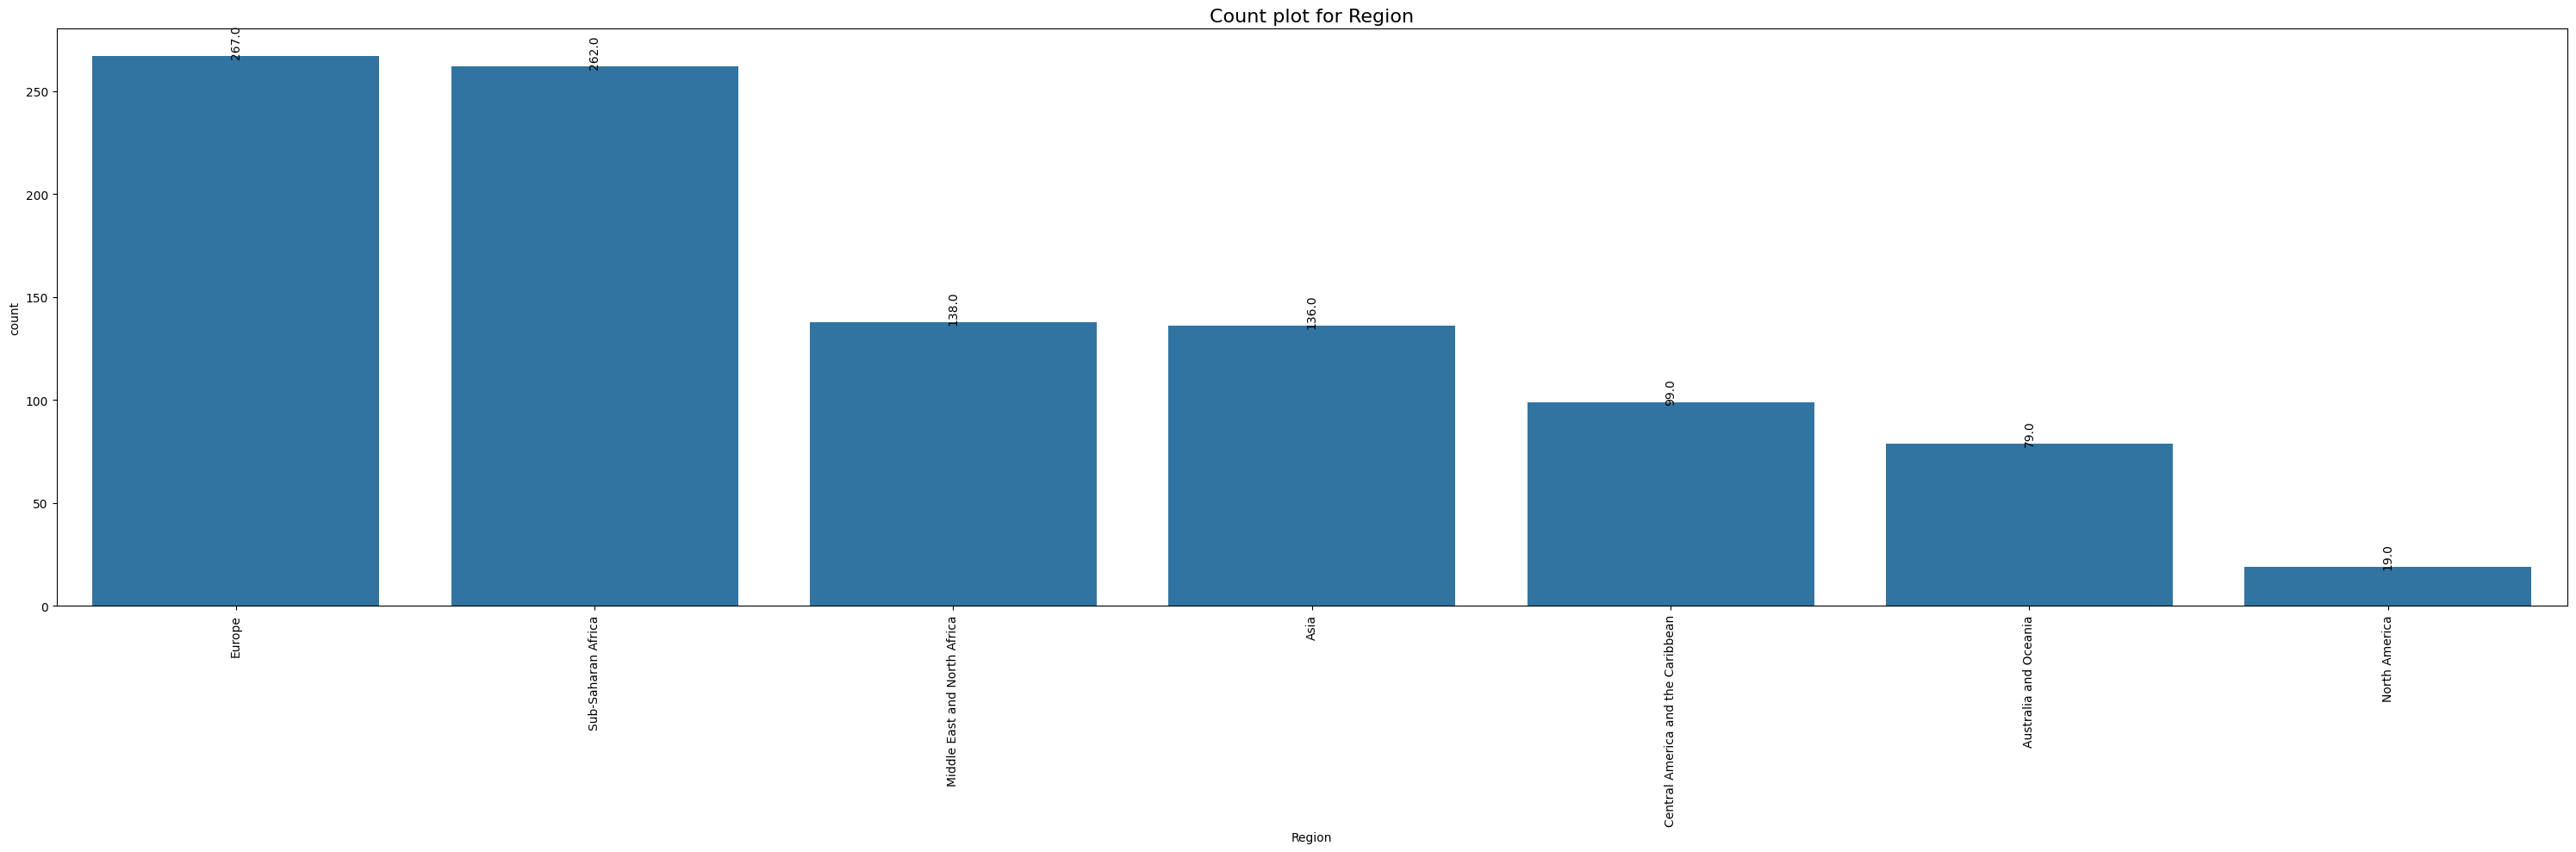

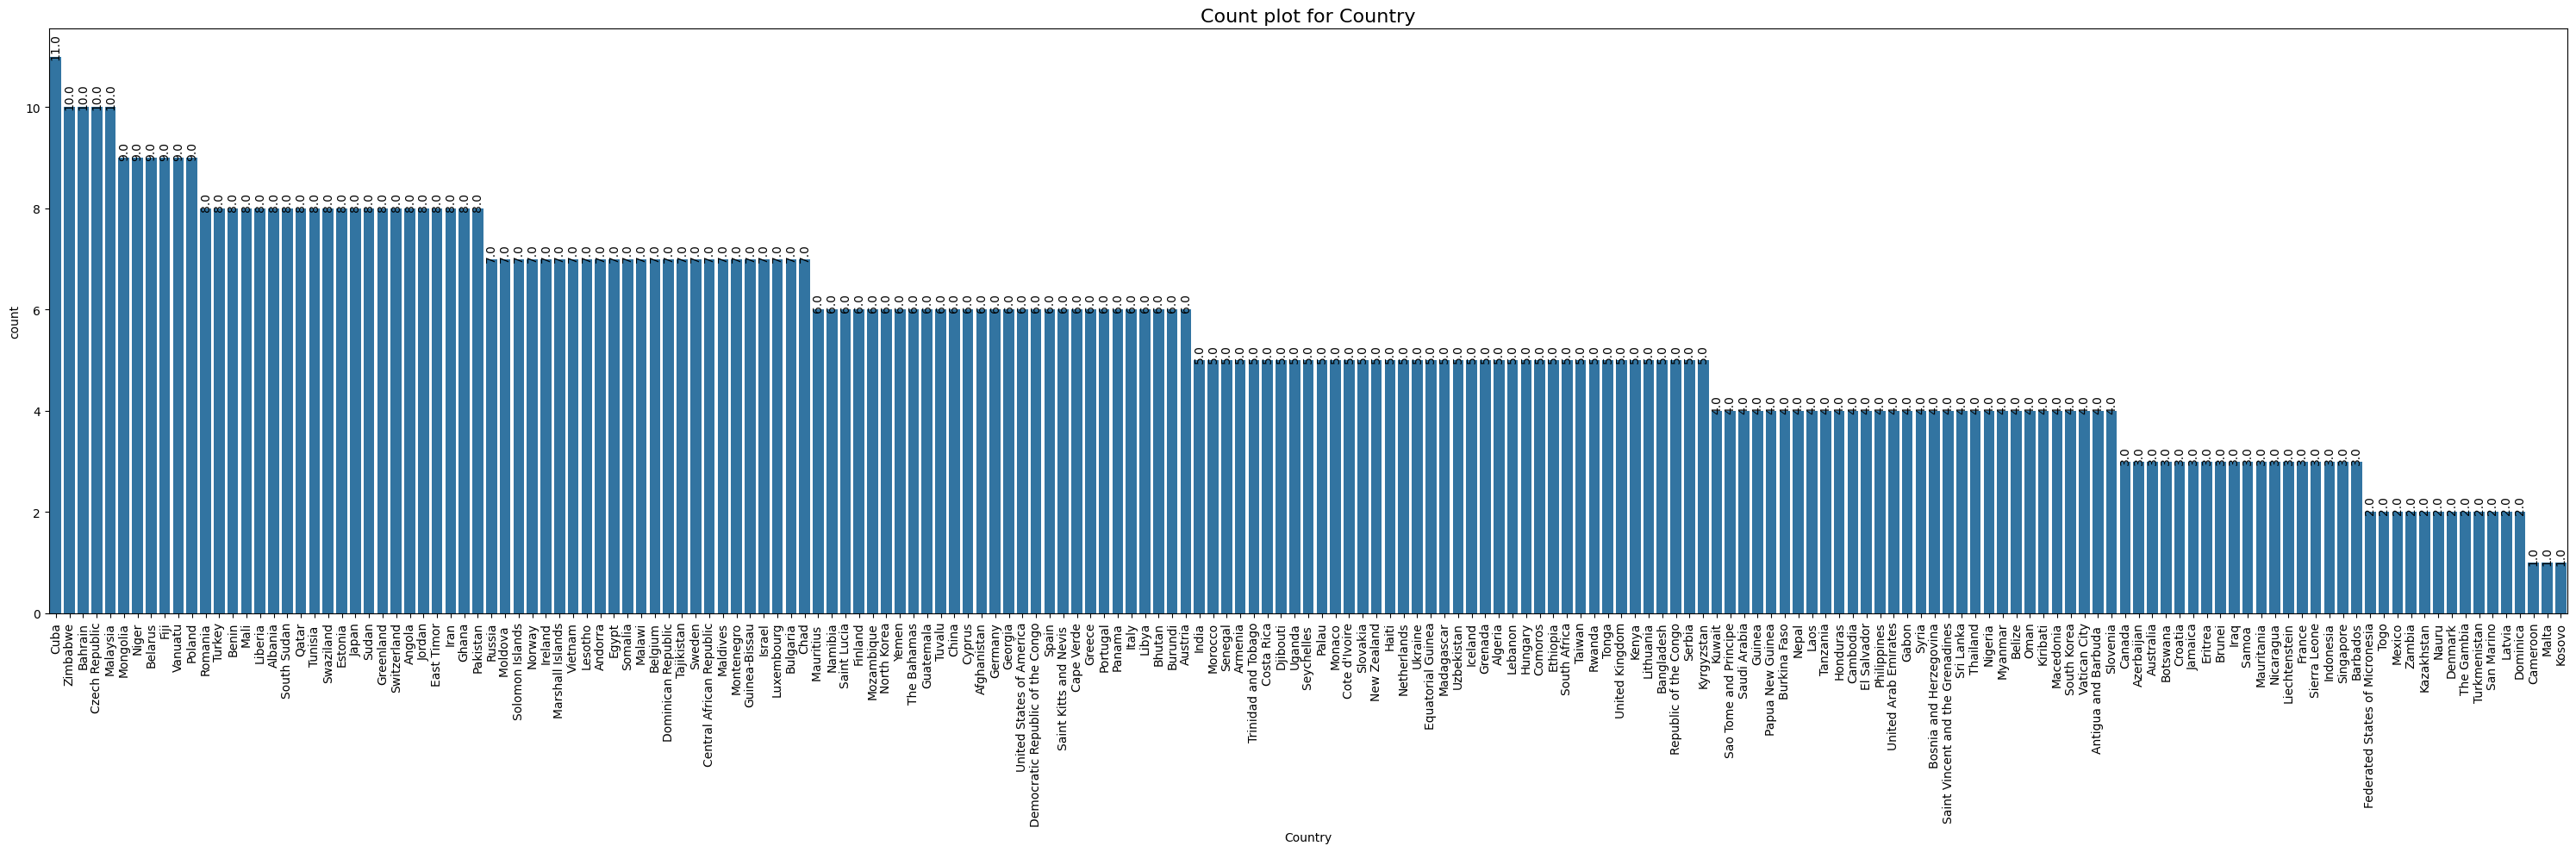

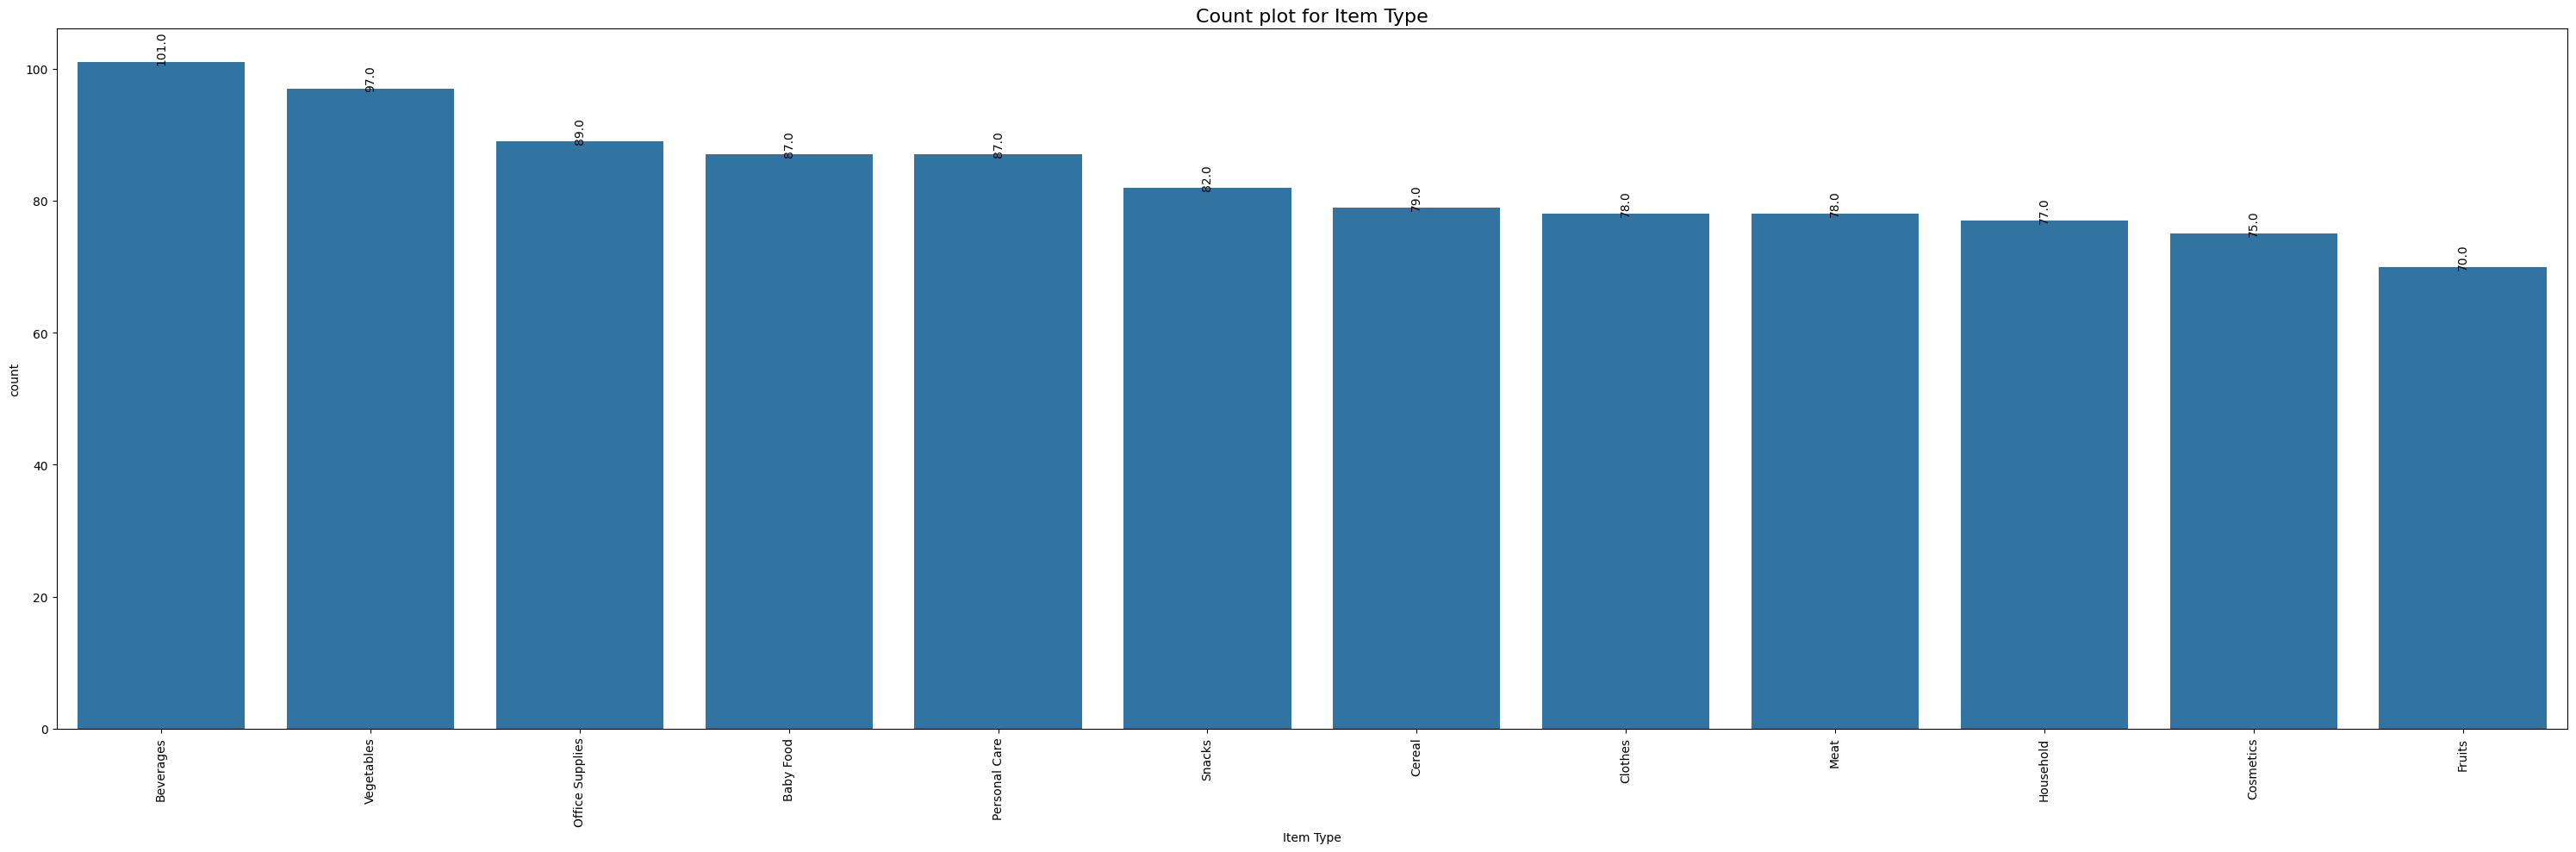

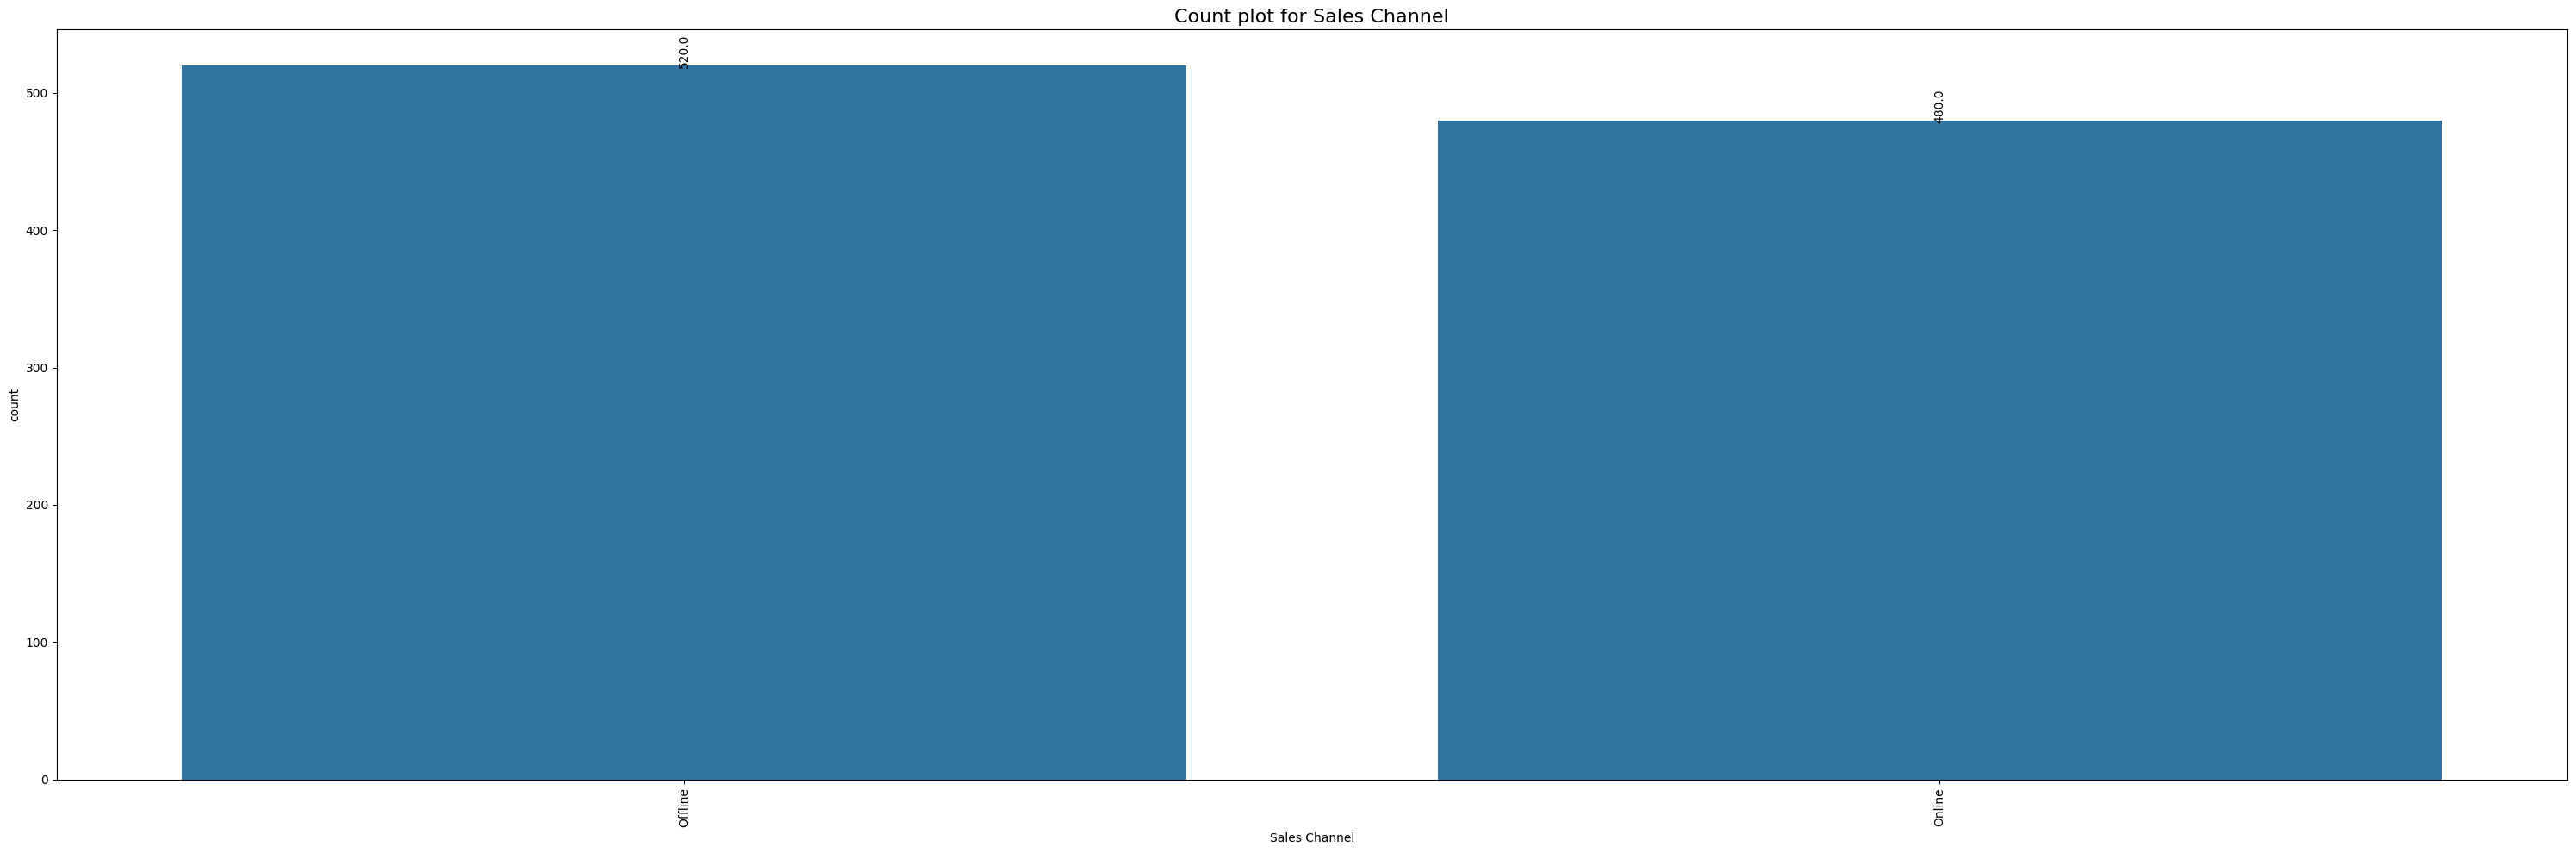

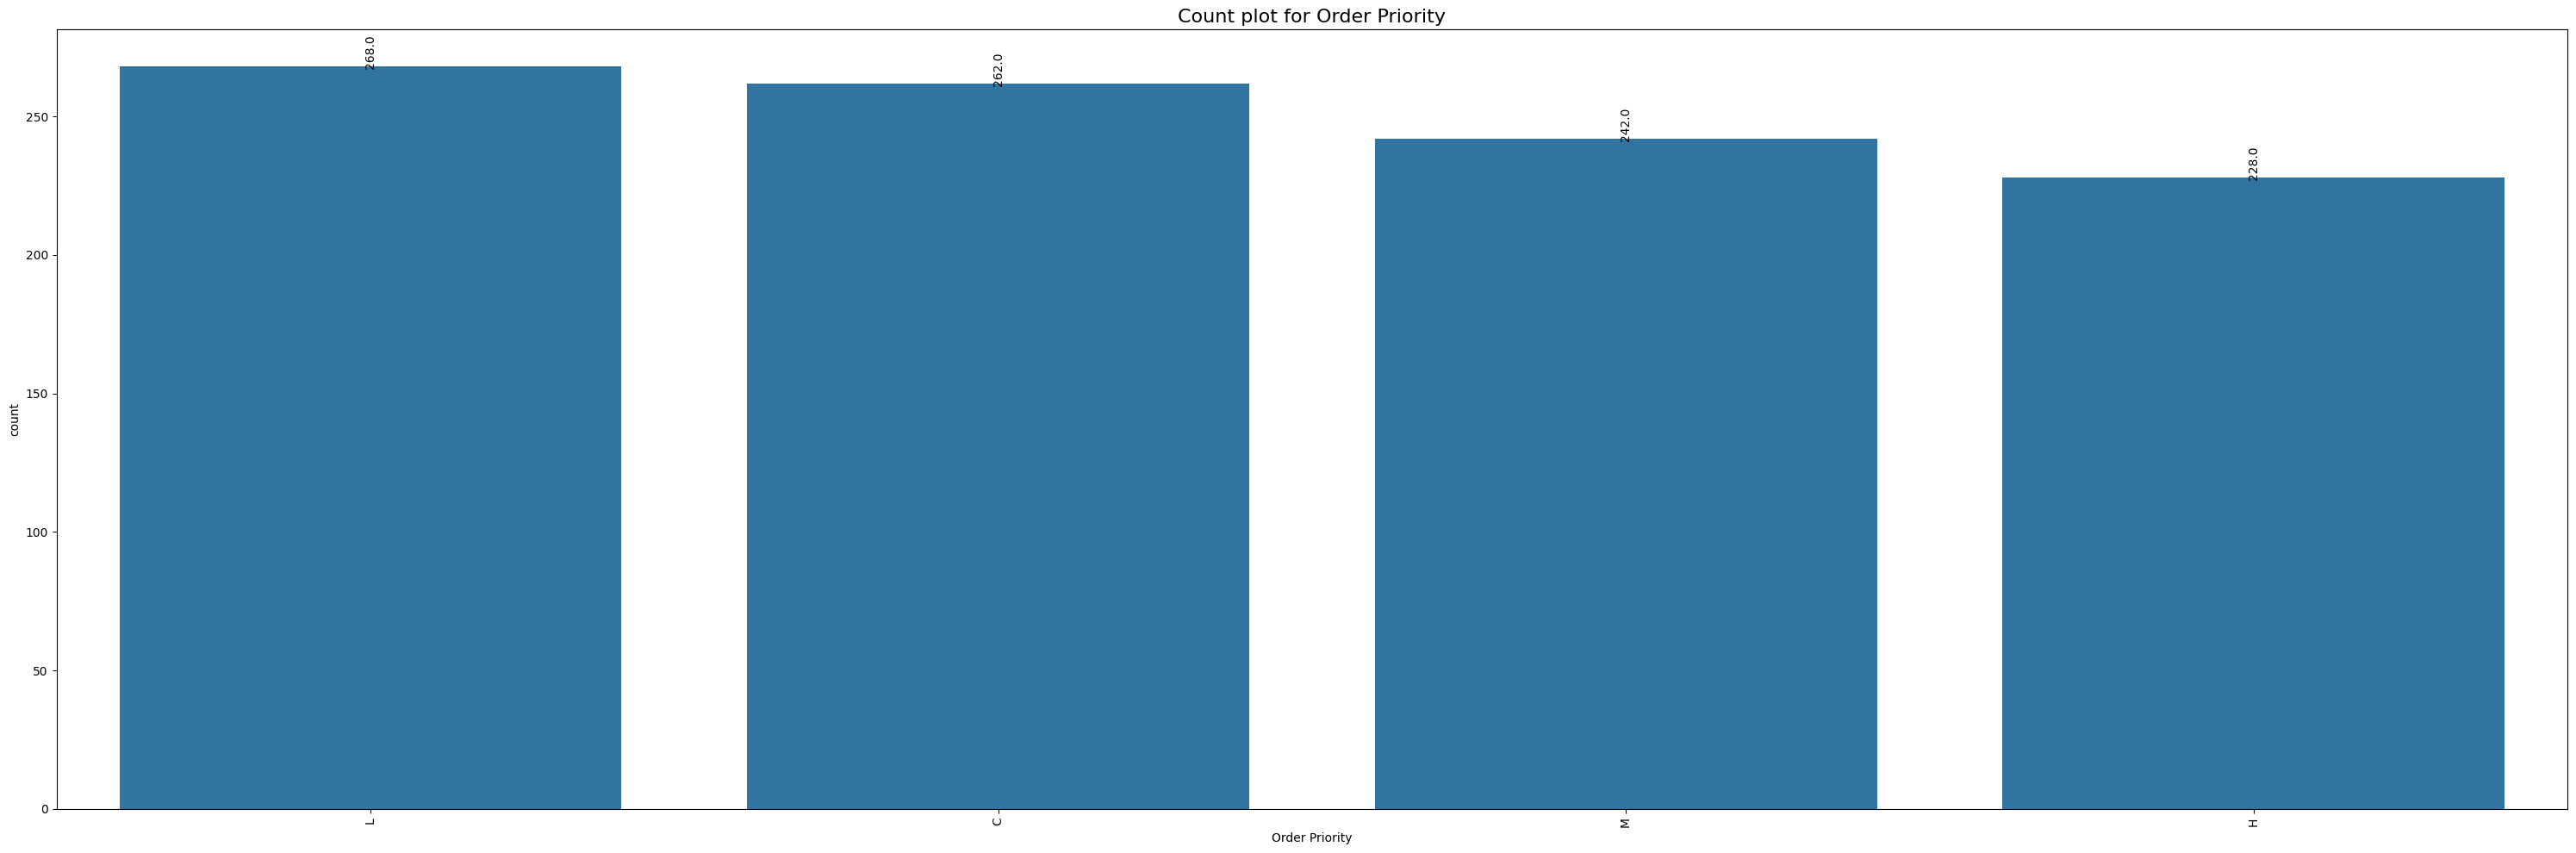

In [16]:
for i in df.columns:
    if i in ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']:
        plt.figure(figsize=(30,10))
        ax=sns.countplot(data=df, x=i, order = df[i].value_counts().index)
        plt.xticks(rotation=90)
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ p.get_width() / 2, p.get_height()),ha='center',rotation=90)
        plt.title(f'Count plot for {i}', fontsize=16)
        plt.tight_layout()
        plt.show()

### Maximum and minimum total profit by each region.

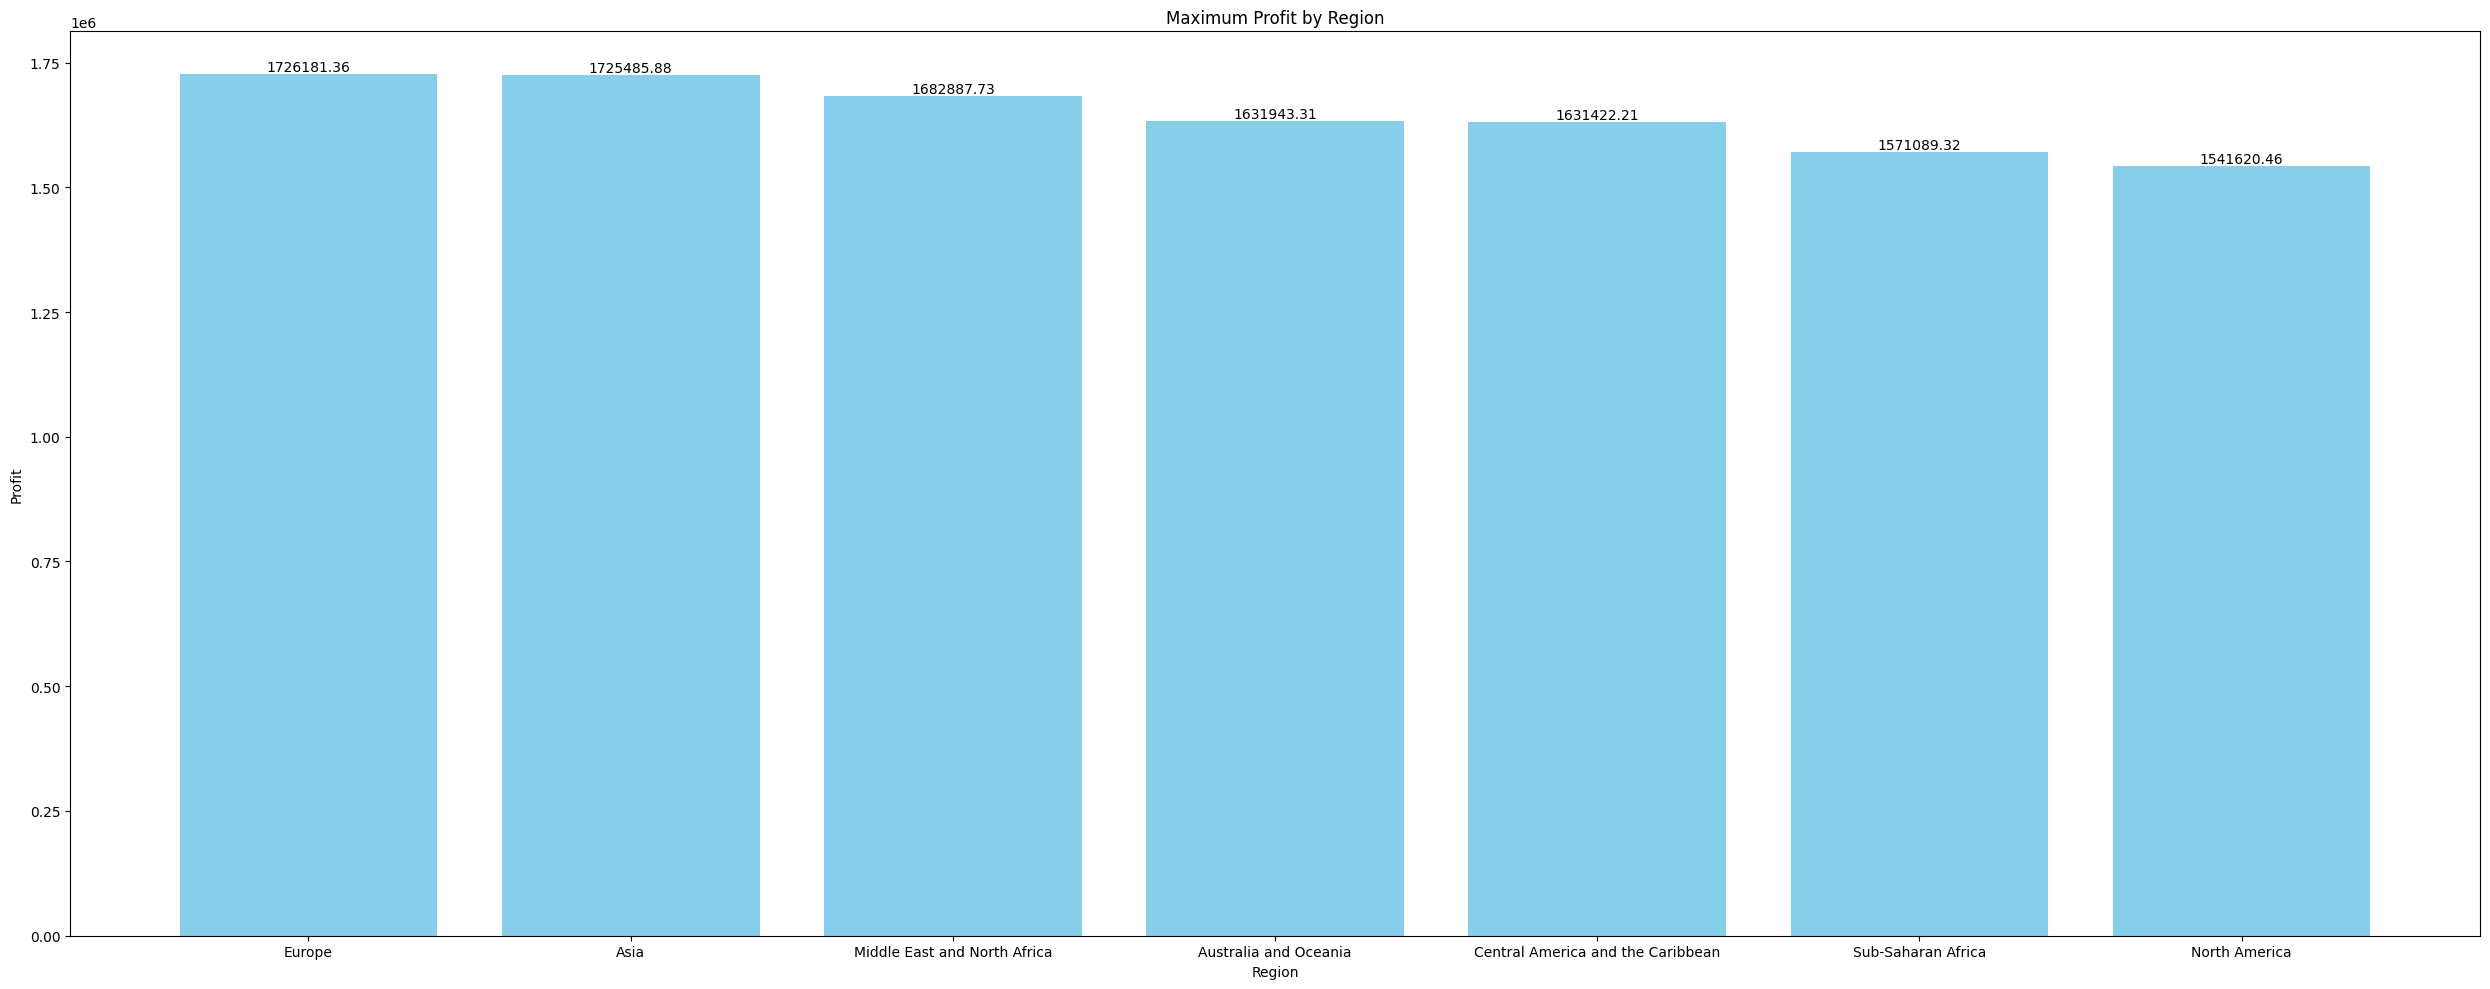

In [17]:
max_profit=df.groupby('Region')['Total Profit'].max()
sorted_max_profit=max_profit.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(sorted_max_profit.index, sorted_max_profit.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Maximum Profit by Region')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the maximum profit for each Region
for i, profit in enumerate(sorted_max_profit):
    plt.text(i, profit, f"{profit}", ha='center', va='bottom', rotation=0)

plt.show()

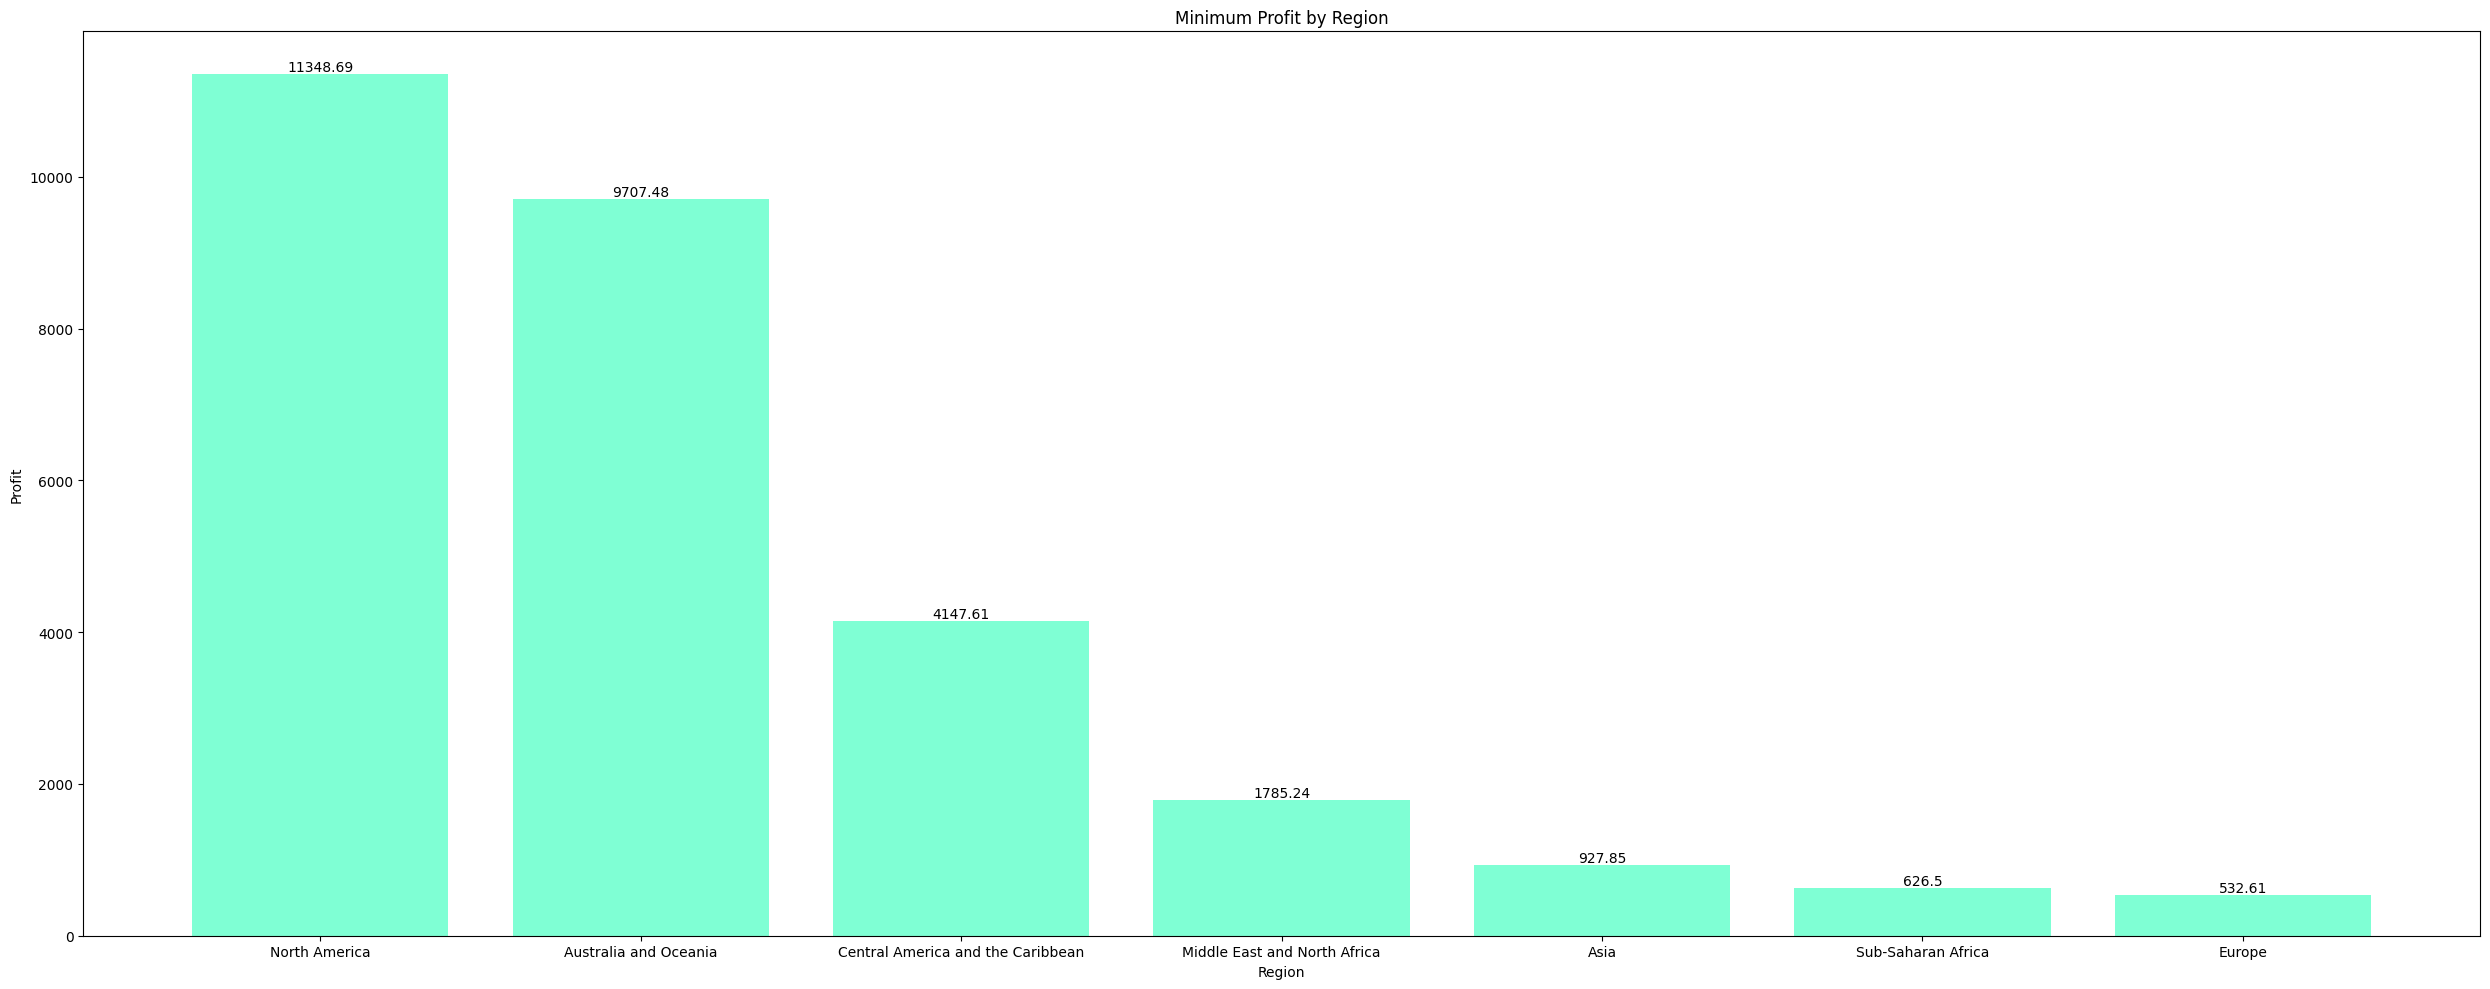

In [18]:
min_profit=df.groupby('Region')['Total Profit'].min()
sorted_min_profit=min_profit.sort_values (ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(sorted_min_profit.index, sorted_min_profit.values, color='aquamarine')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Minimum Profit by Region')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
# Annotate the minimum profit for each Region
for i, profit in enumerate(sorted_min_profit):
    plt.text(i, profit, f"{profit}", ha='center', va='bottom', rotation=0)

plt.show()

### Total profit as per each region, country, Item type, Sales channel, and order priority.

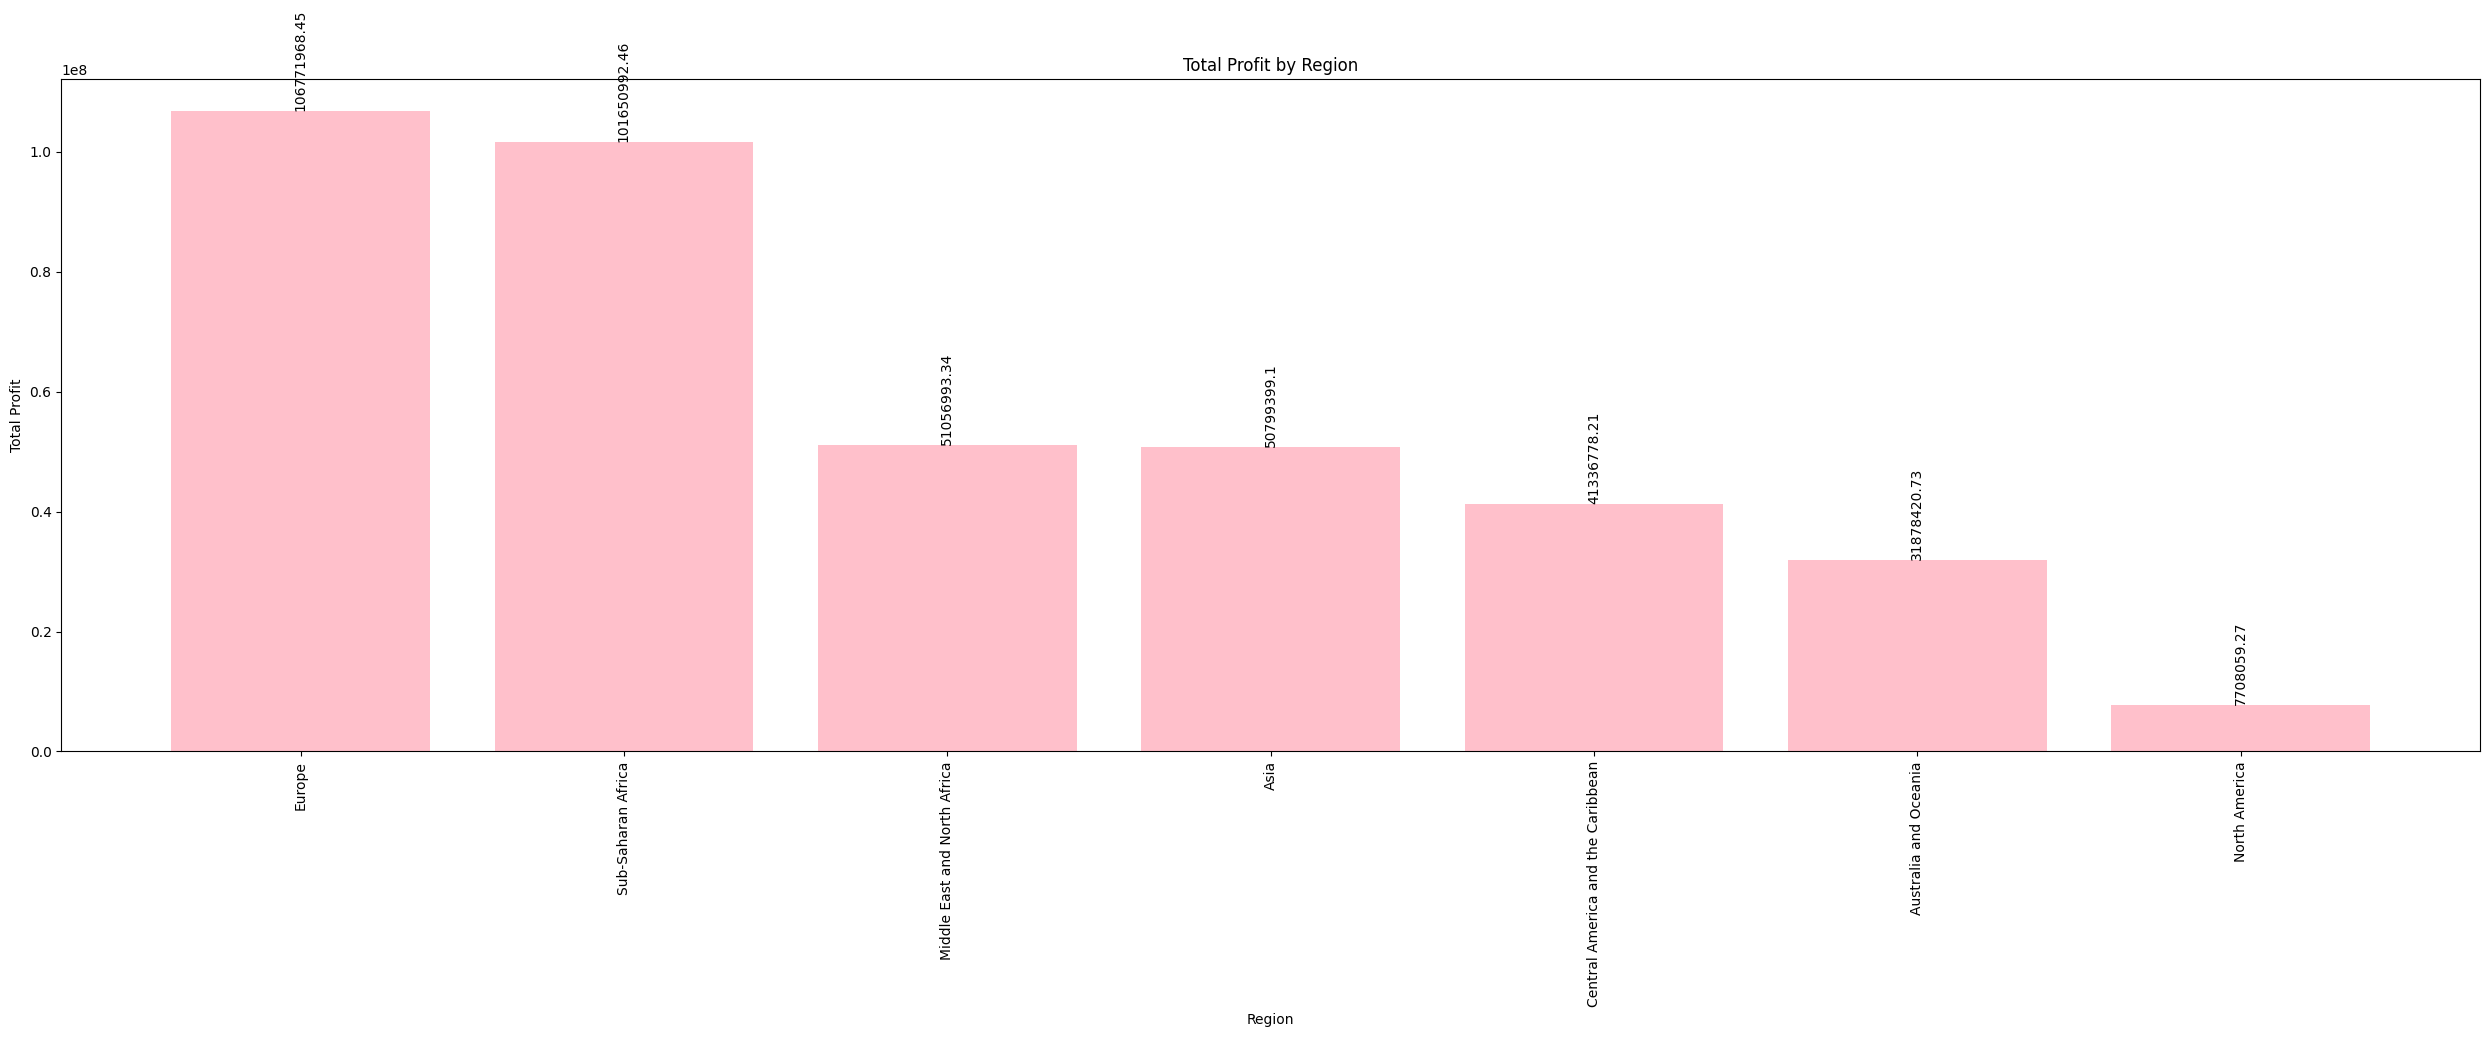

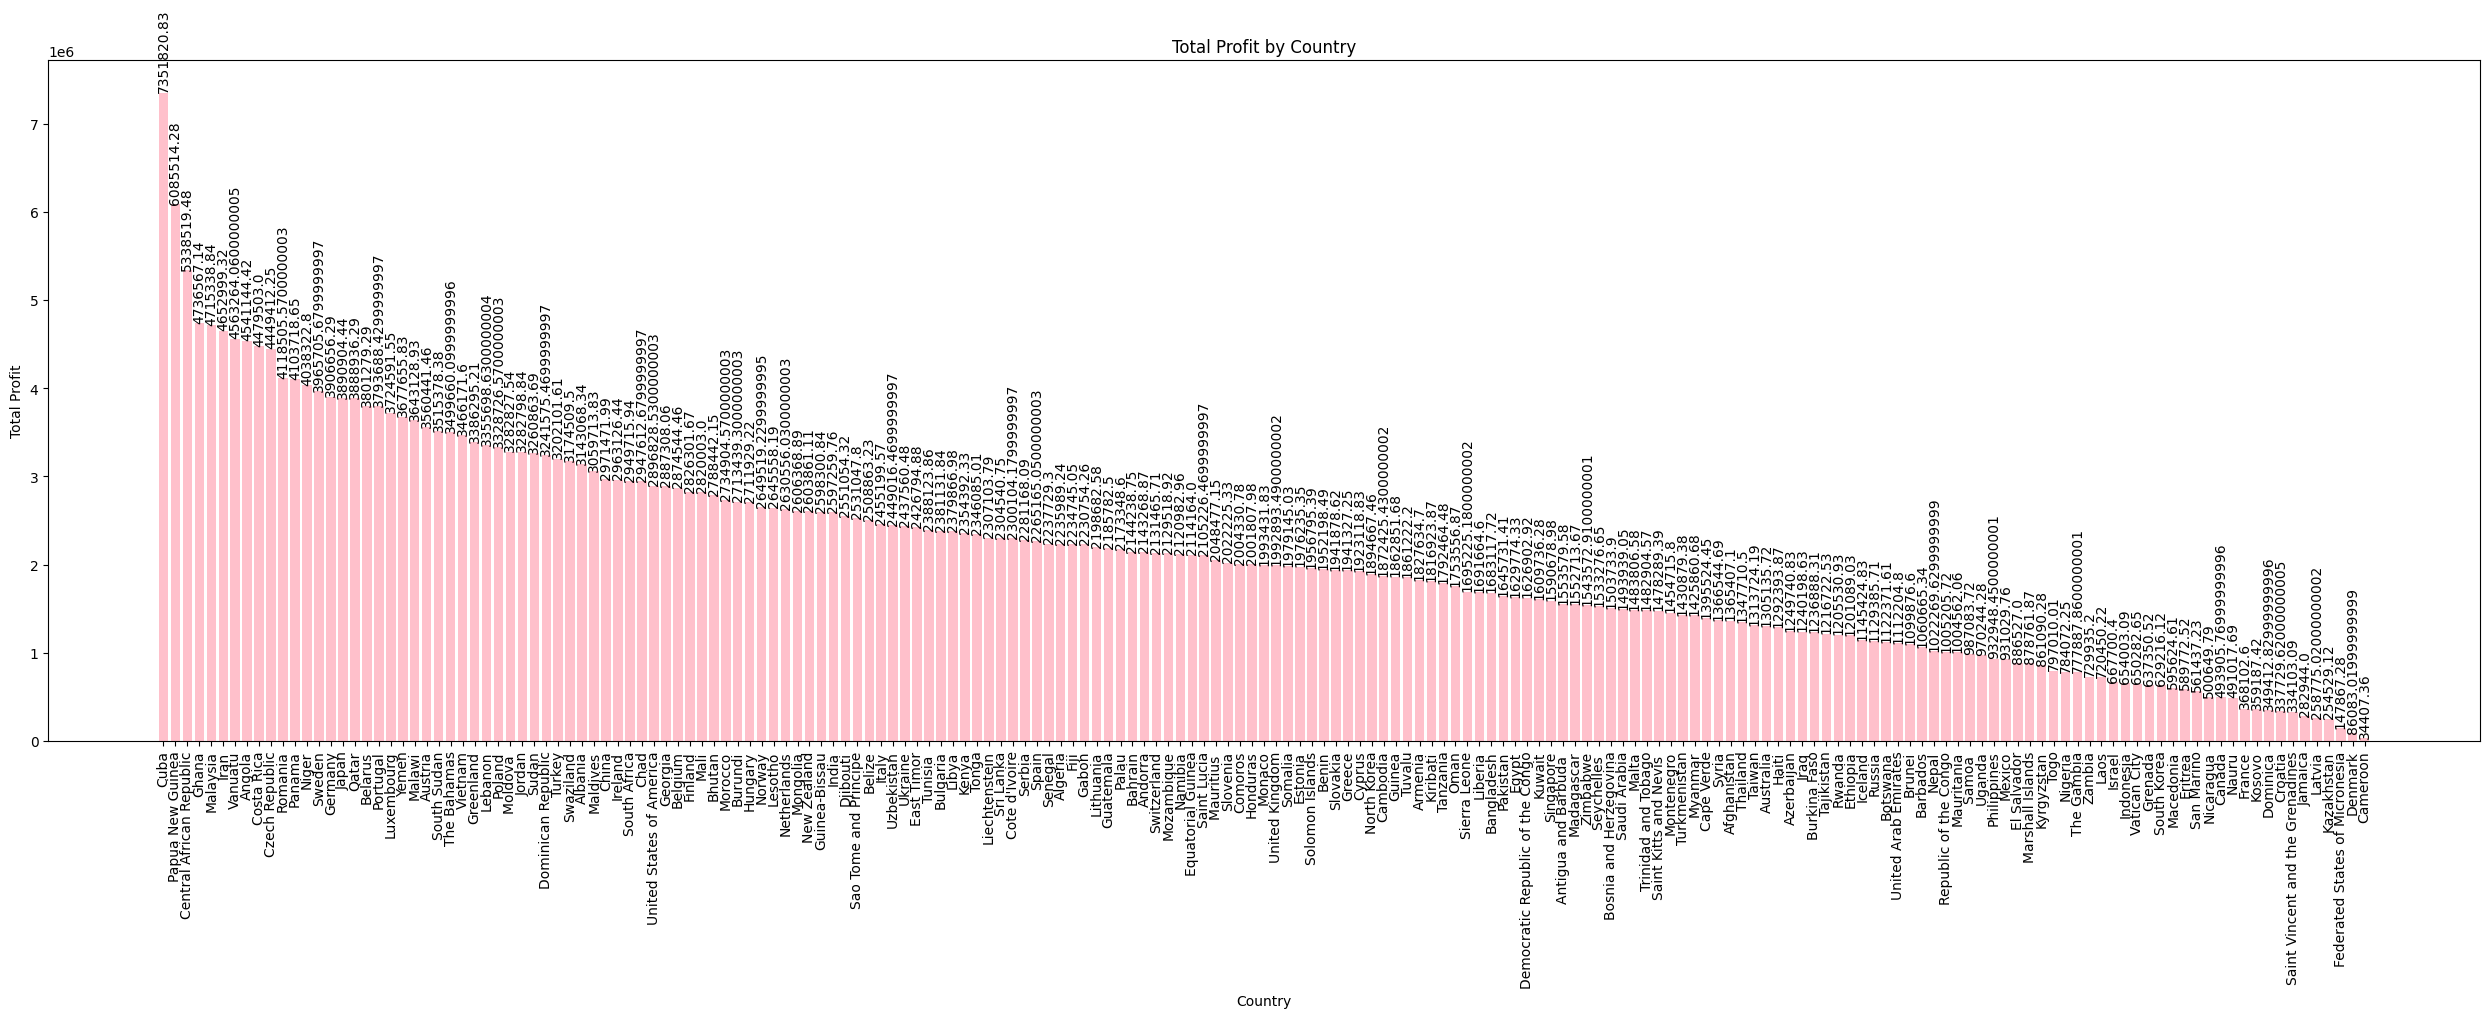

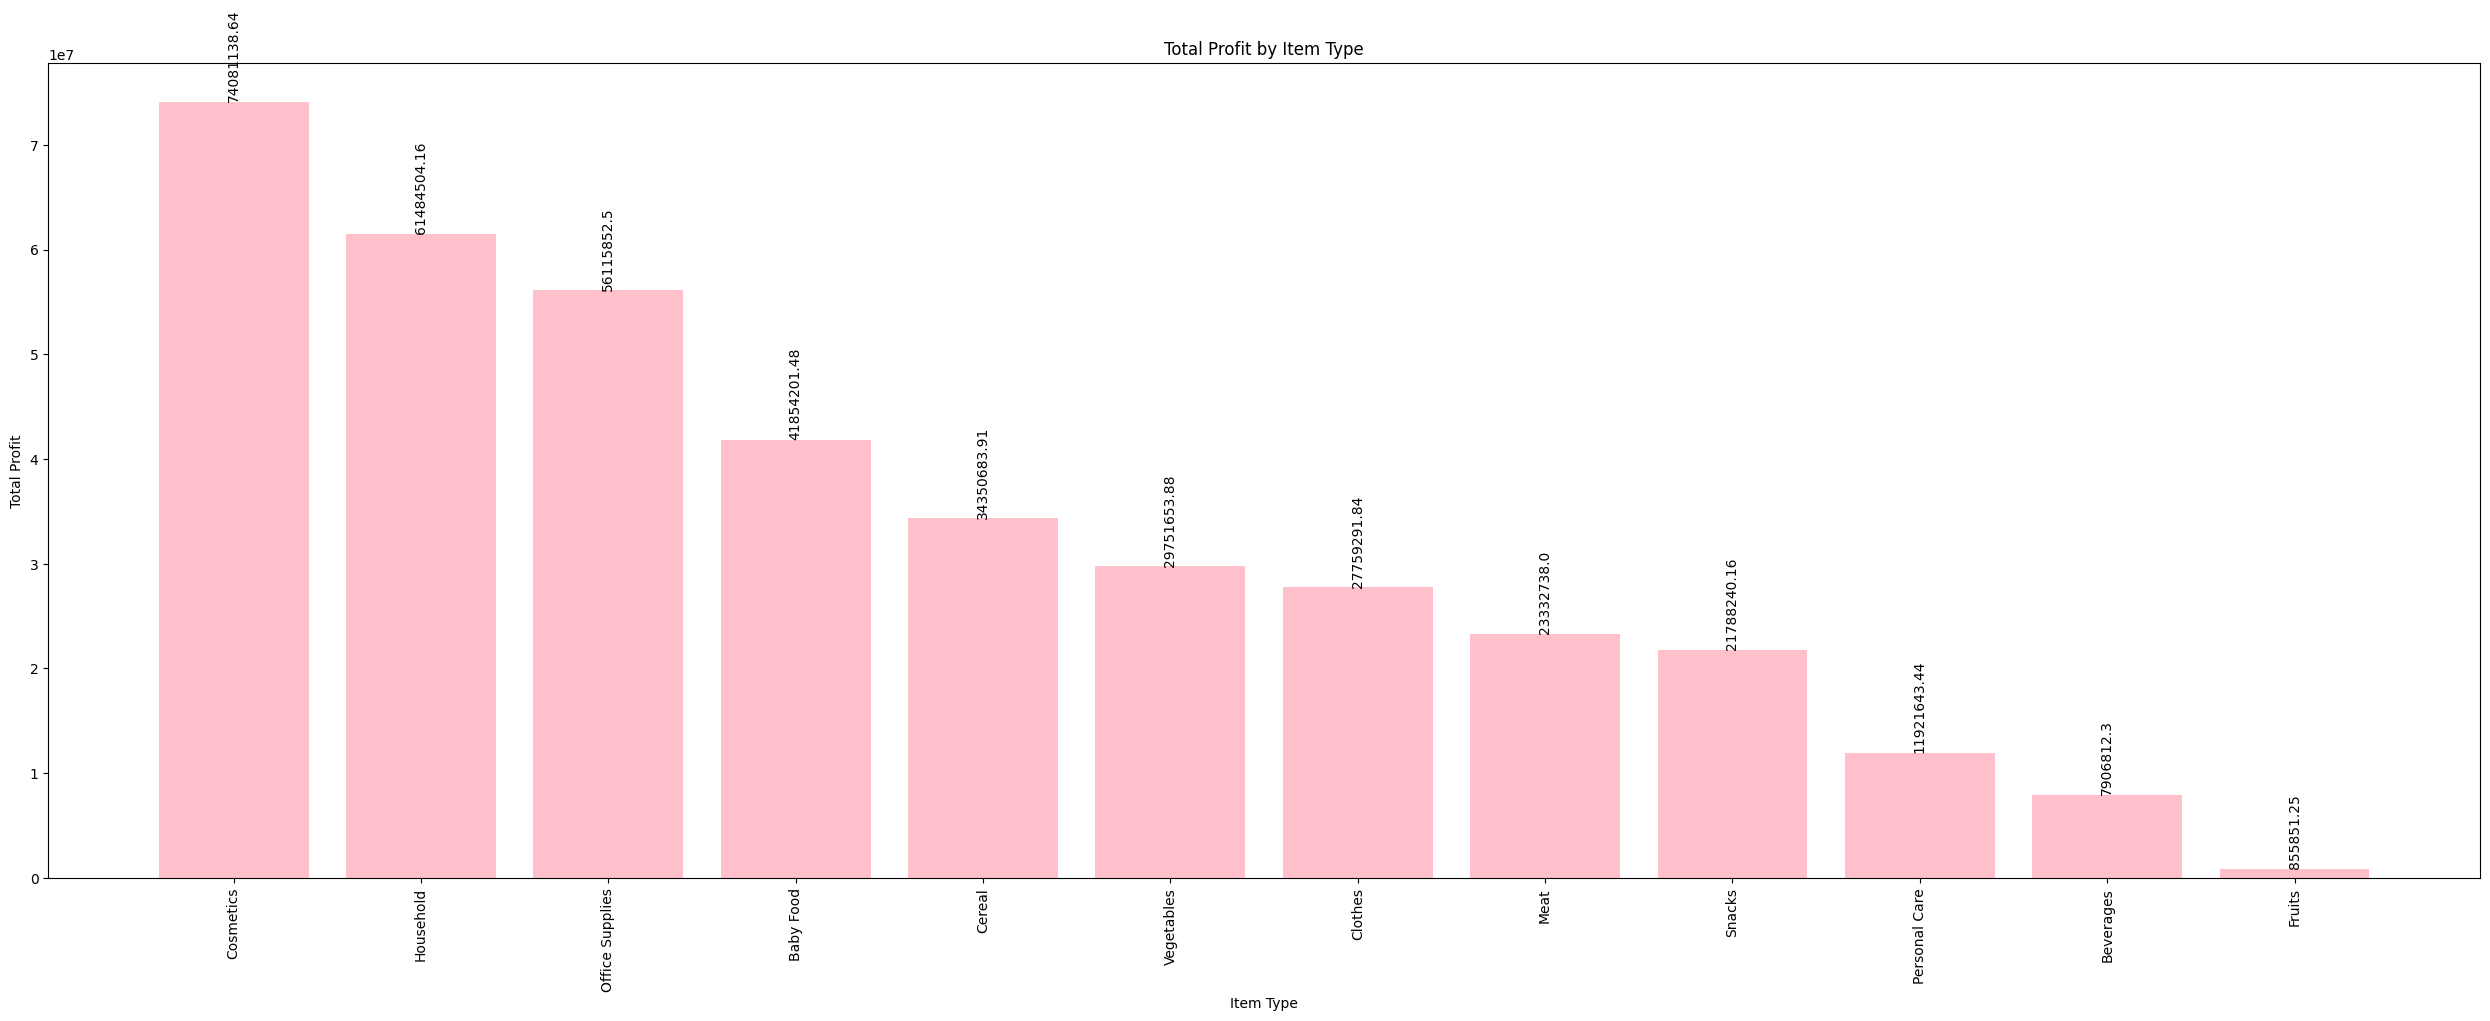

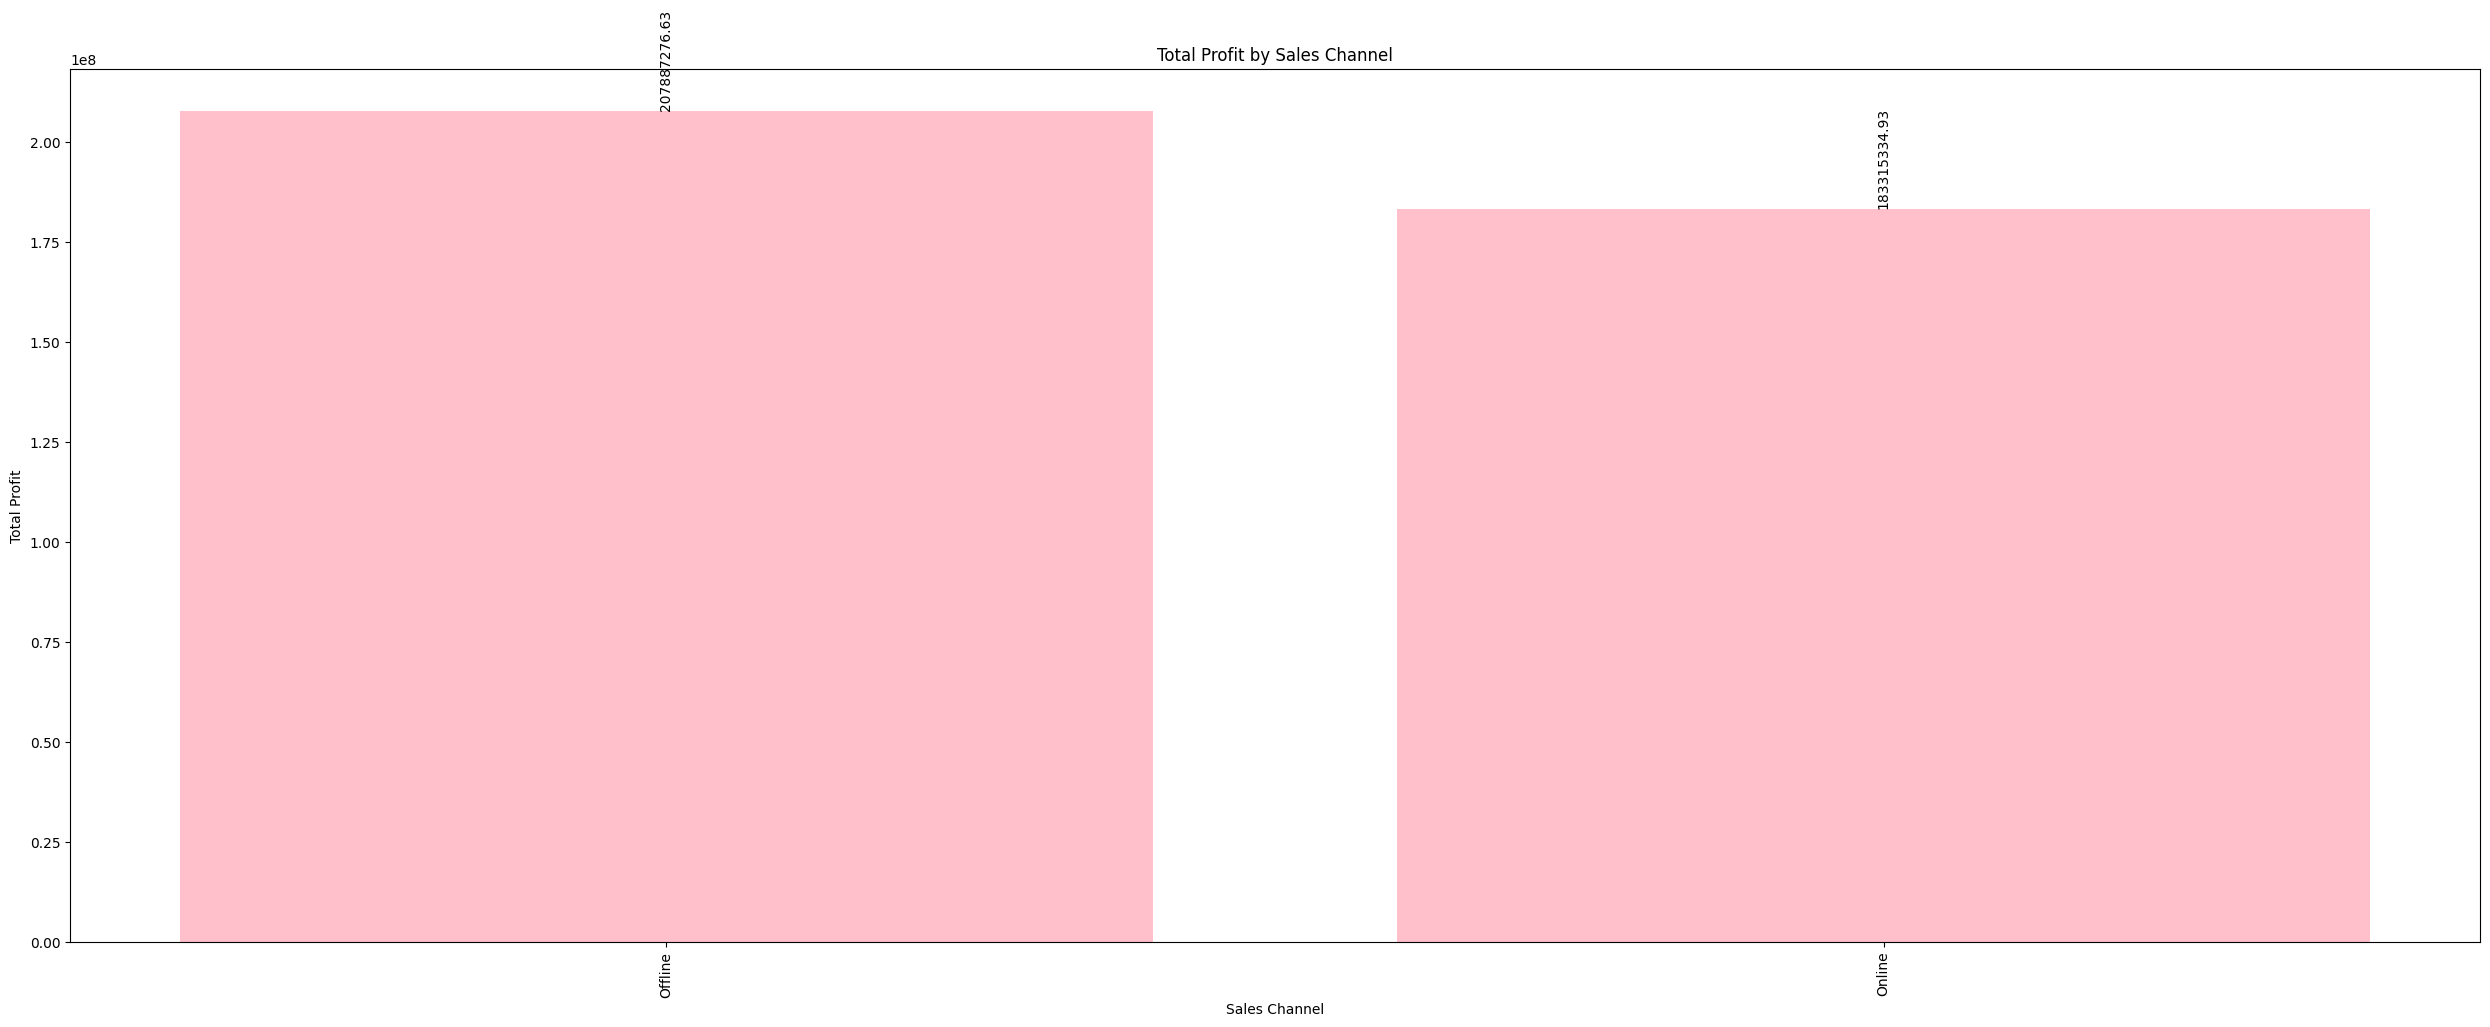

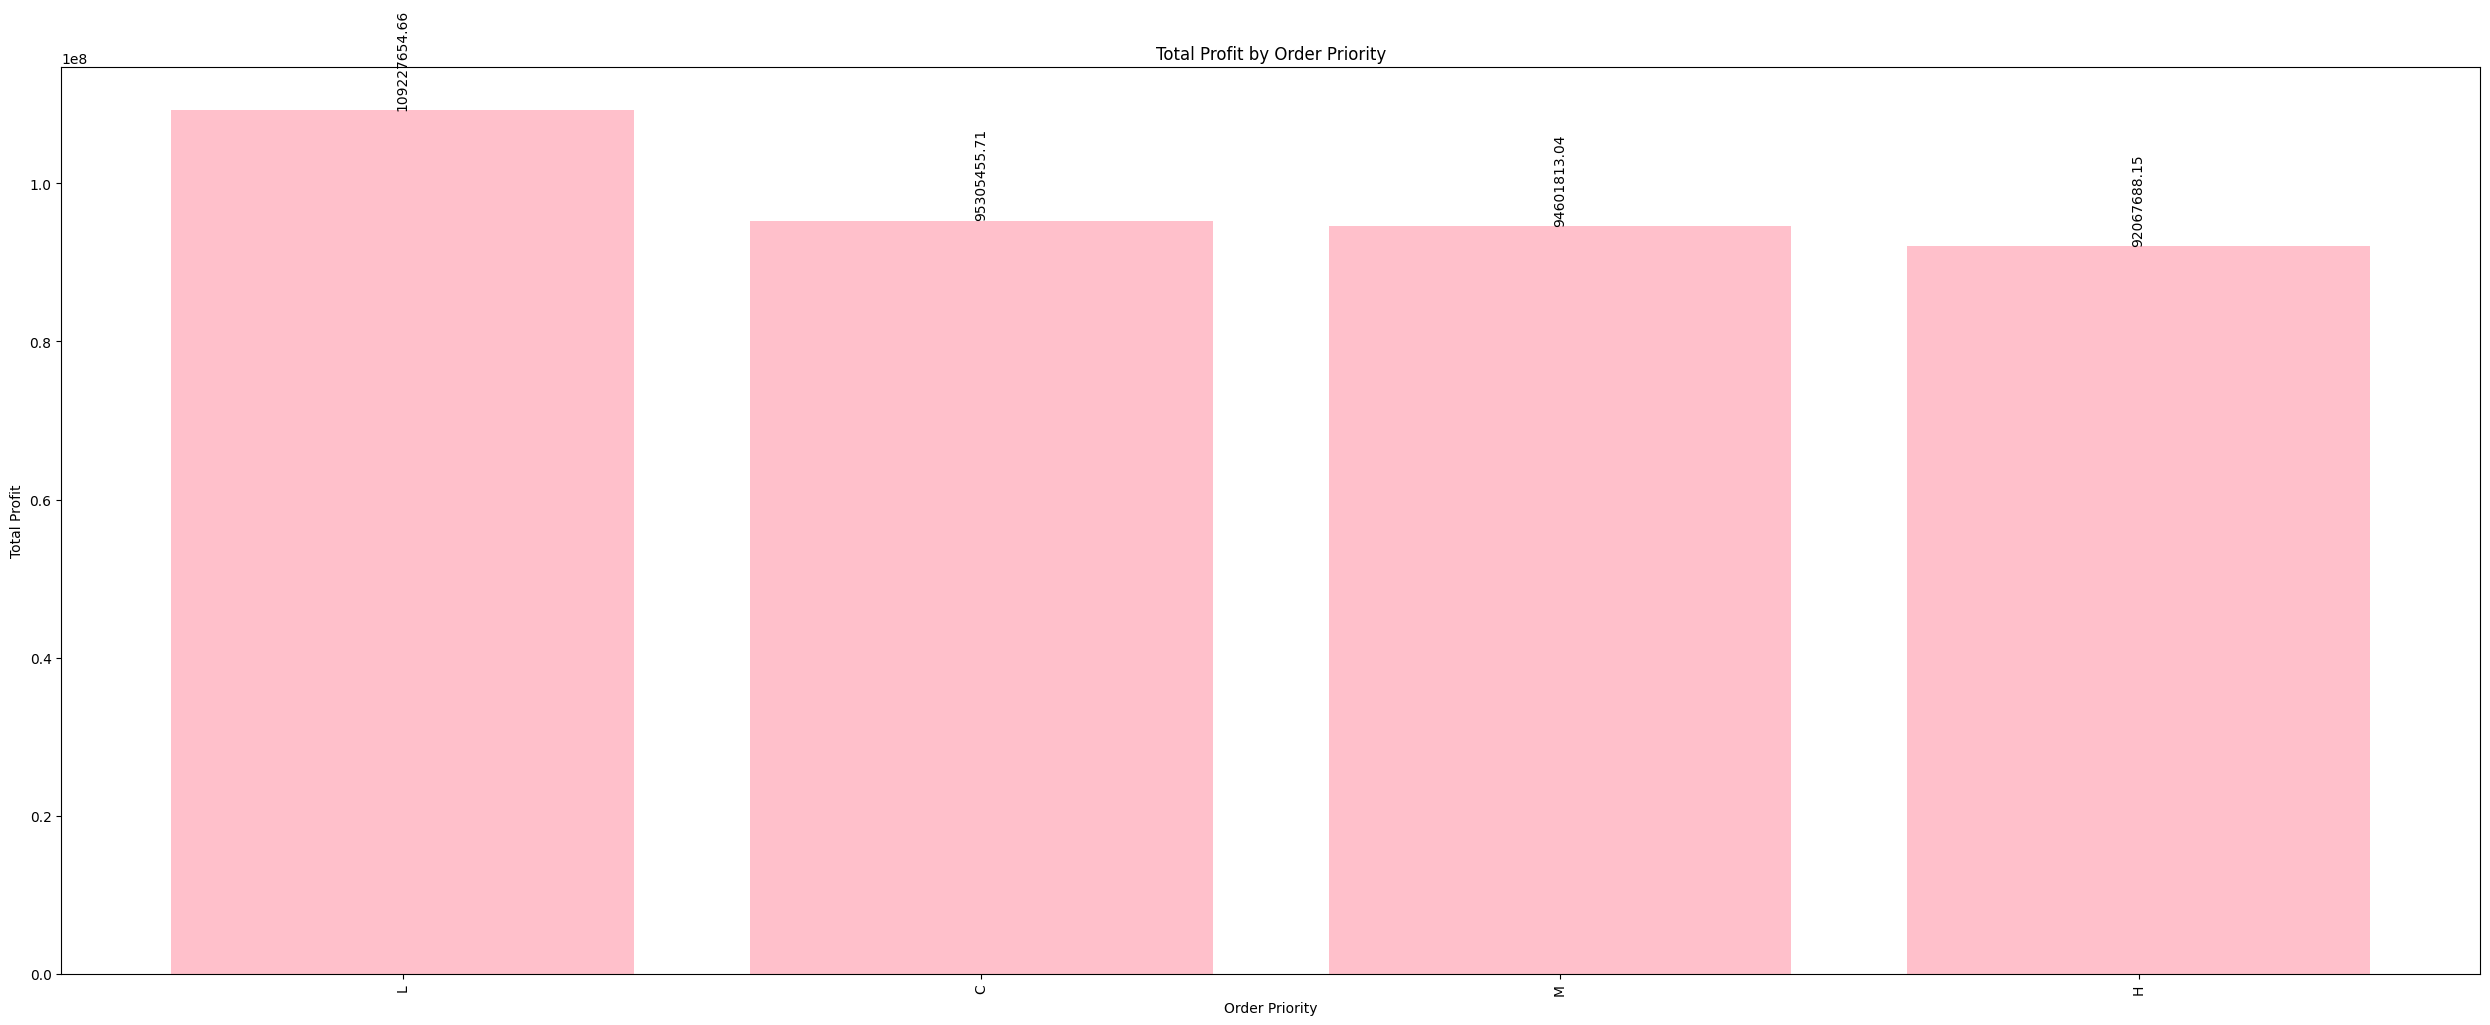

In [19]:
for i in df.columns:
    if i in ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']:
        total_profit=df.groupby(i)['Total Profit'].sum()
        sorted_total_profit=total_profit.sort_values (ascending=False)
        plt.figure(figsize=(25, 10))
        plt.bar(sorted_total_profit.index, sorted_total_profit.values, color='pink')
        plt.xlabel(i)
        plt.ylabel('Total Profit')
        plt.title(f'Total Profit by {i}')
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.tight_layout()
        # Annotate the Total profit for each category
        for i, totalprofit in enumerate(sorted_total_profit):
            plt.text(i, totalprofit, f"{totalprofit}", ha='center', va='bottom', rotation=90)

        plt.show()

### Total unit sold by each Region, Country, Item type, Sales channel and Order Priority.

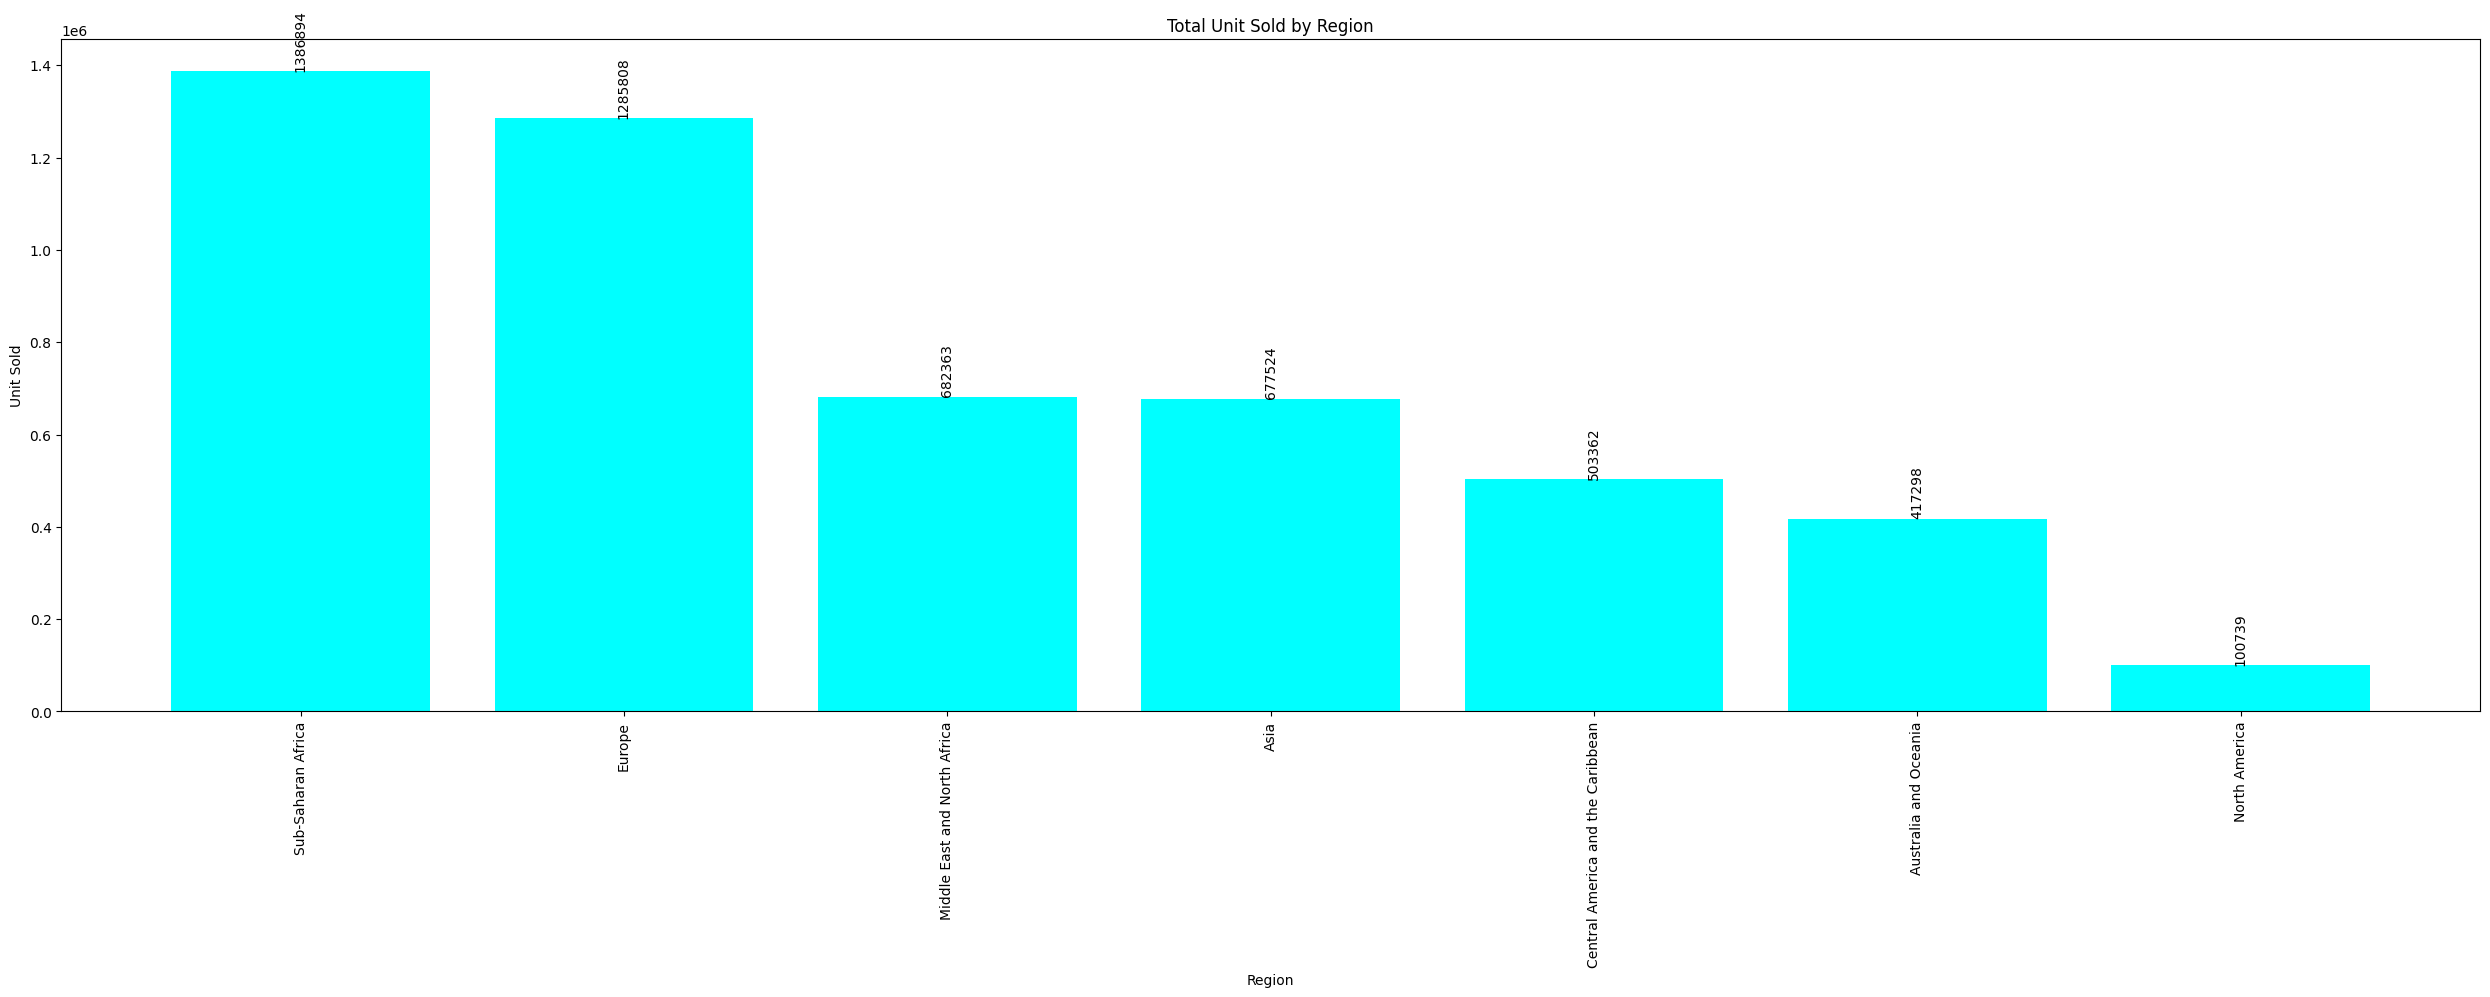

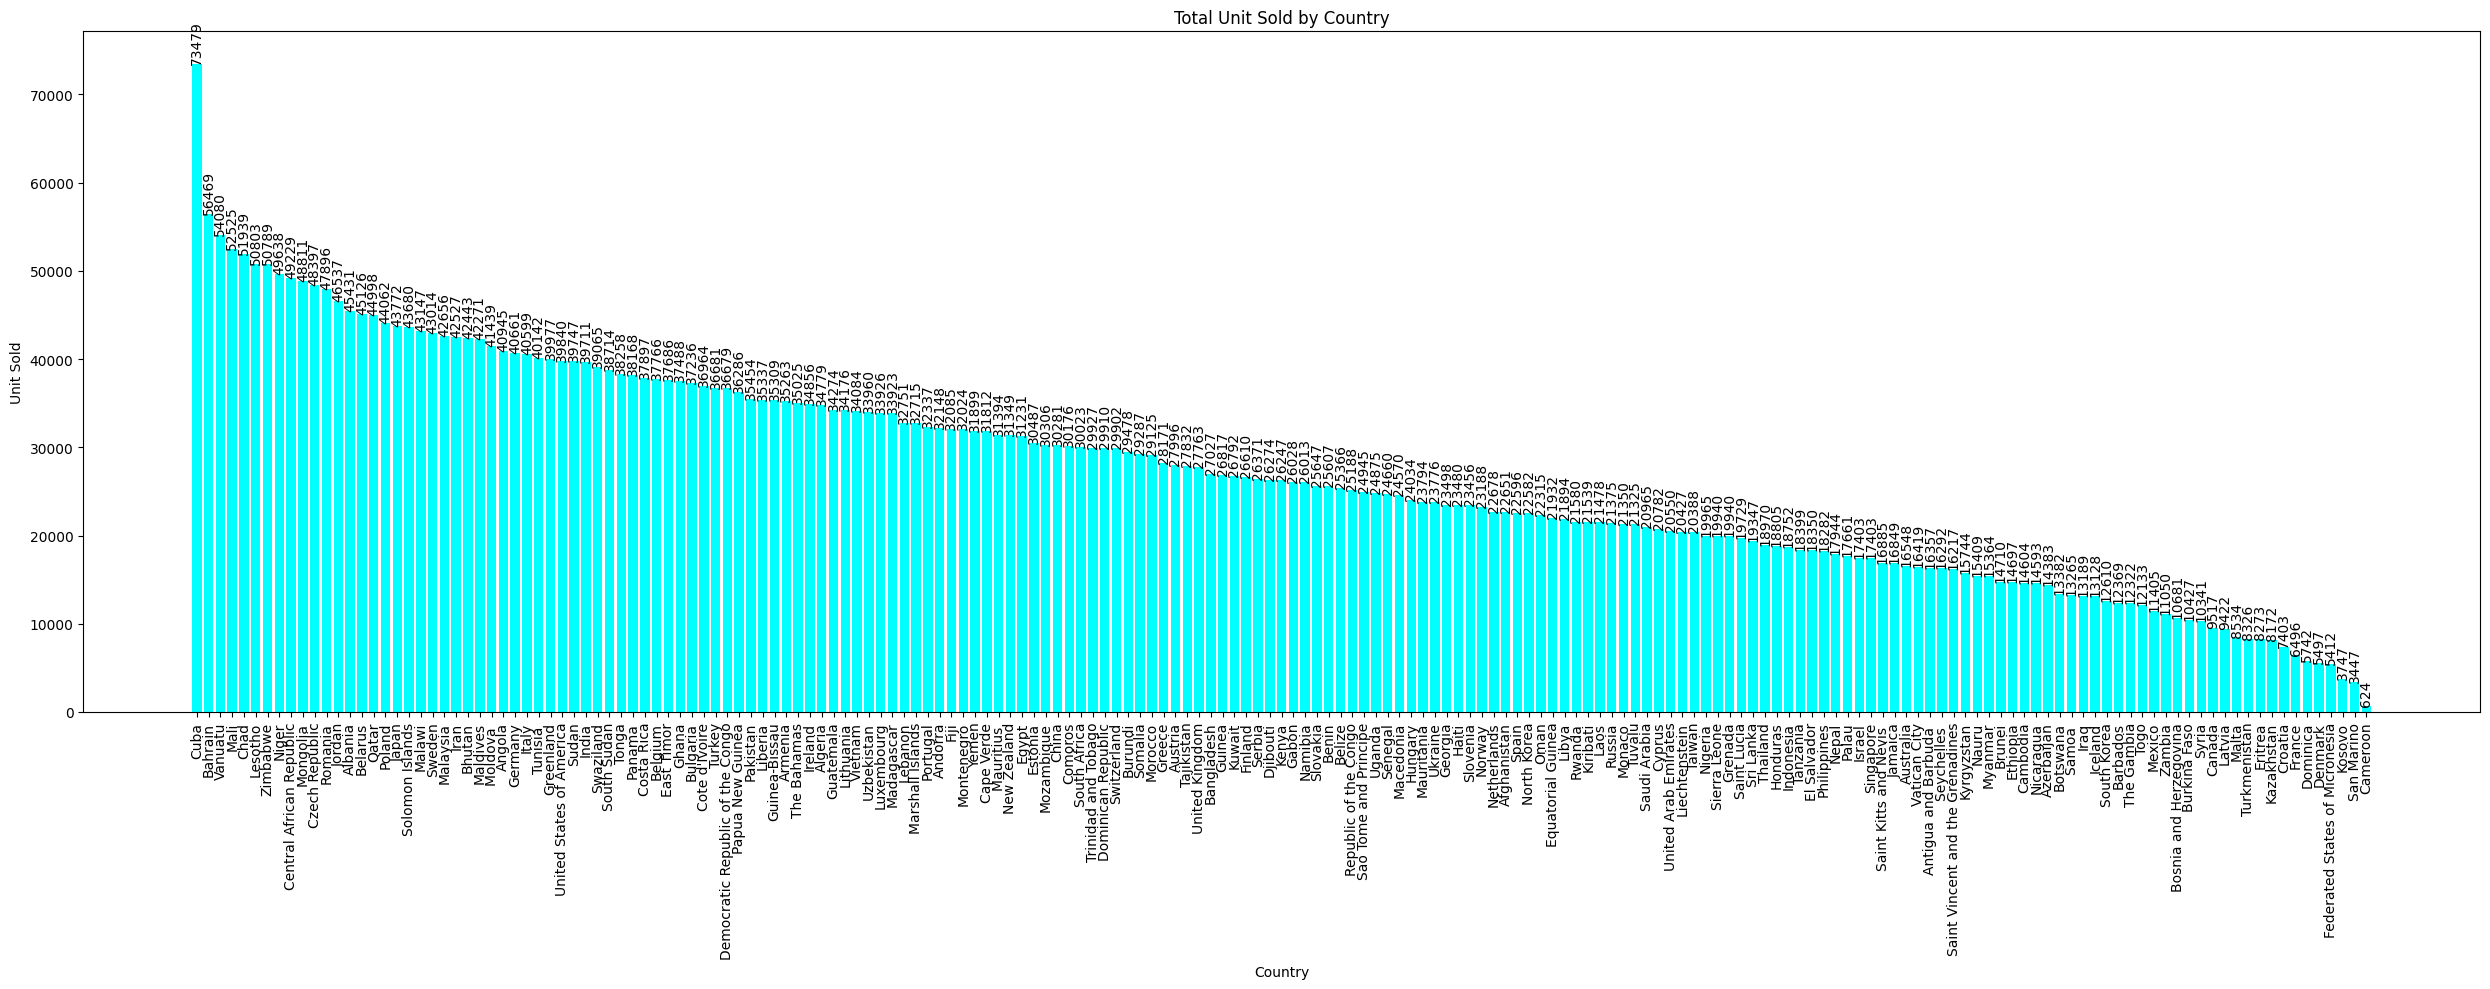

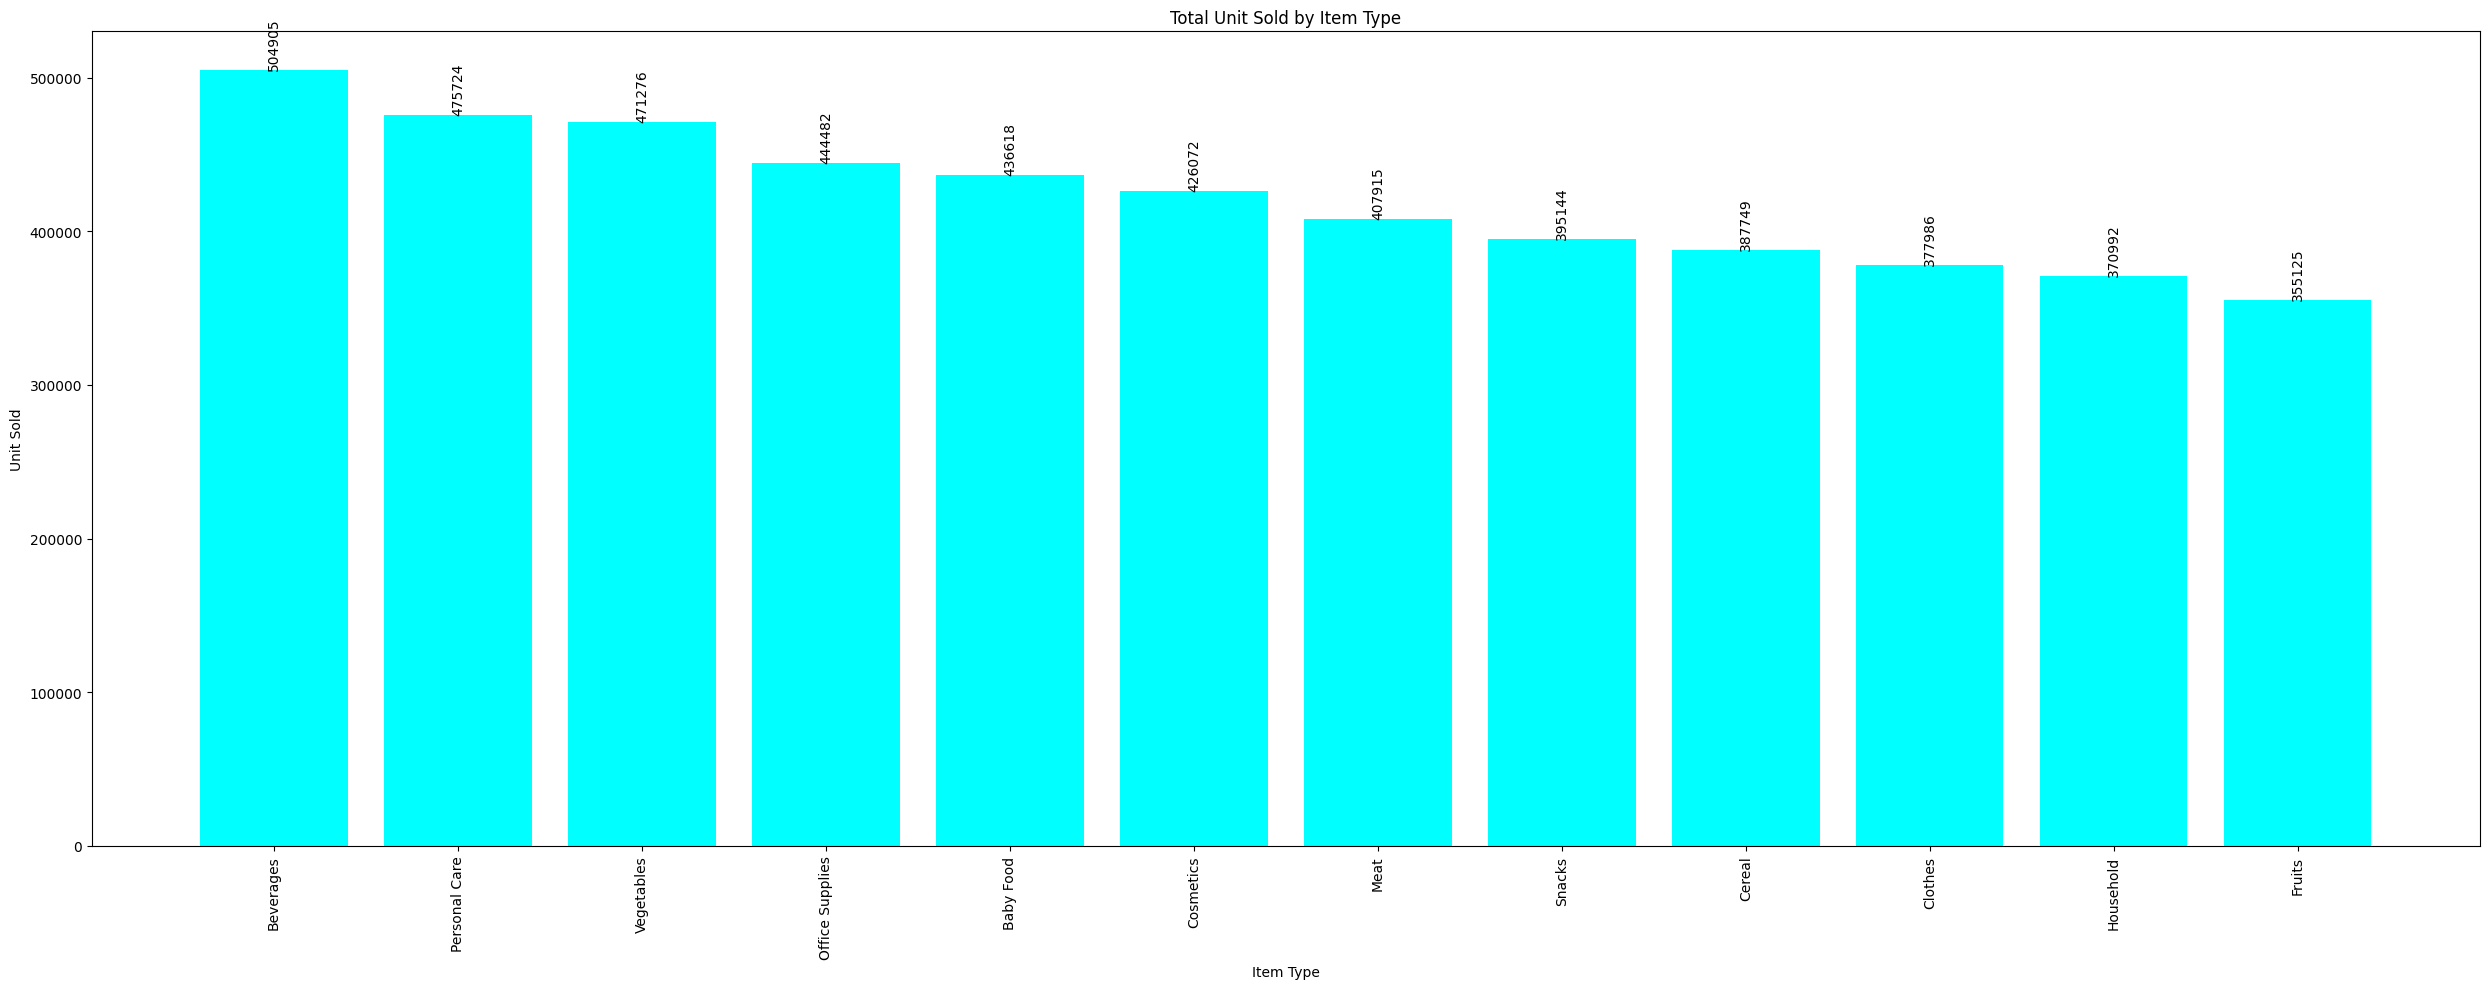

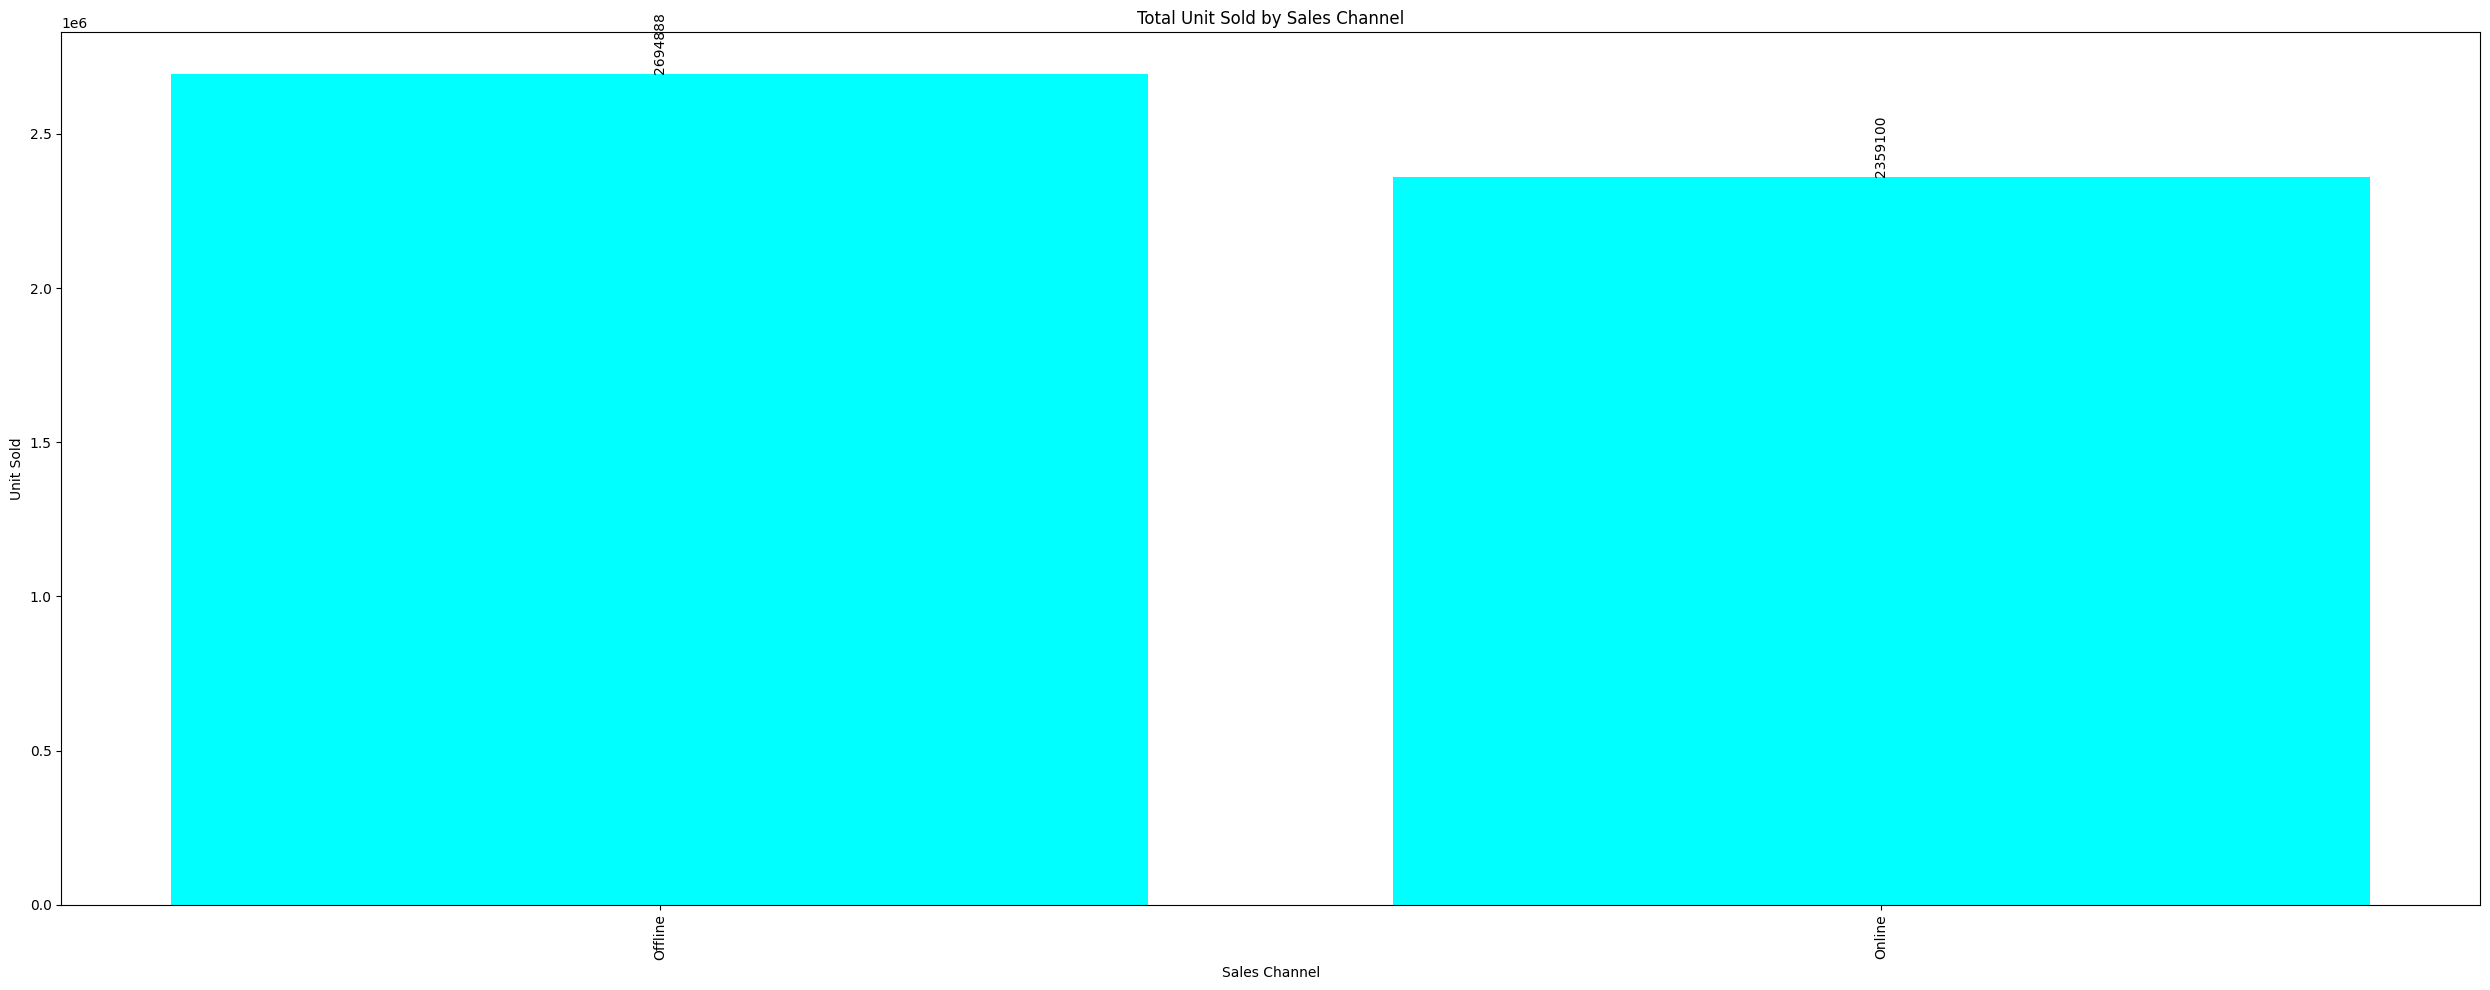

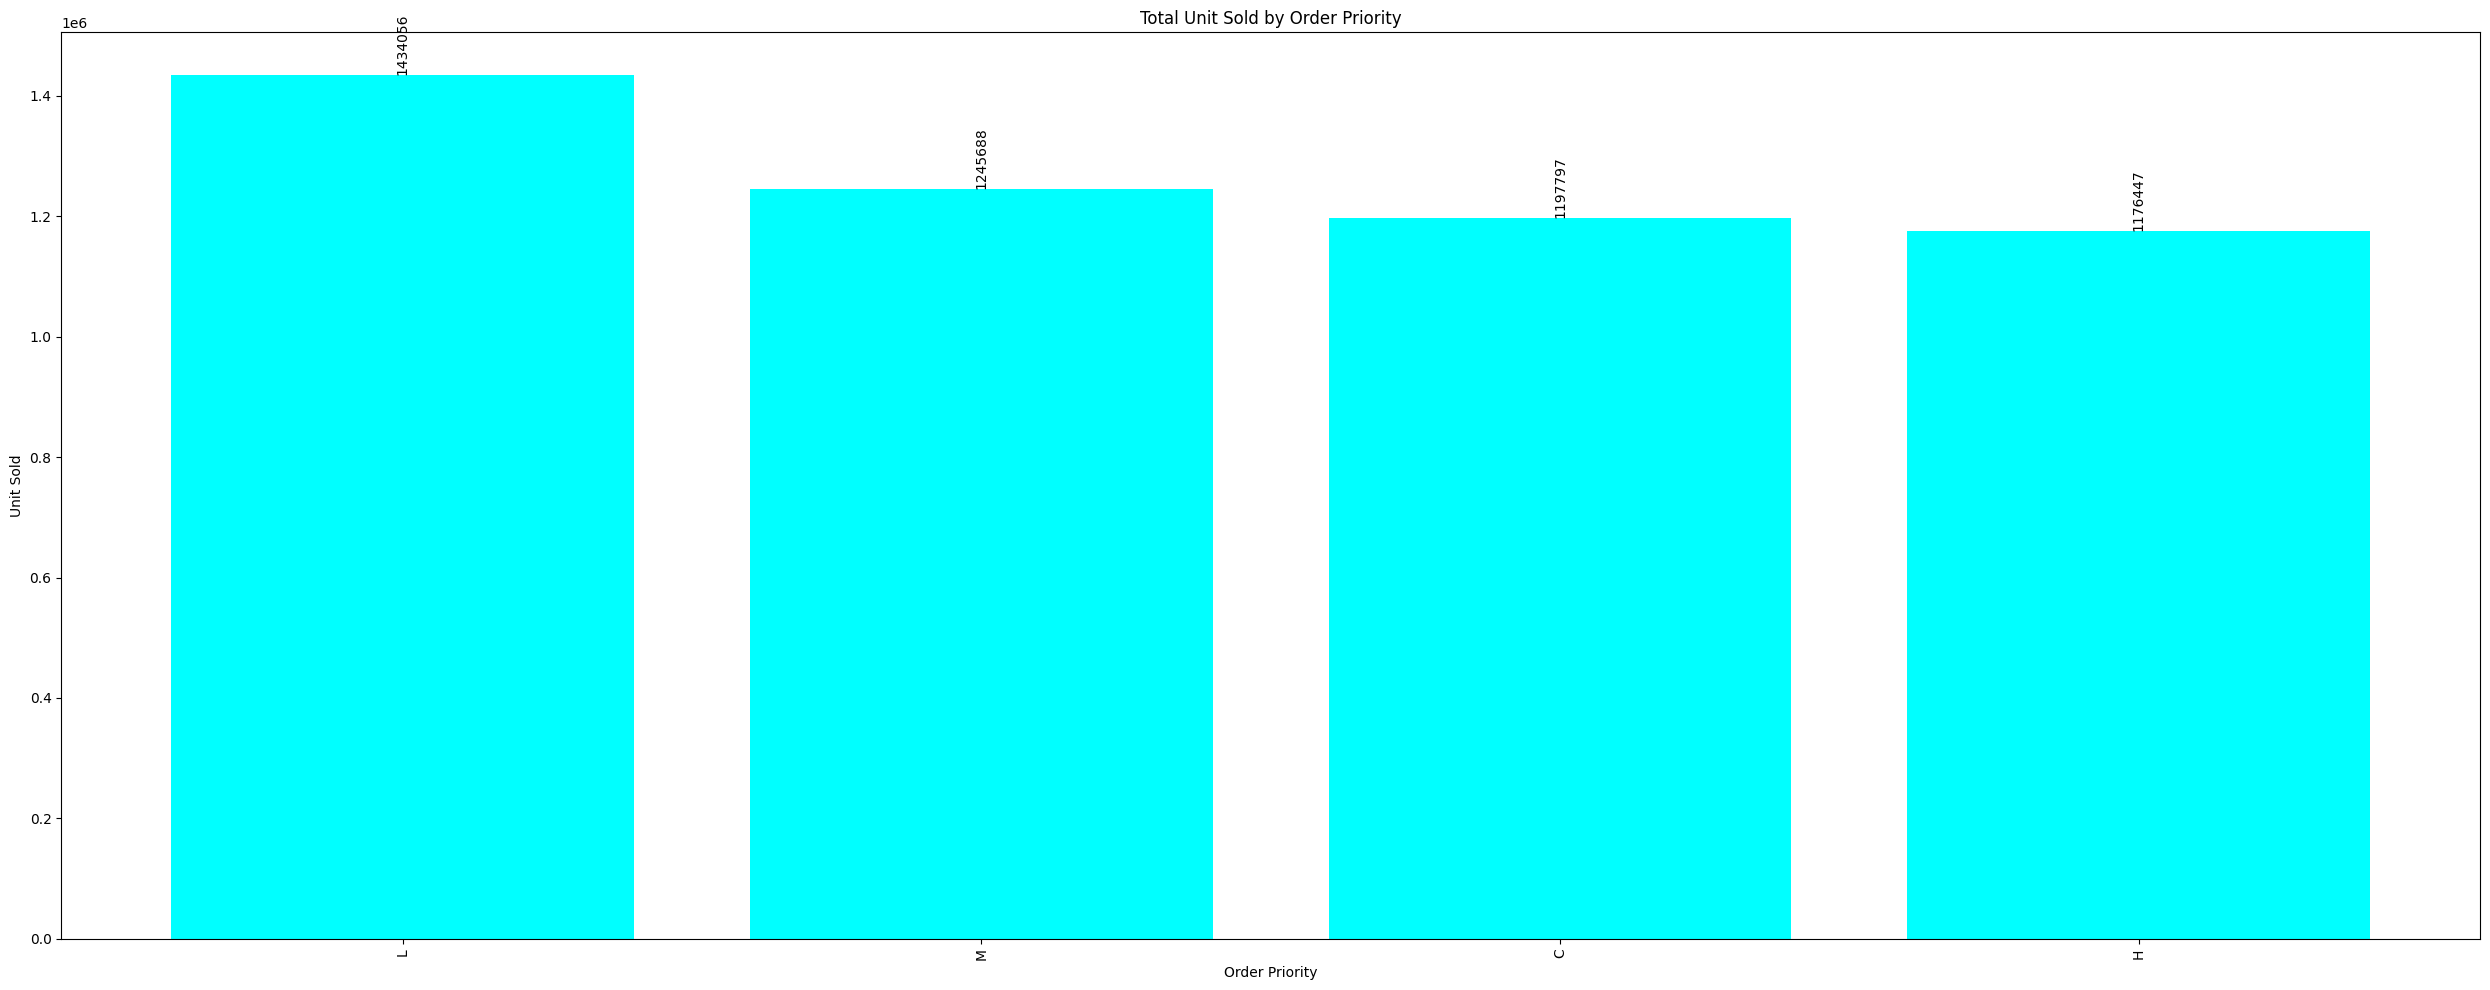

In [20]:
for i in df.columns:
    if i in ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']:
        unit_sold=df.groupby(i)['Units Sold'].sum()
        sorted_unit_sold=unit_sold.sort_values (ascending=False)
        plt.figure(figsize=(25, 10))
        plt.bar(sorted_unit_sold.index, sorted_unit_sold.values, color='aqua')
        plt.xlabel(i)
        plt.ylabel('Unit Sold')
        plt.title(f'Total Unit Sold by {i}')
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.tight_layout()
        # Annotate the Unit sold for each category
        for i, unitsold in enumerate(sorted_unit_sold):
            plt.text(i, unitsold, f"{unitsold}", ha='center', va='bottom', rotation=90)

        plt.show()

### Total cost by each country wrt Region, Item type, Sales channel and Order Priority.

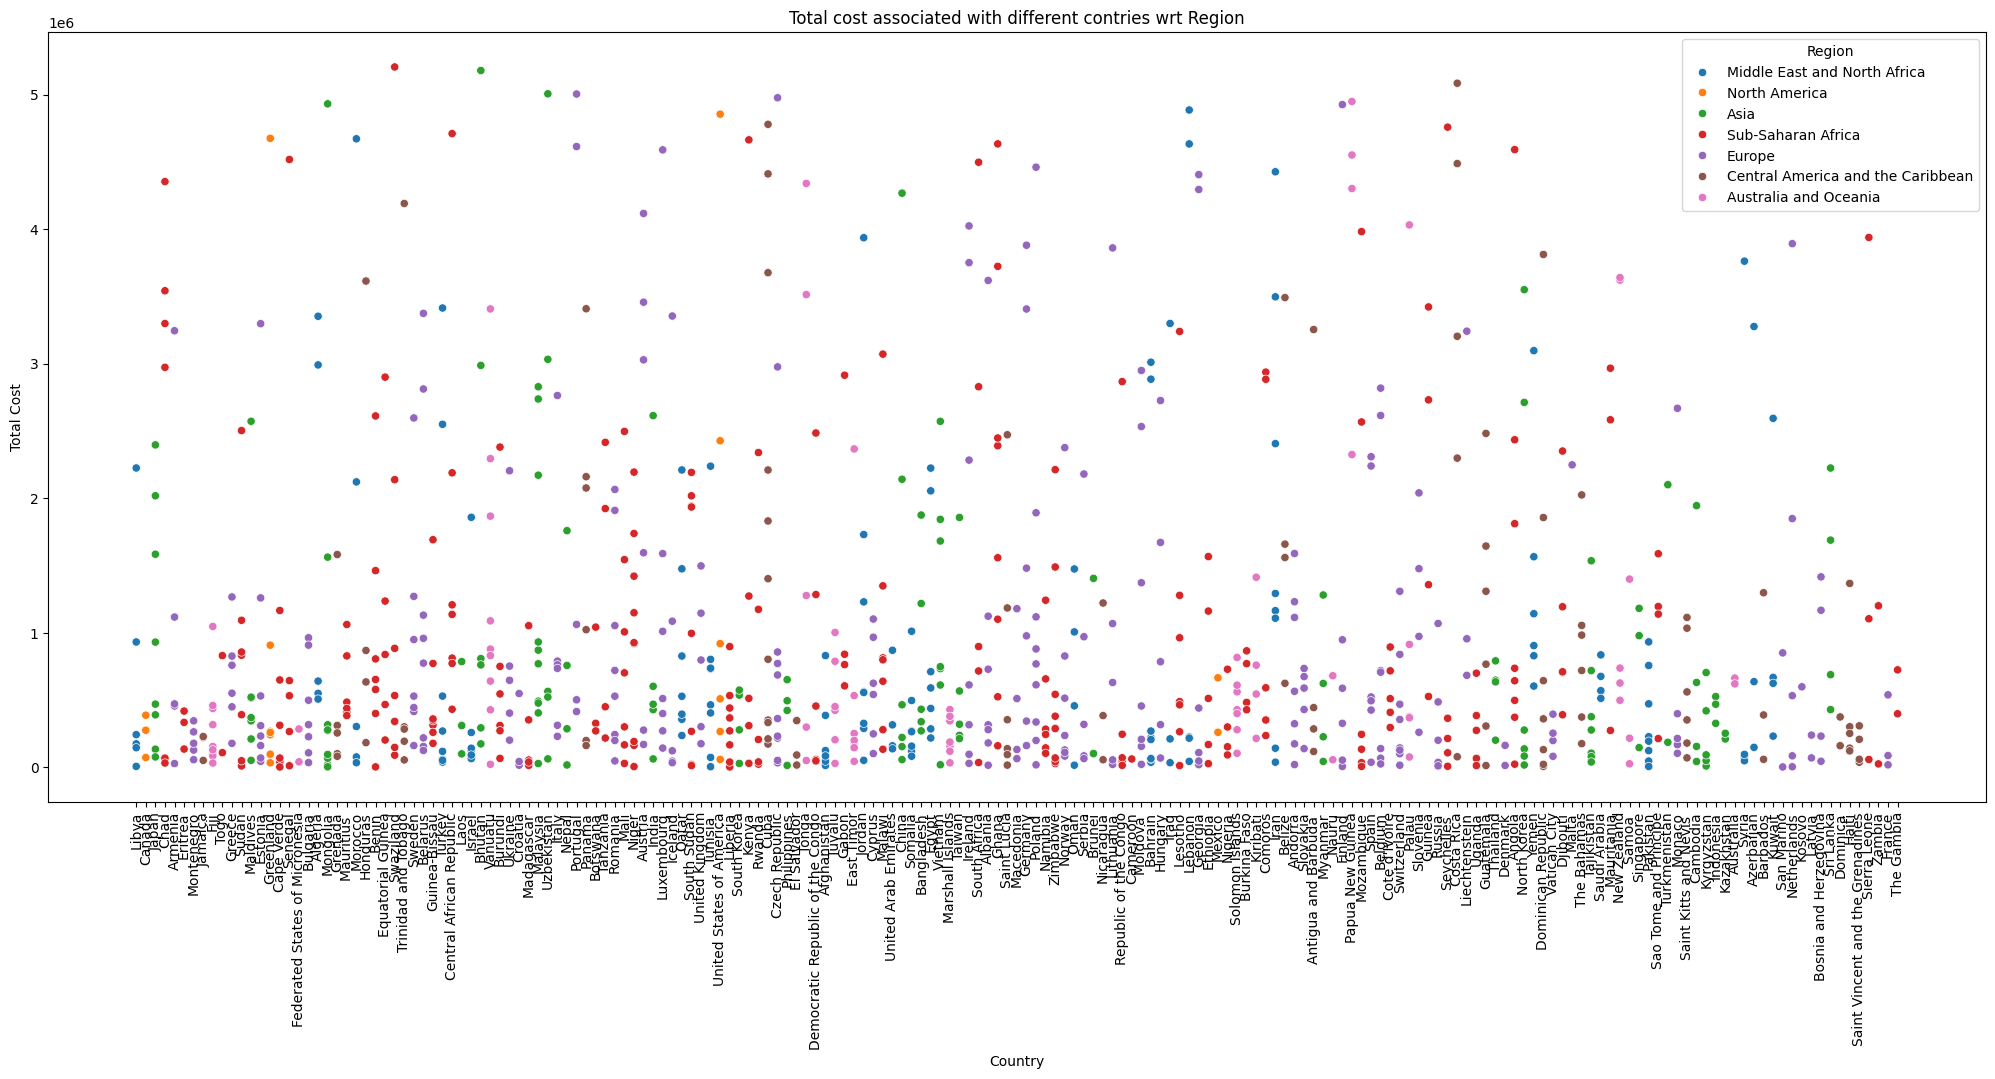

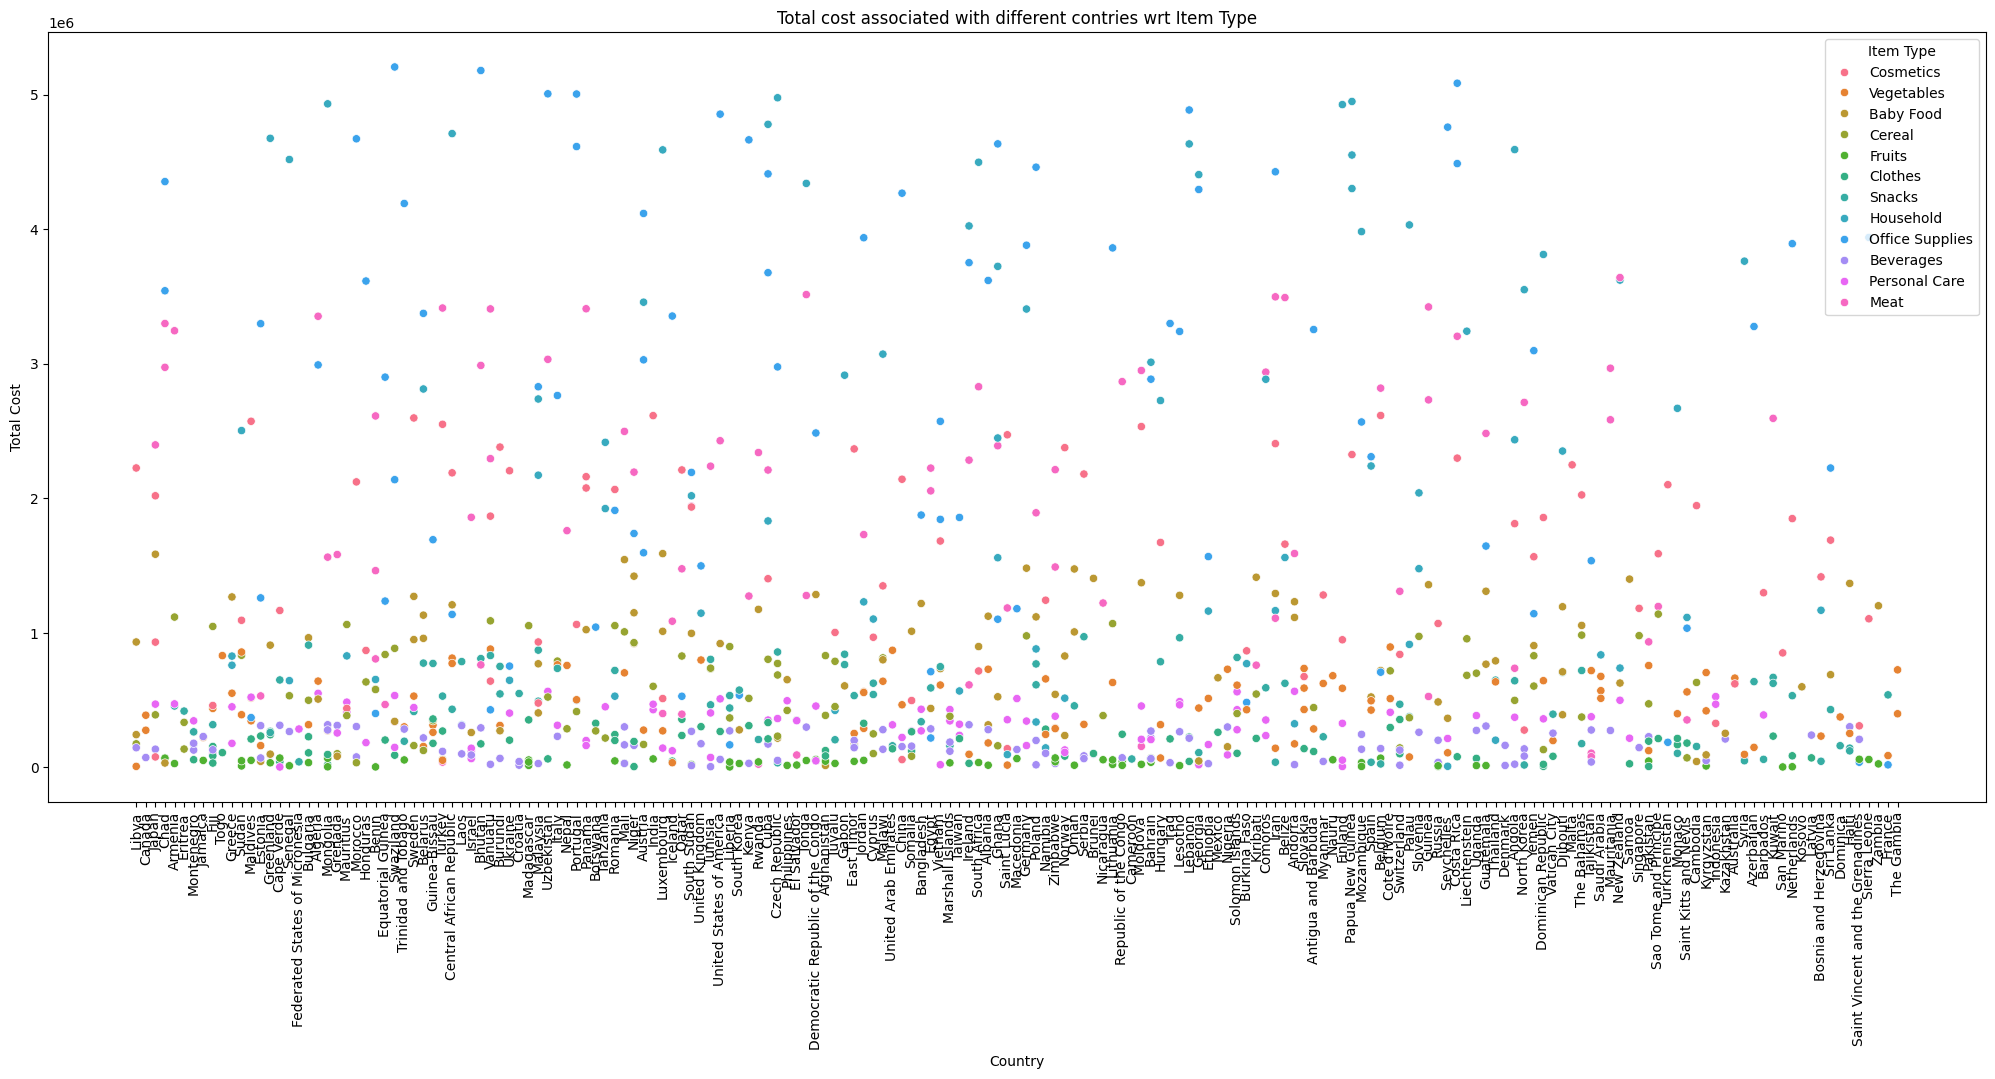

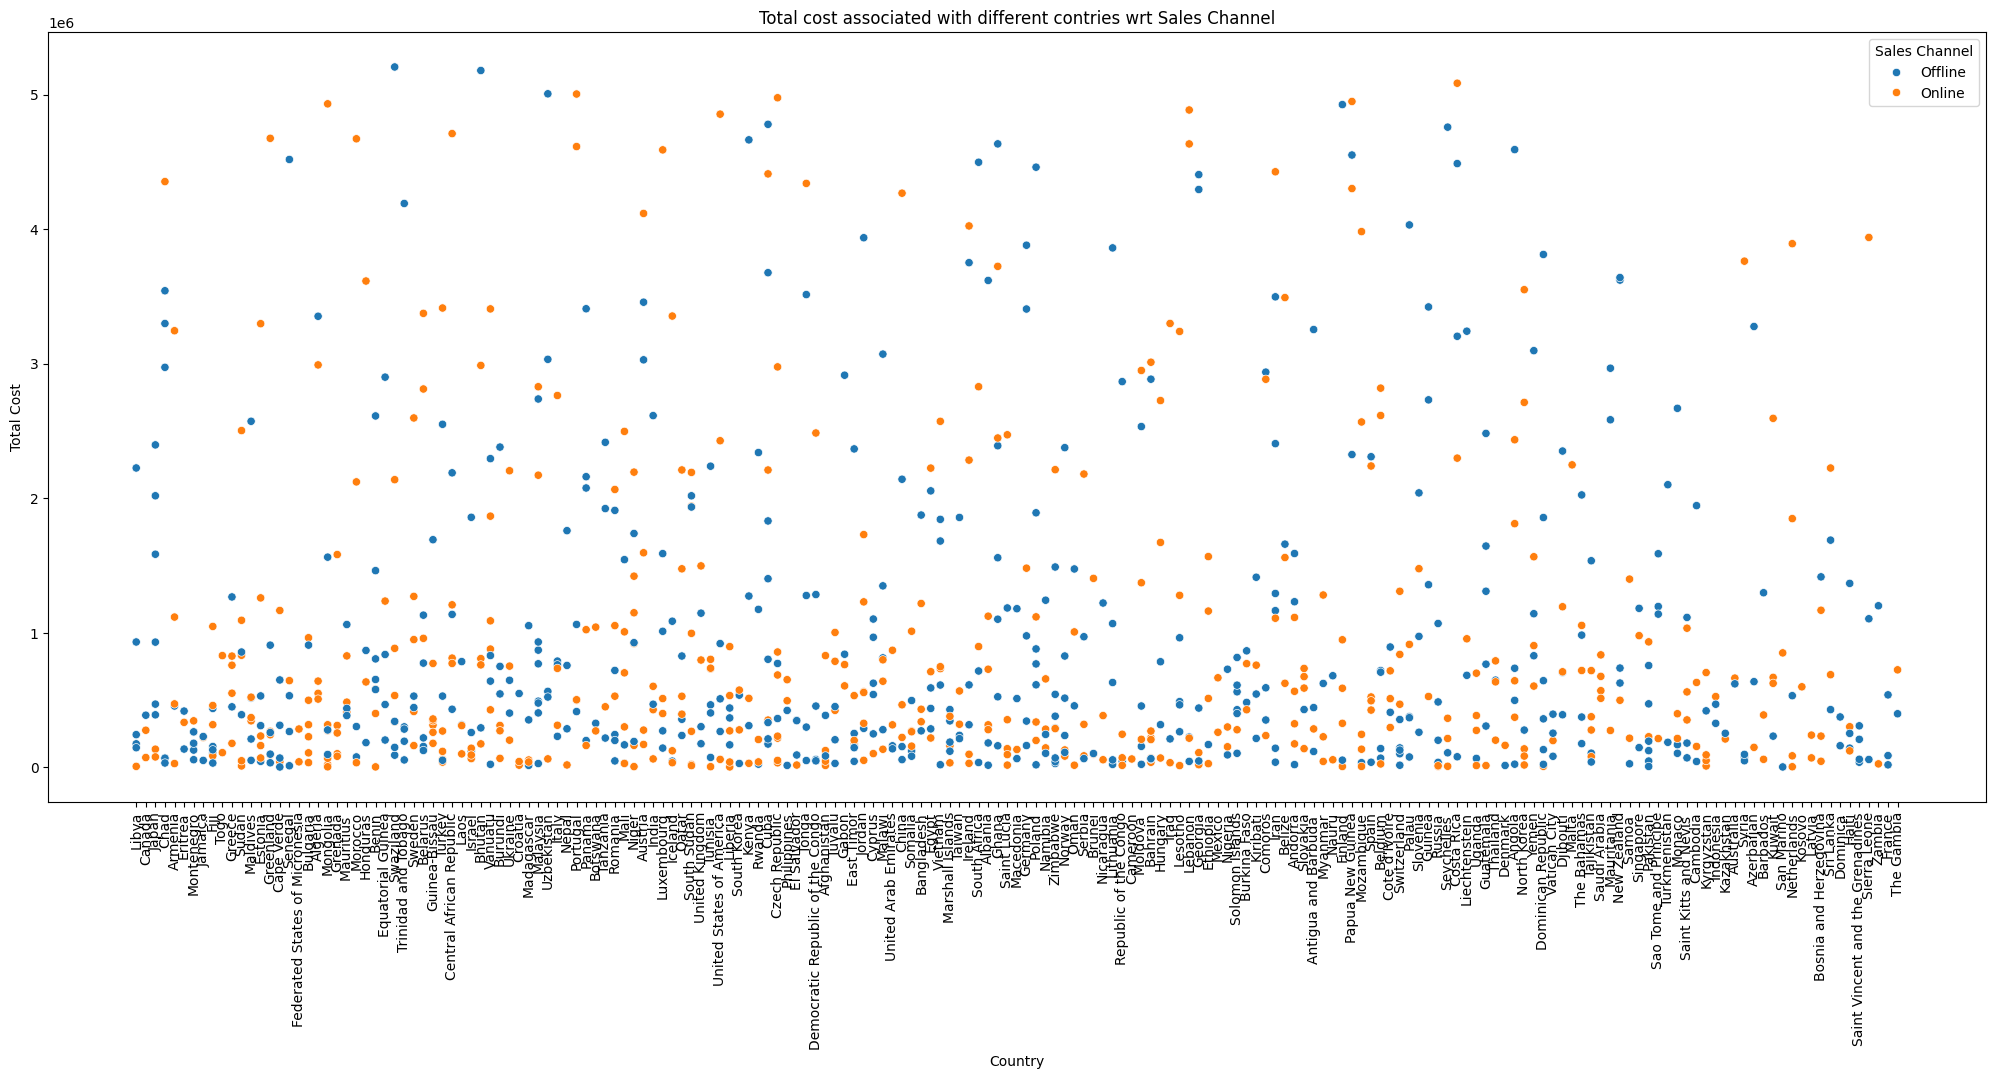

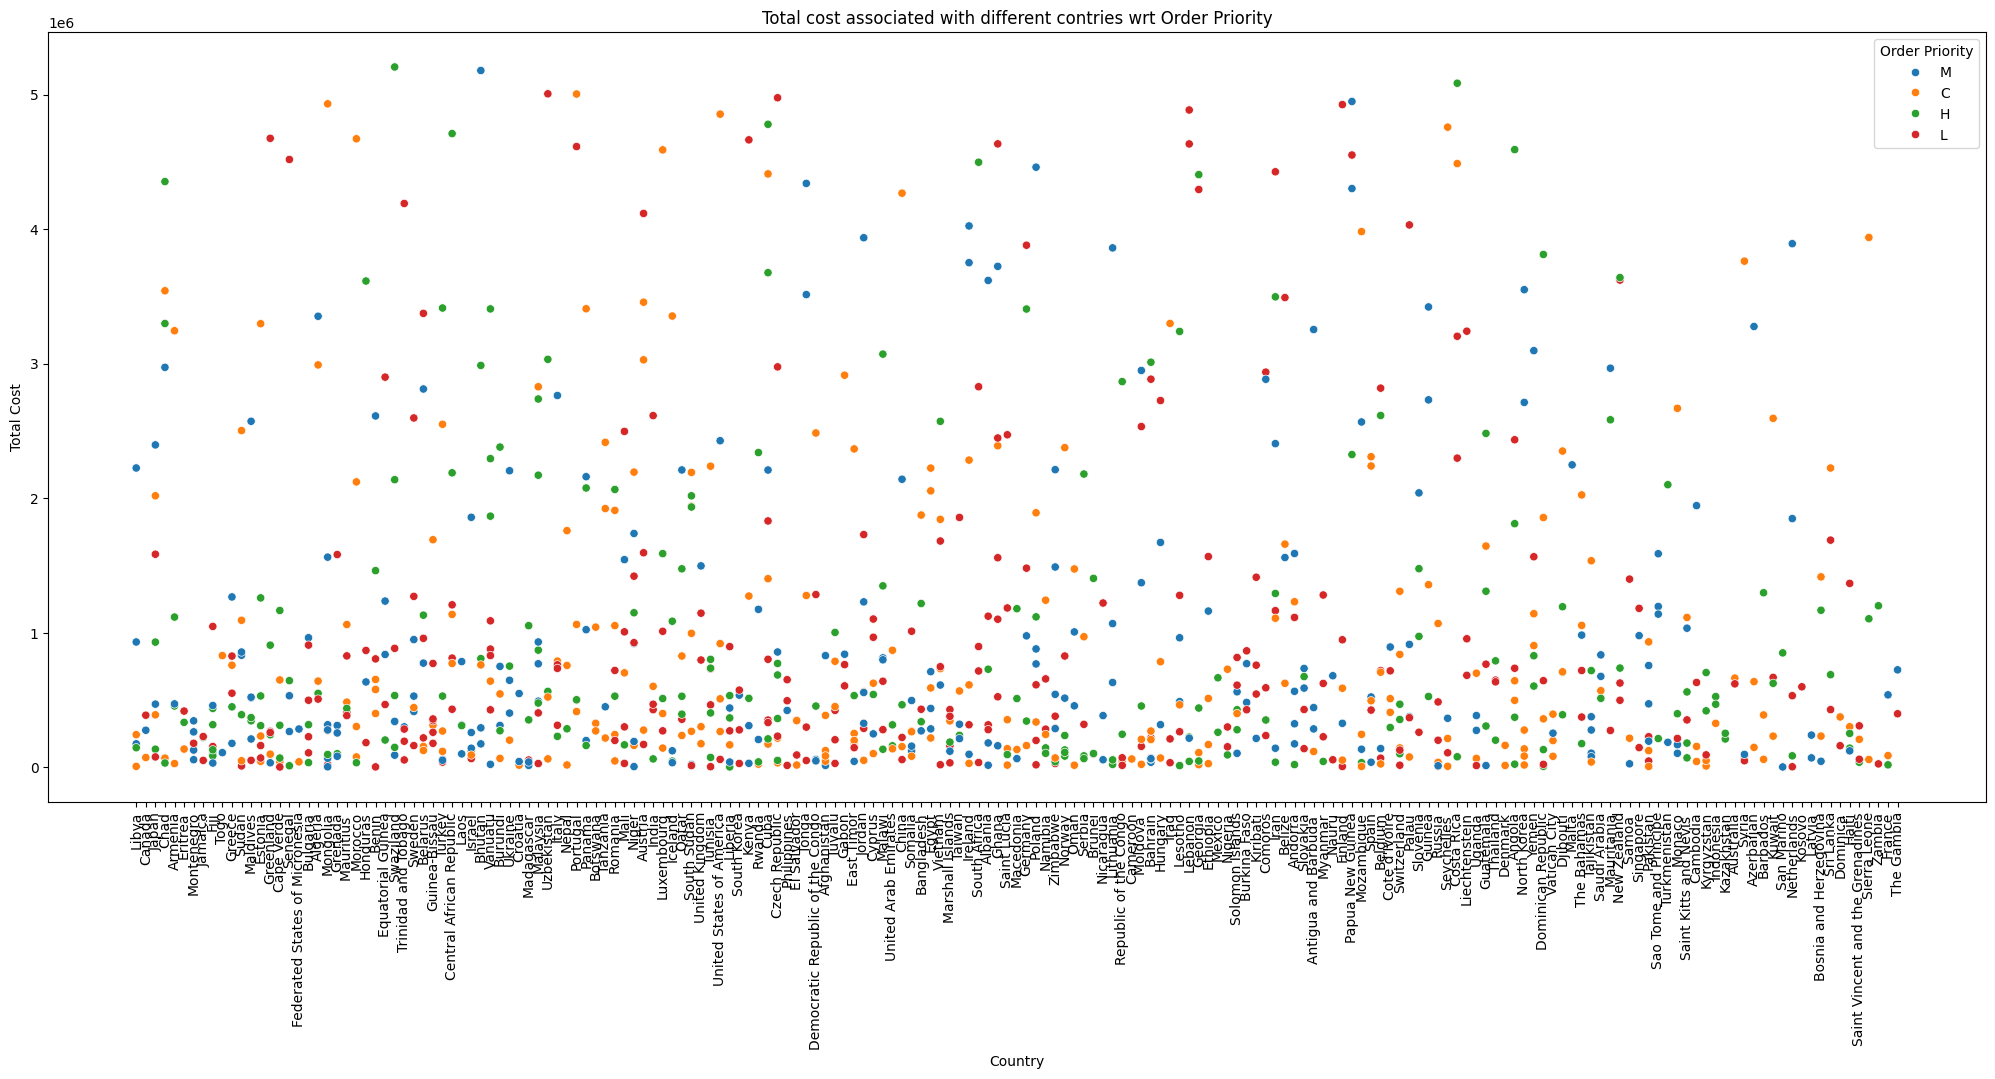

In [21]:
column_for_hue = ['Region',	'Item Type', 'Sales Channel', 'Order Priority']
for i in column_for_hue:
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=df,x="Country",y="Total Cost", hue=i)
    plt.xticks(rotation=90)
    plt.title(f'Total cost associated with different contries wrt {i}')
    plt.legend(title=i)
    plt.show()

### Scatterplot shows max value for each category unless specified.

### Total revenue by each country wrt Region, Item type, Sales Channel and Order Priority.

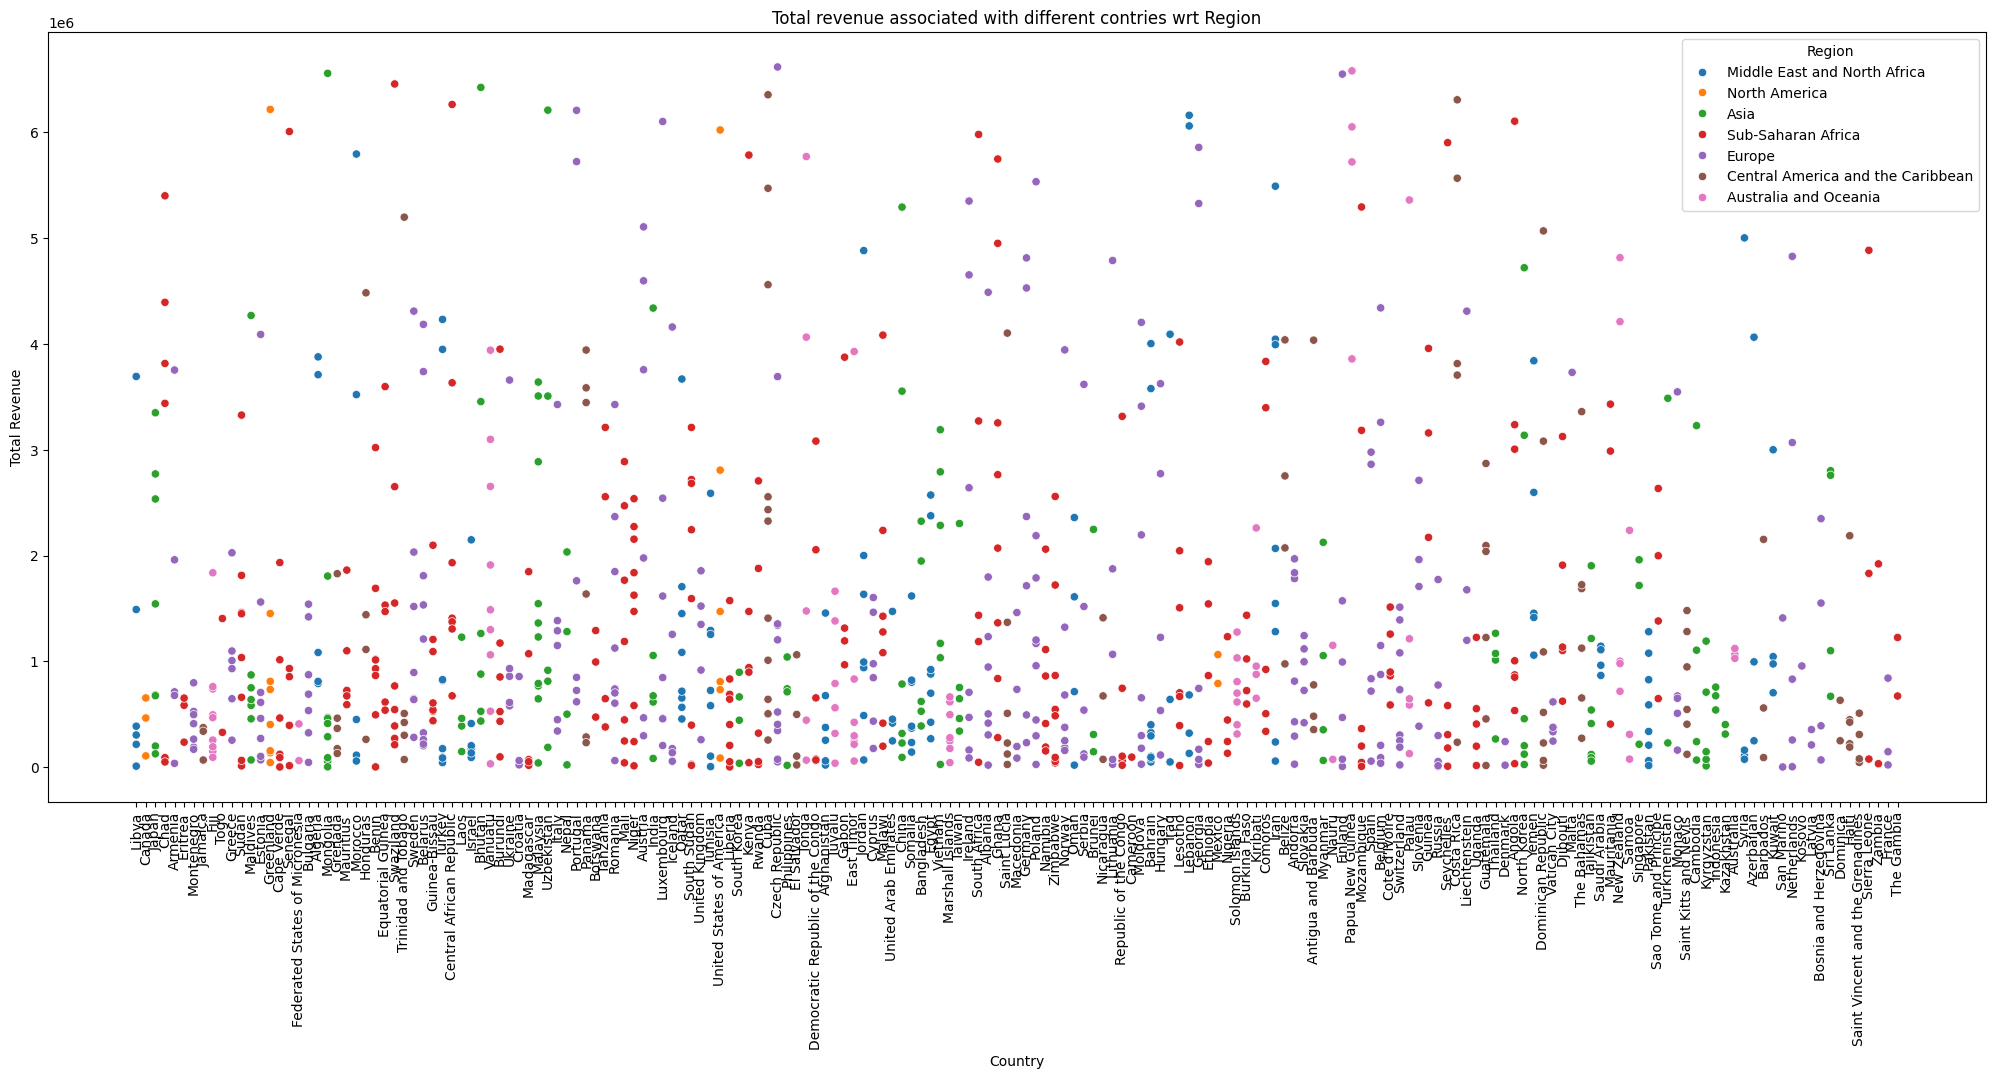

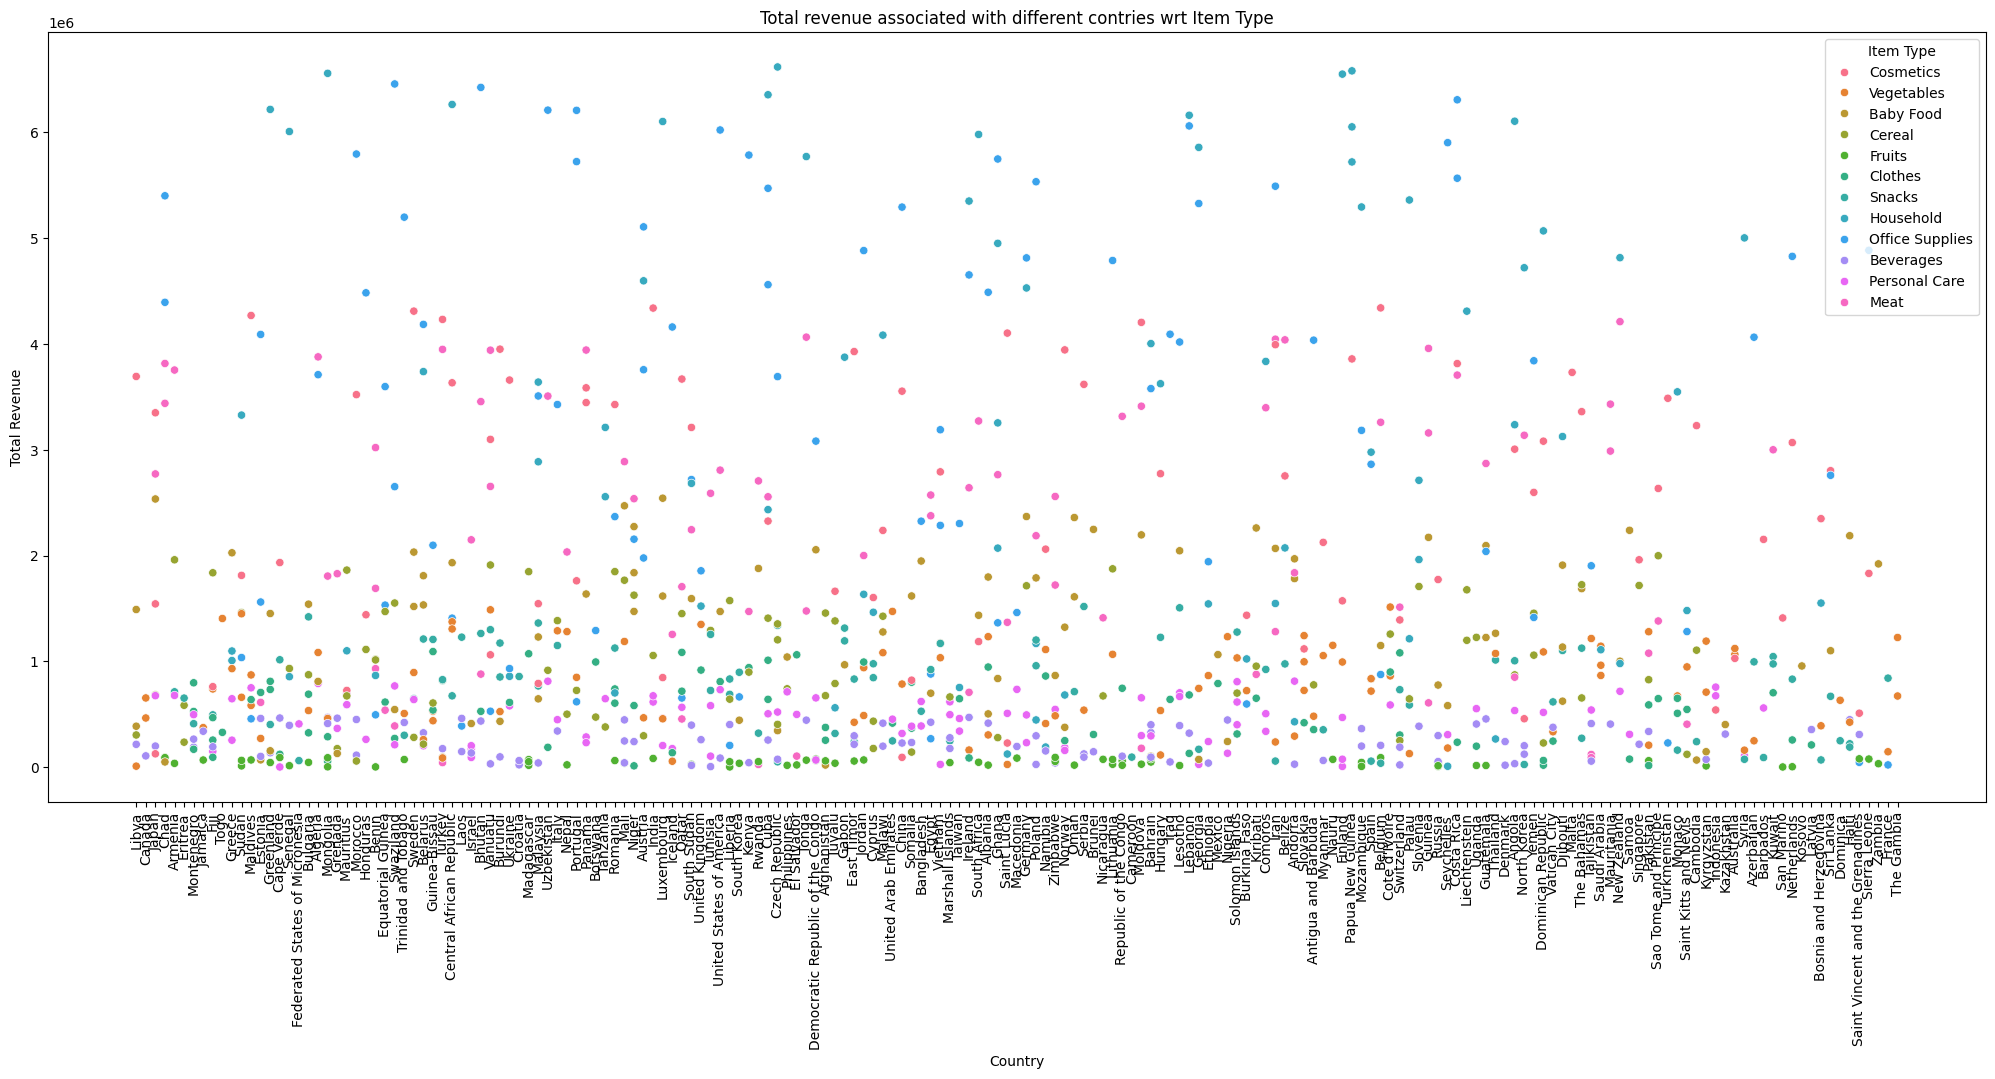

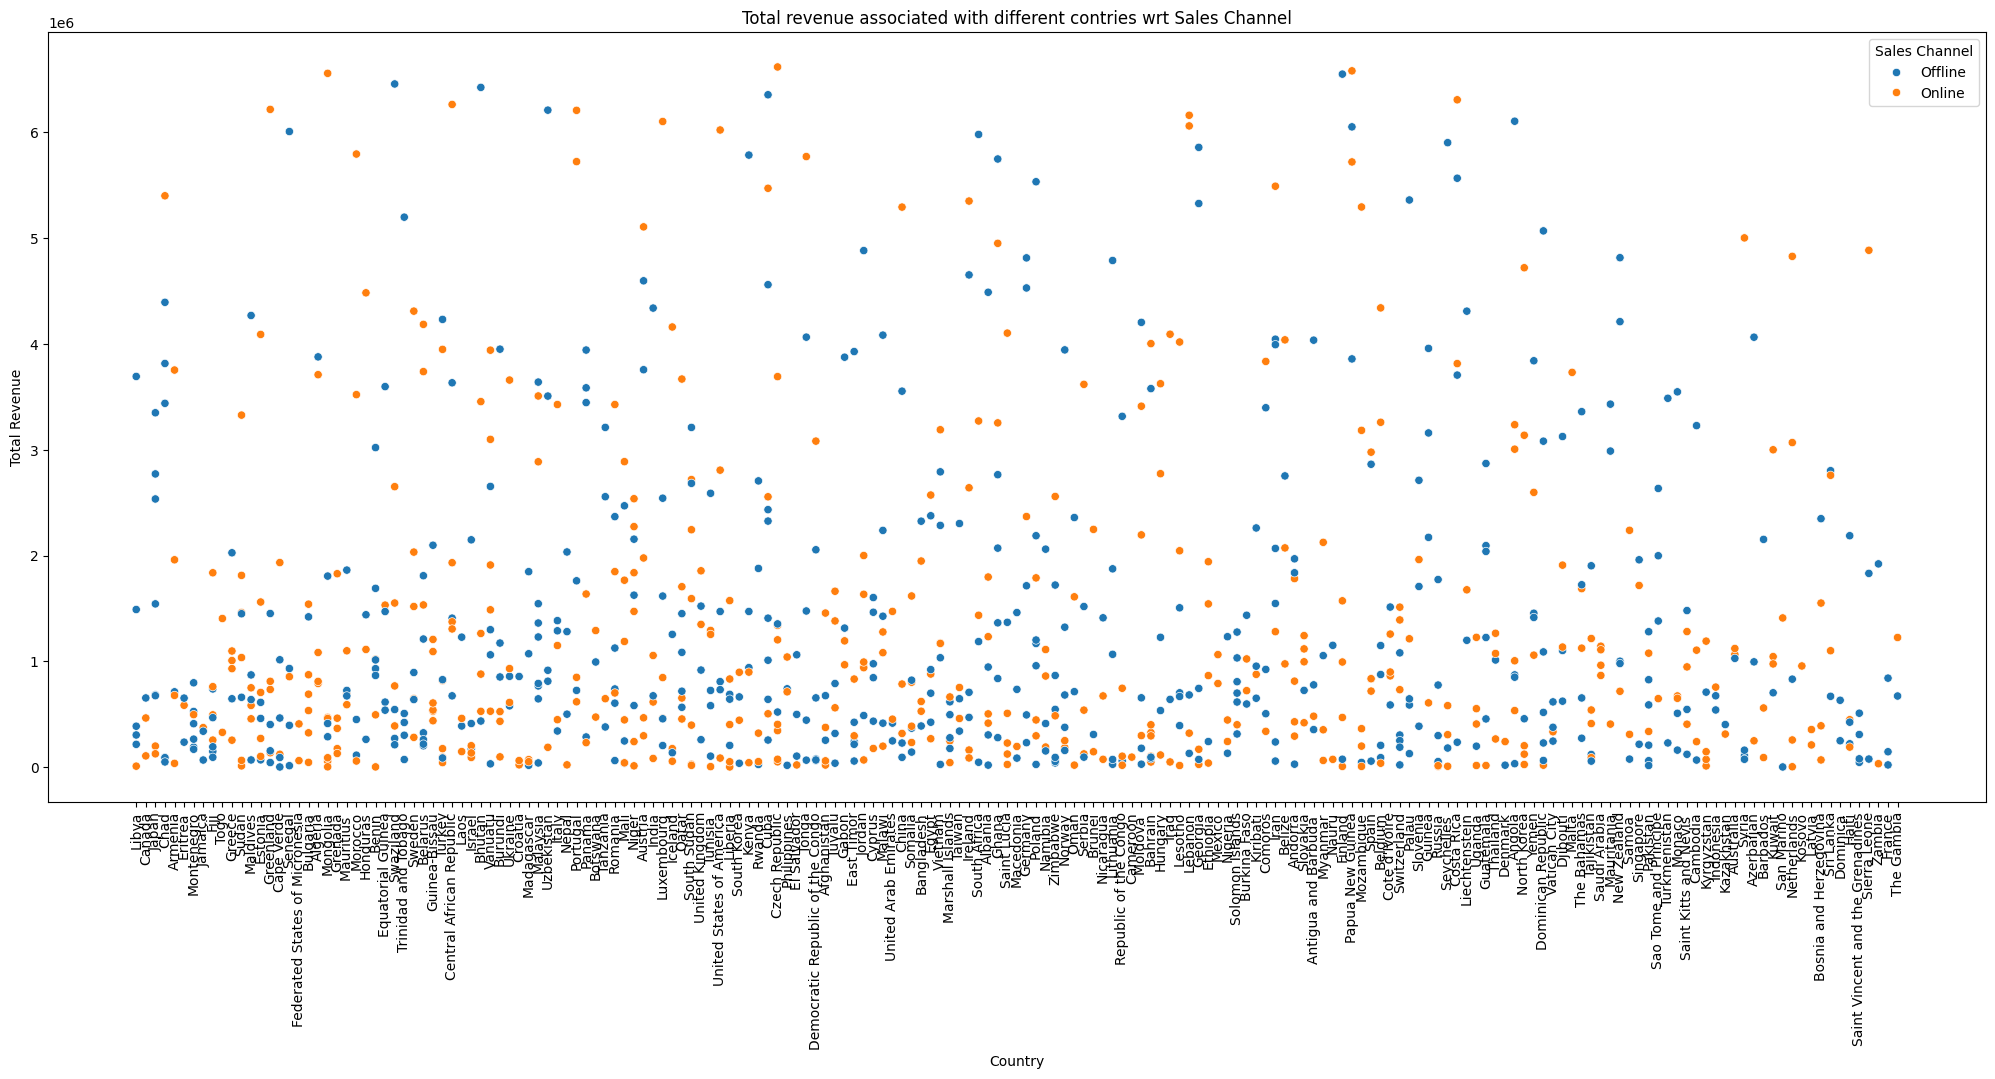

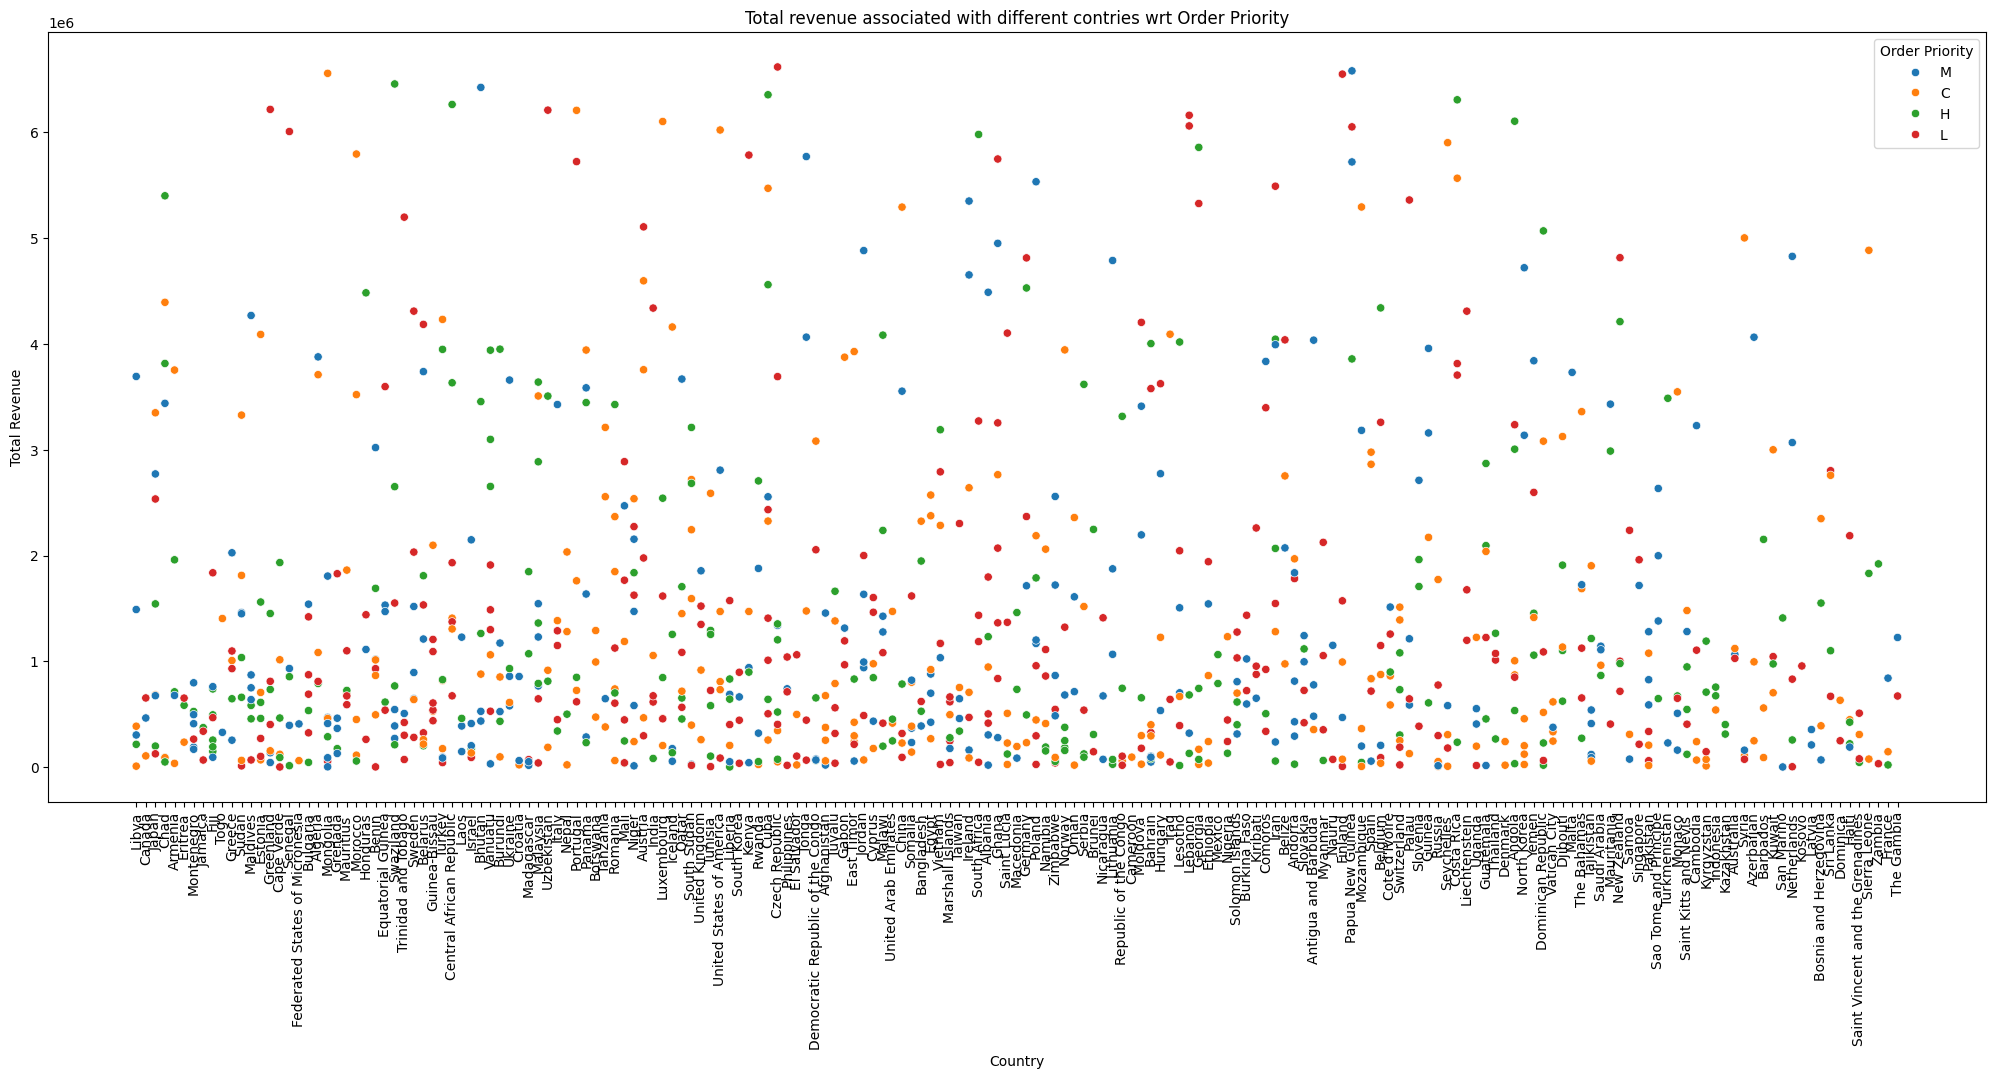

In [22]:
column_for_hue = ['Region',	'Item Type', 'Sales Channel', 'Order Priority']
for i in column_for_hue:
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=df,x="Country",y="Total Revenue", hue=i)
    plt.xticks(rotation=90)
    plt.title(f'Total revenue associated with different contries wrt {i}')
    plt.legend(title=i)
    plt.show()

### Average days required to ship for the order as per Region, Country, Item type, Sales channel and Order priority.

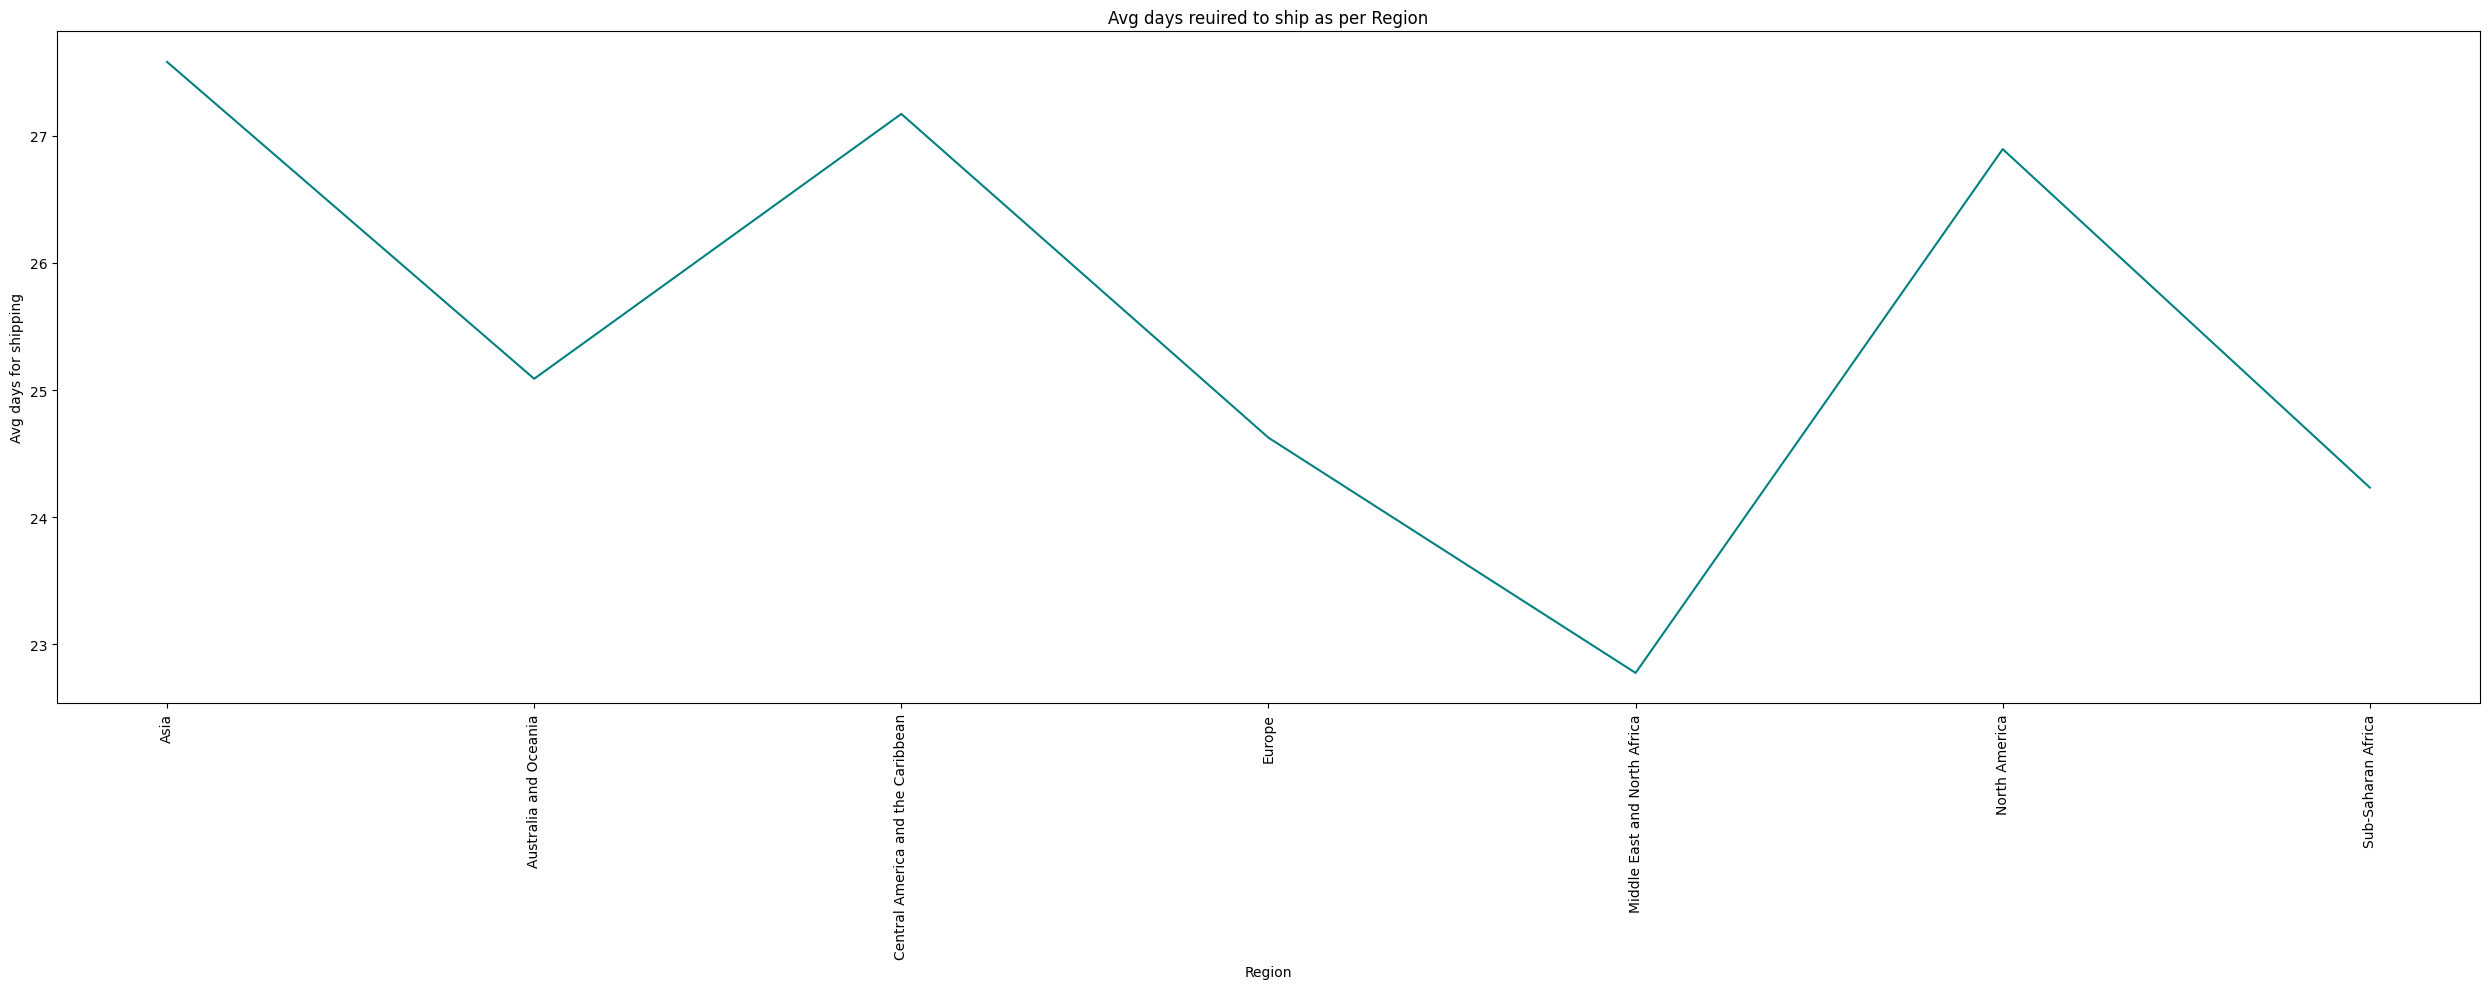

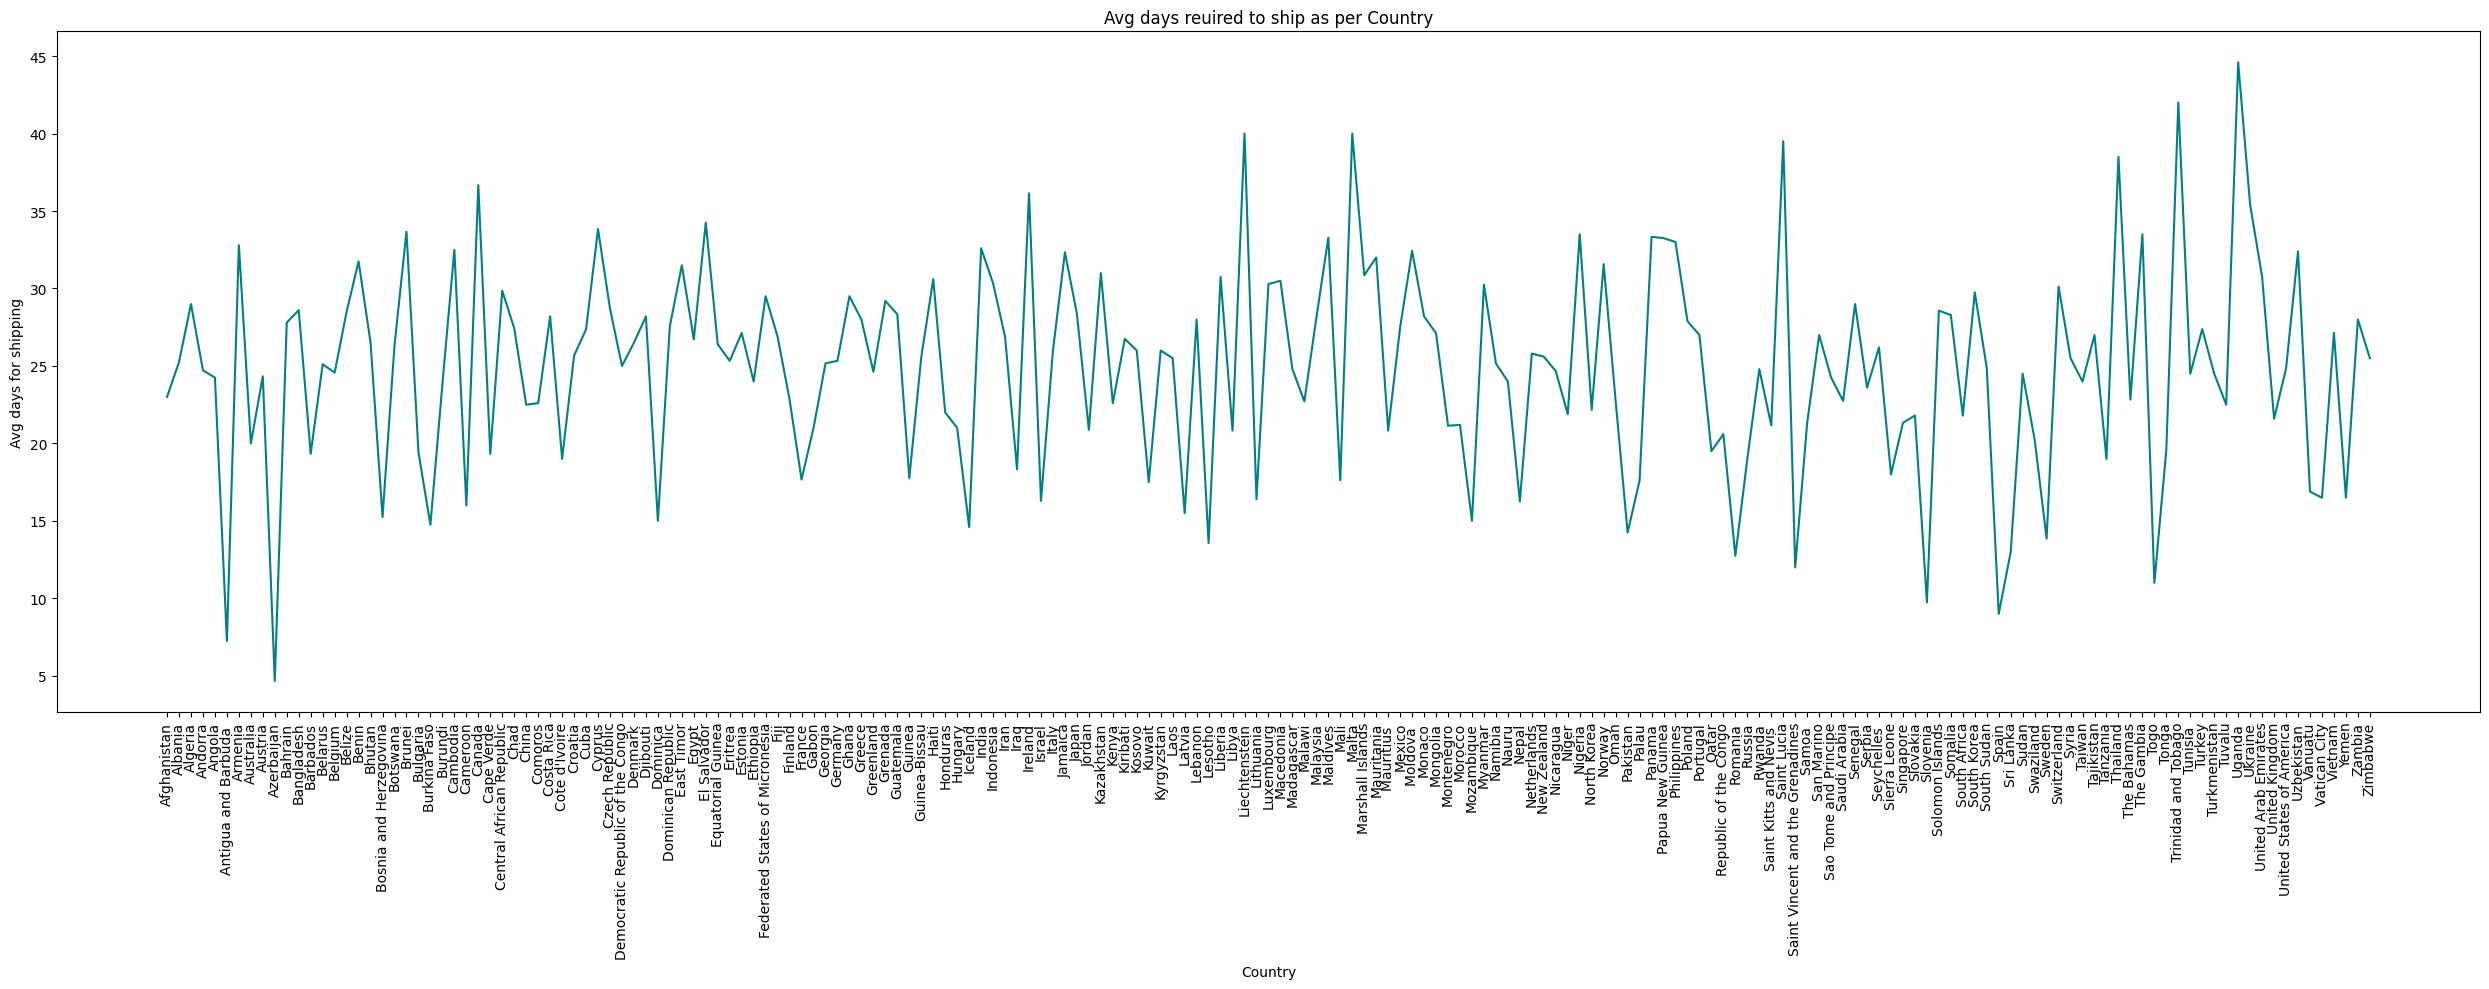

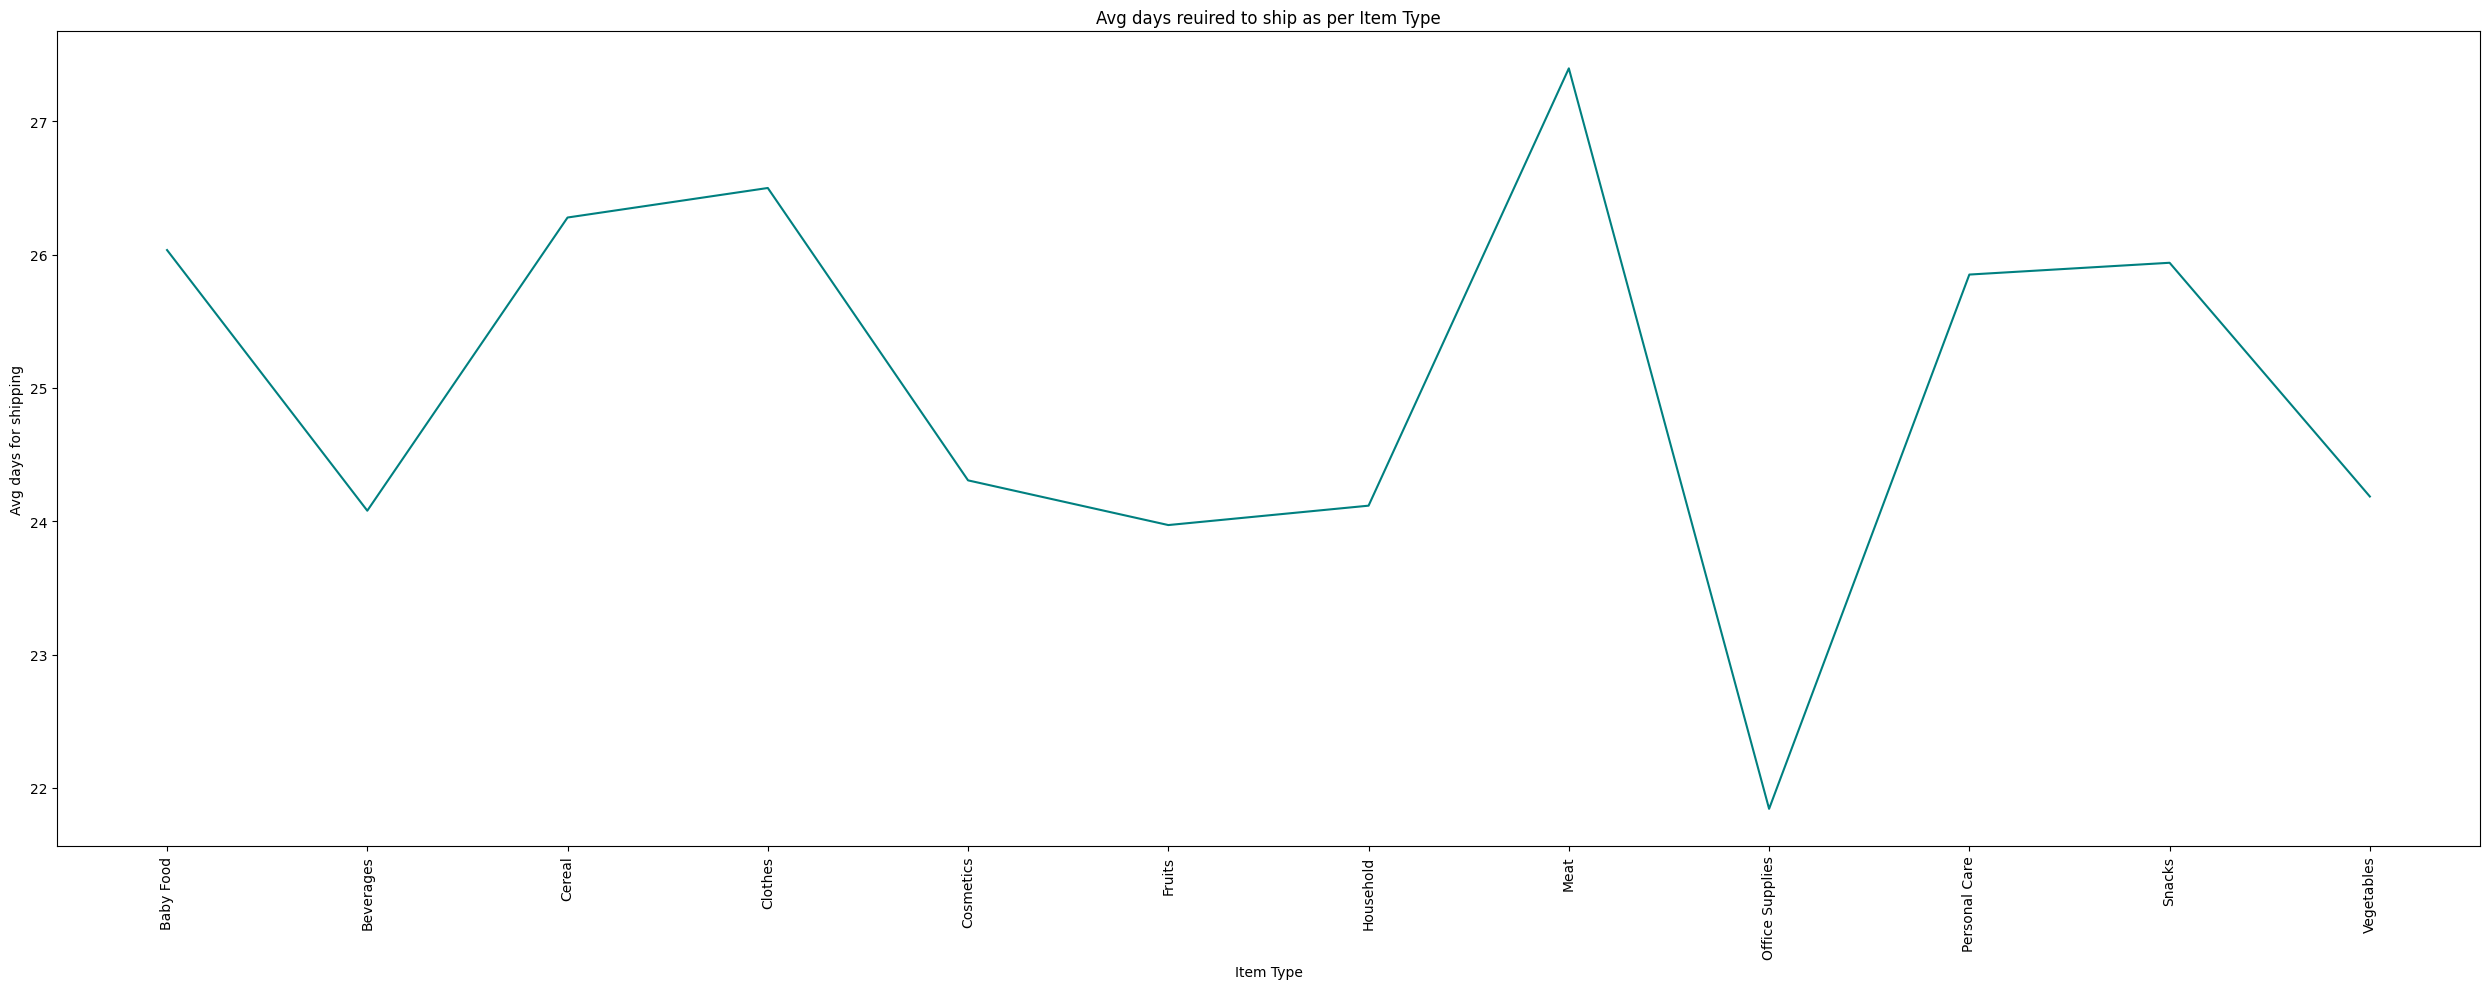

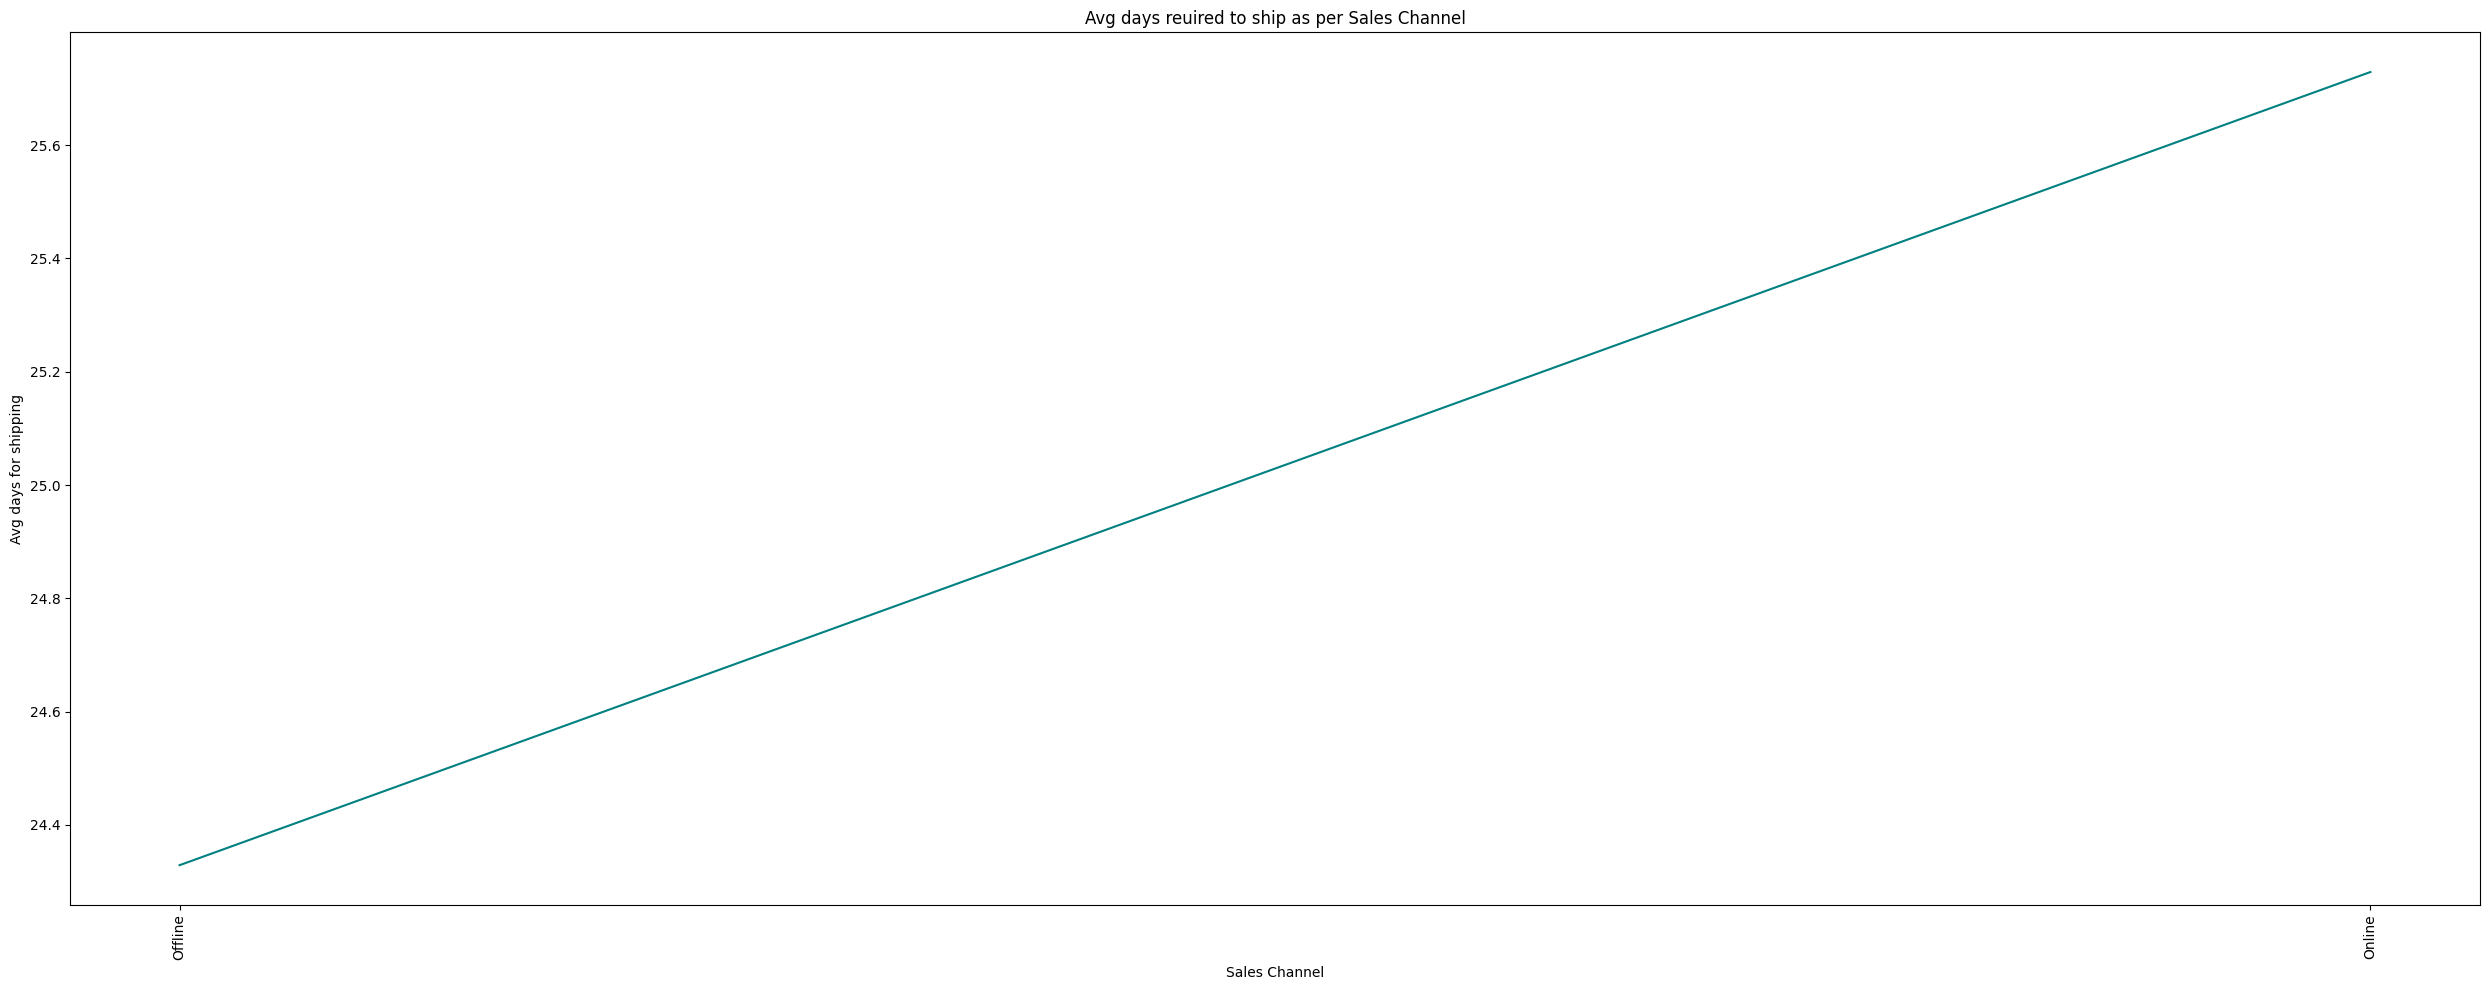

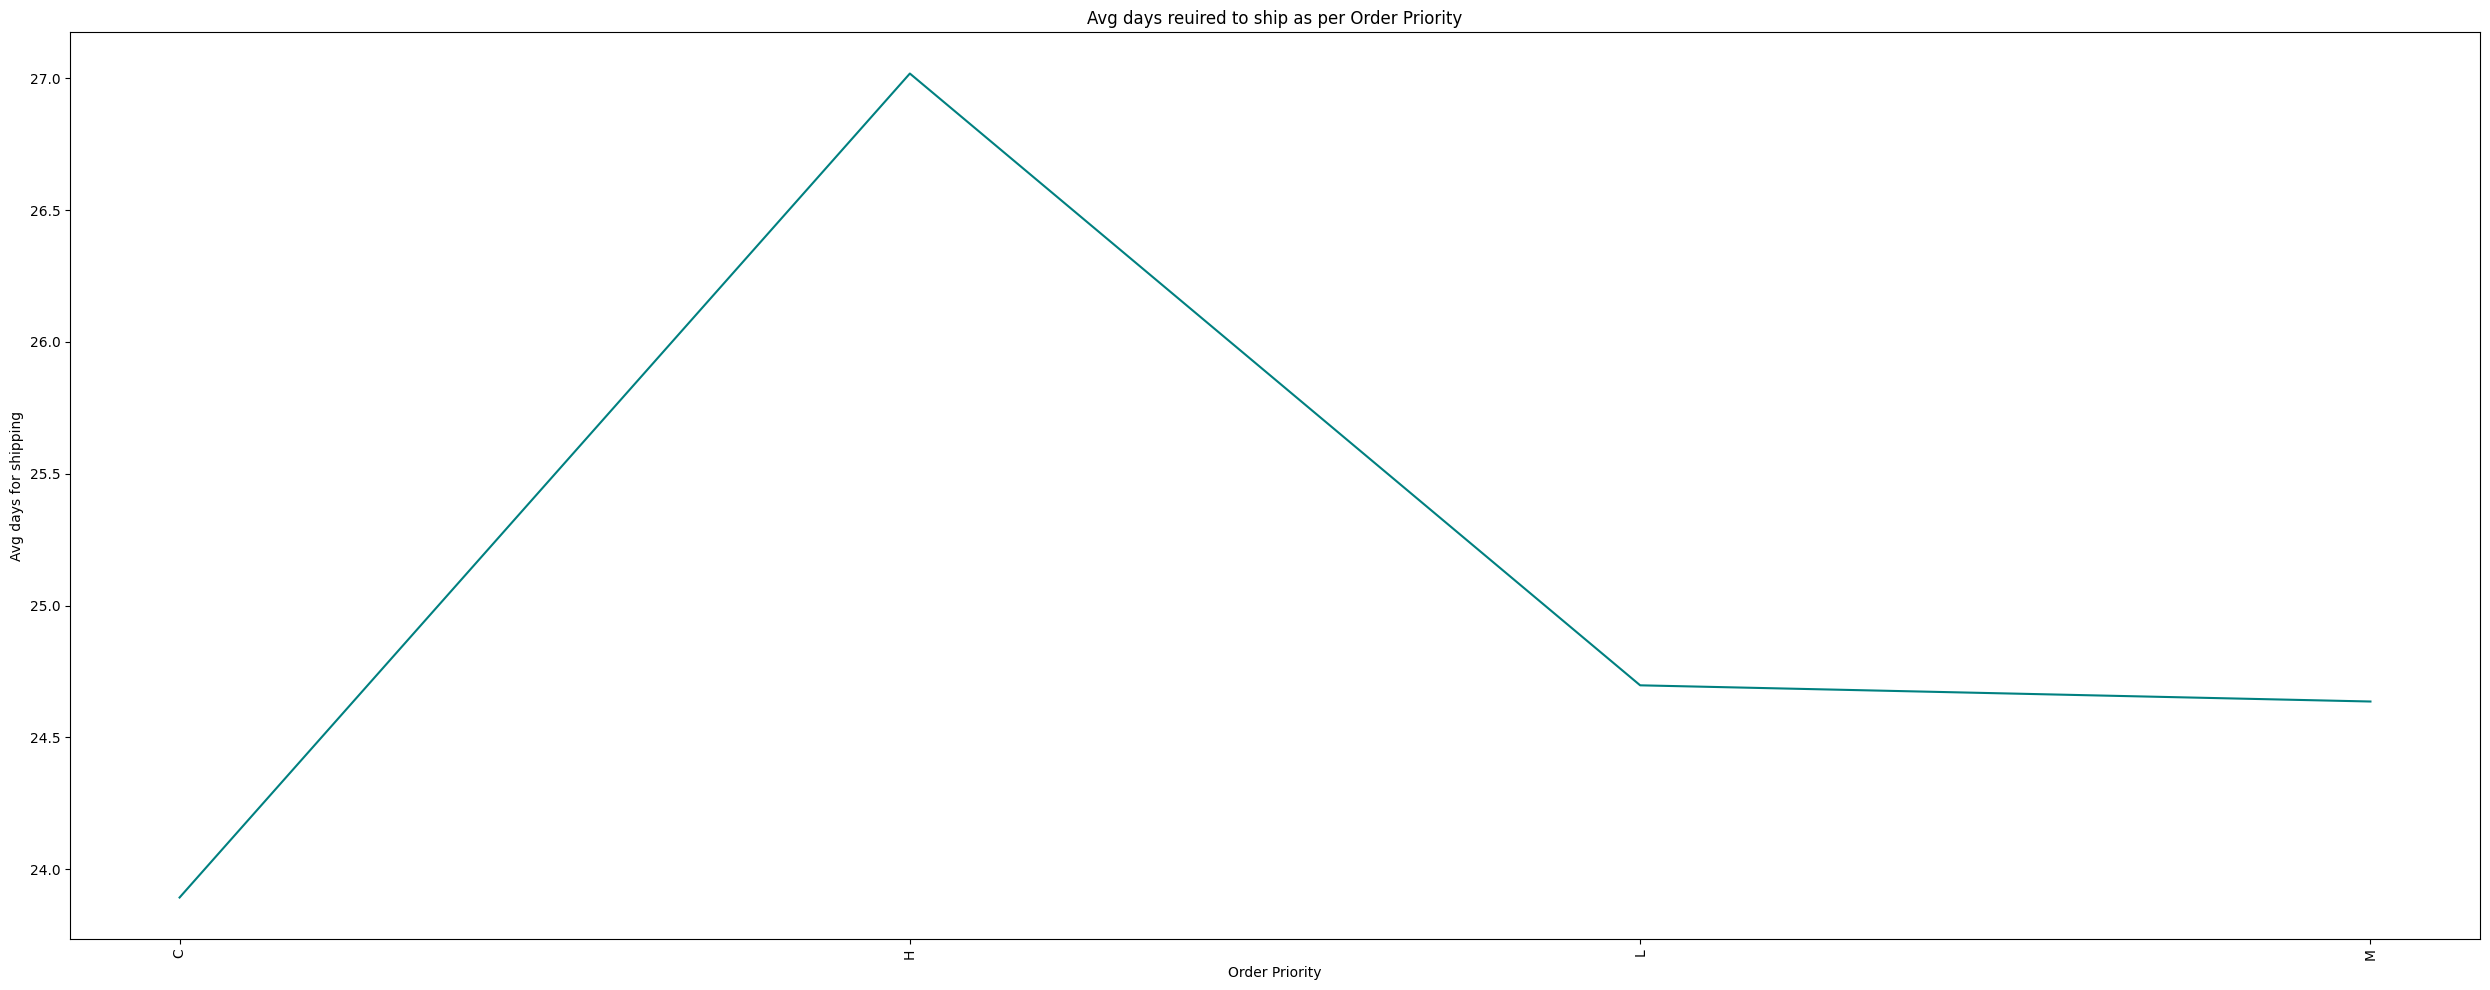

In [23]:
for i in df.columns:
    if i in [ 'Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority' ]:
        avg_daystoship=df.groupby(i)['Days to Ship'].mean()
        plt.figure(figsize=(25,10))
        plt.plot(avg_daystoship.index, avg_daystoship.values, color='teal')
        plt.xlabel(i)
        plt.ylabel('Avg days for shipping')
        plt.title(f'Avg days reuired to ship as per {i}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

### Total unit price as per Region, Item type, Sales channel, Order priority and Country.

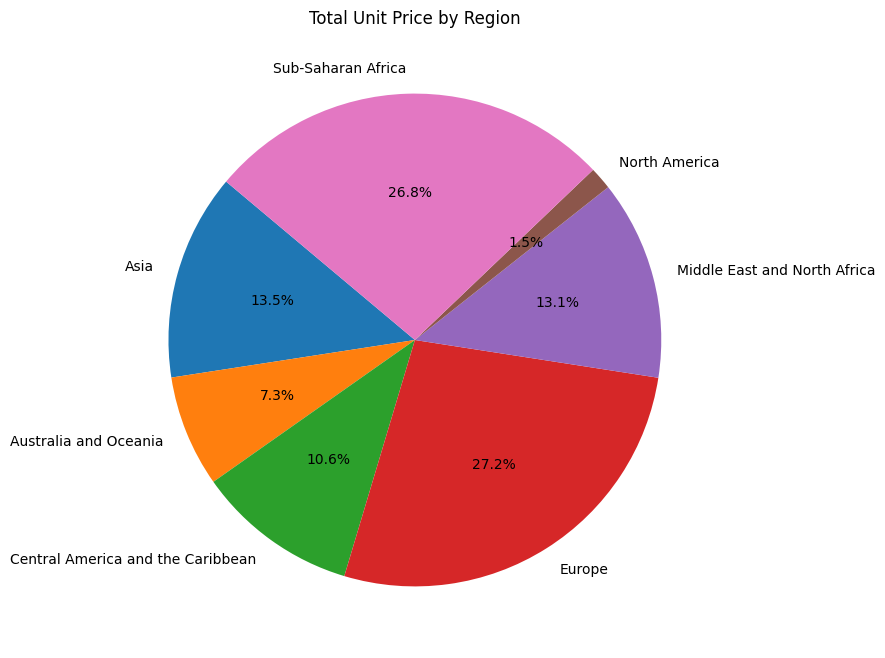

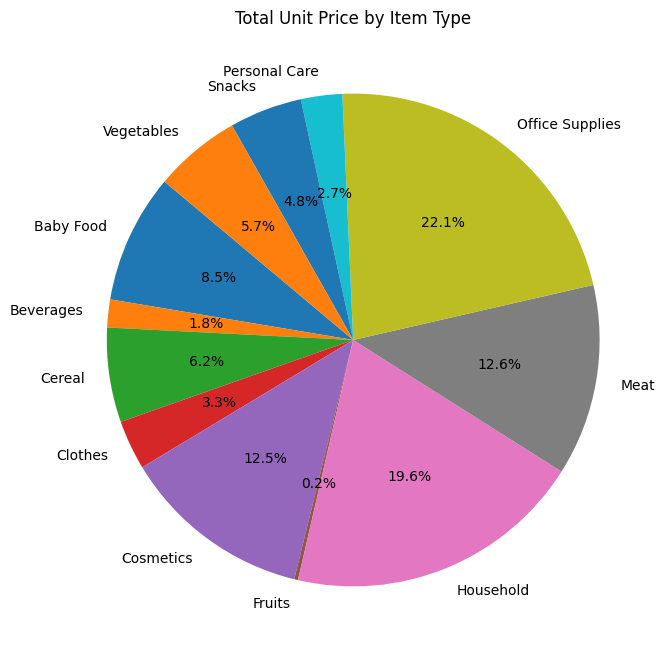

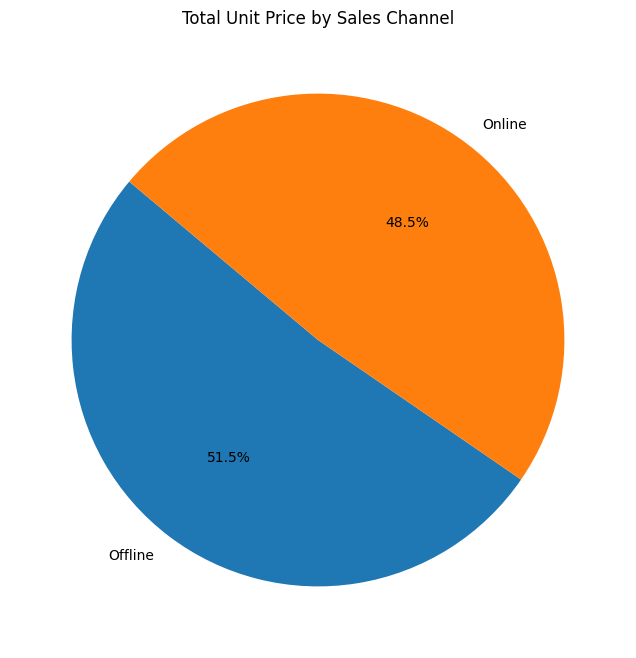

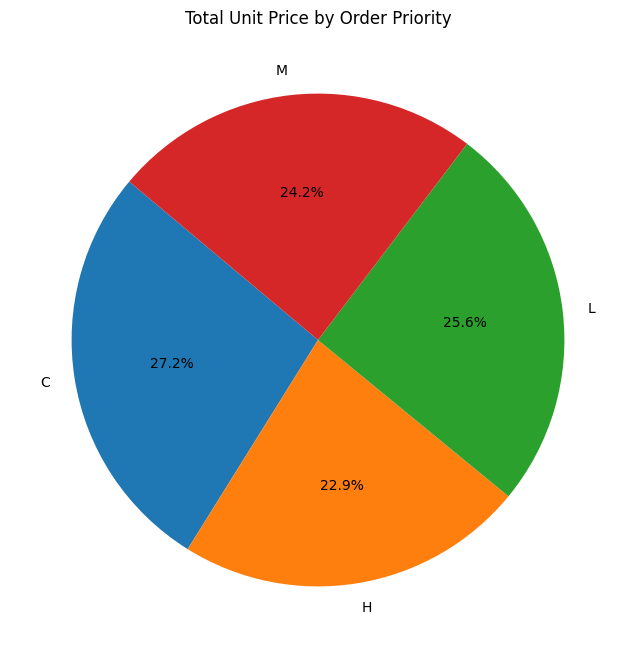

In [24]:
for i in df.columns:
    if i in ['Region', 'Item Type', 'Sales Channel', 'Order Priority']:
        total_unitprice = df.groupby(i)['Unit Price'].sum()
        plt.figure(figsize=(8, 8))
        total_unitprice.plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title(f'Total Unit Price by {i}')
        plt.ylabel('')  # Hide y-axis label
        plt.show()

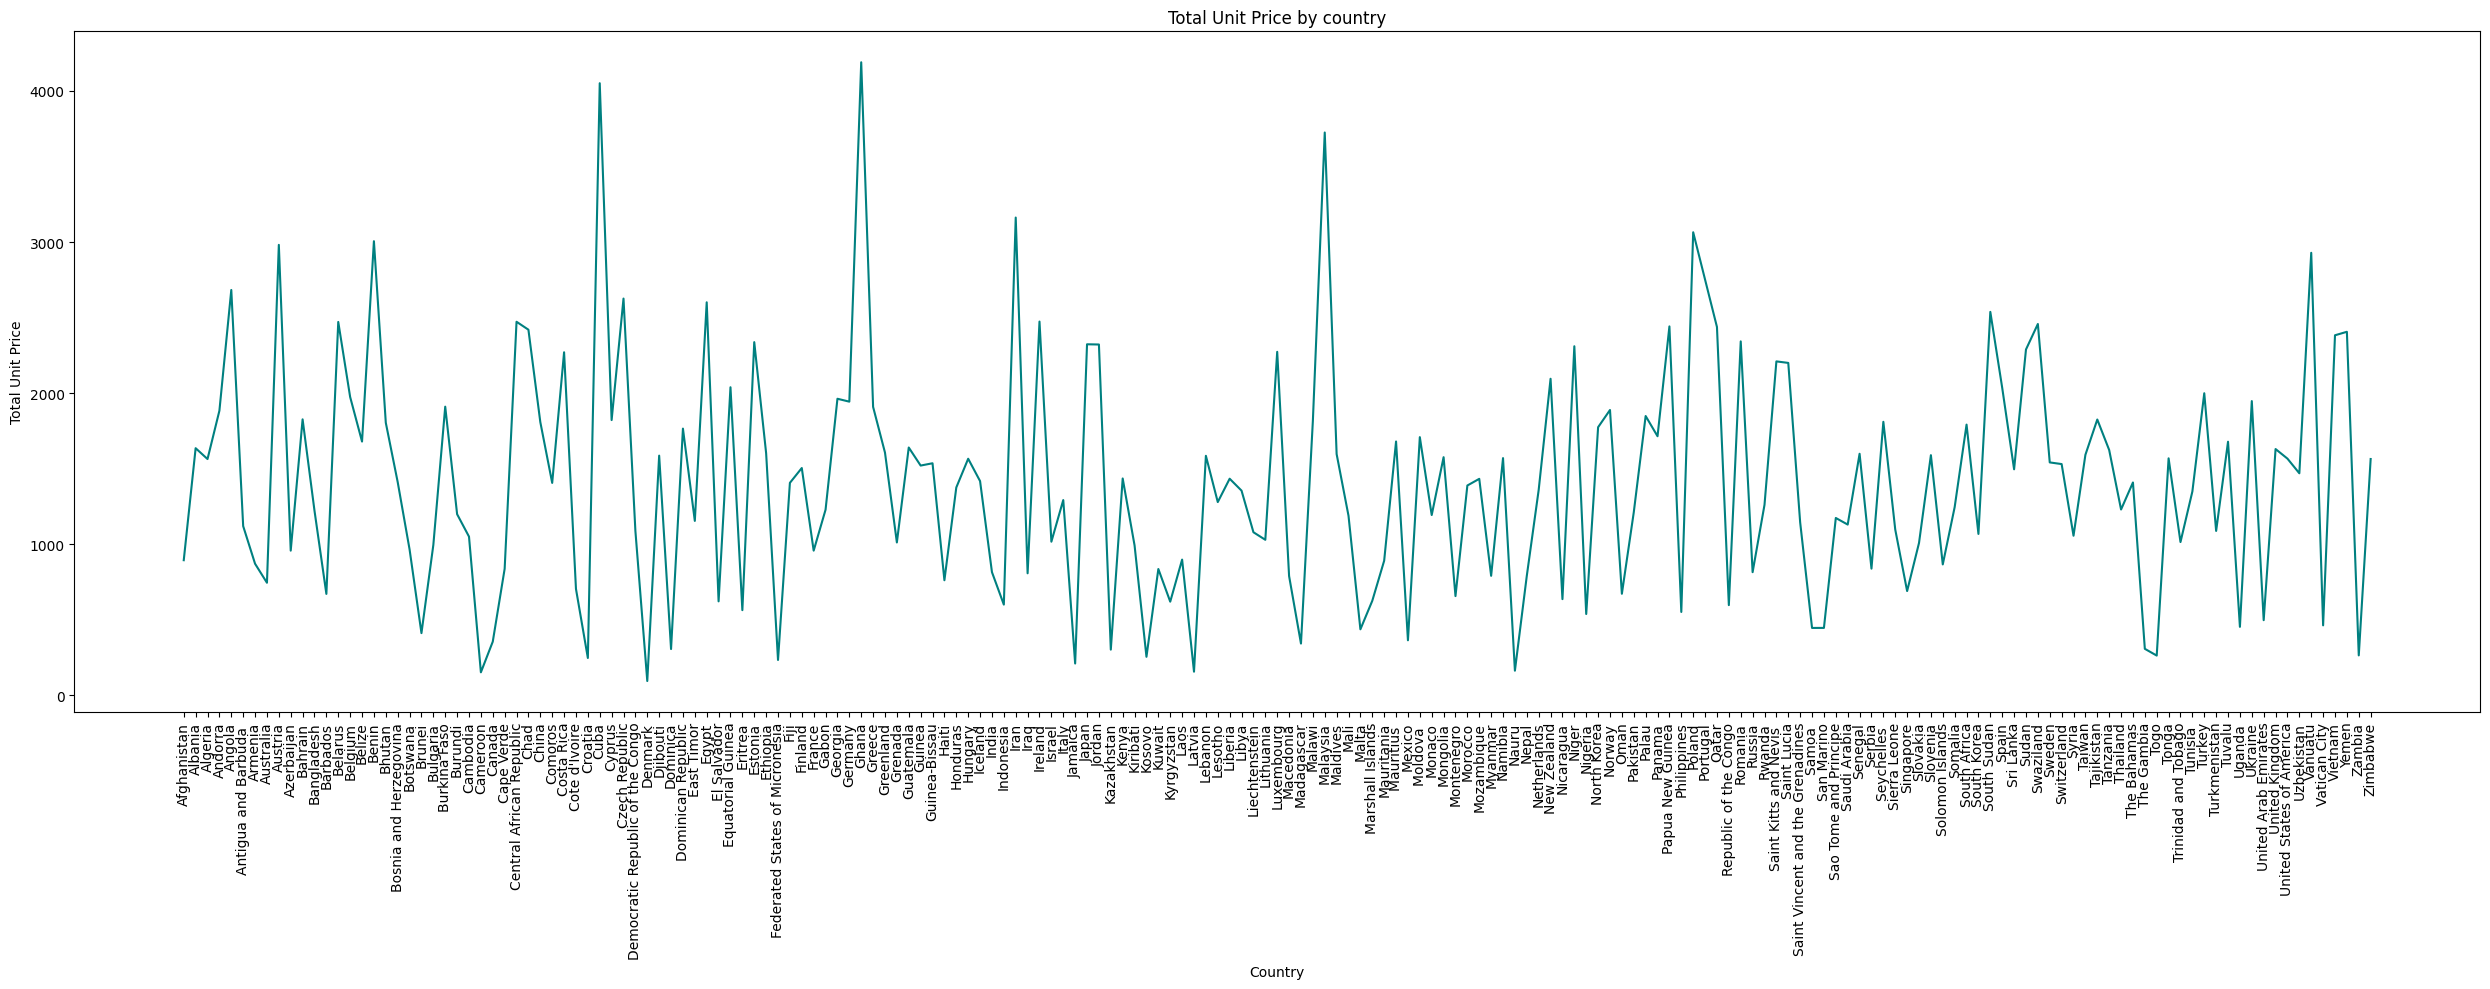

In [25]:
total_countryunitprice = df.groupby('Country')['Unit Price'].sum()
plt.figure(figsize=(25, 10))
plt.plot(total_countryunitprice.index, total_countryunitprice.values, color= 'teal')
plt.xlabel('Country')
plt.ylabel('Total Unit Price')
plt.title(f'Total Unit Price by country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Total Unit cost as per Region, Item type, Sales channel, Order priority and country.

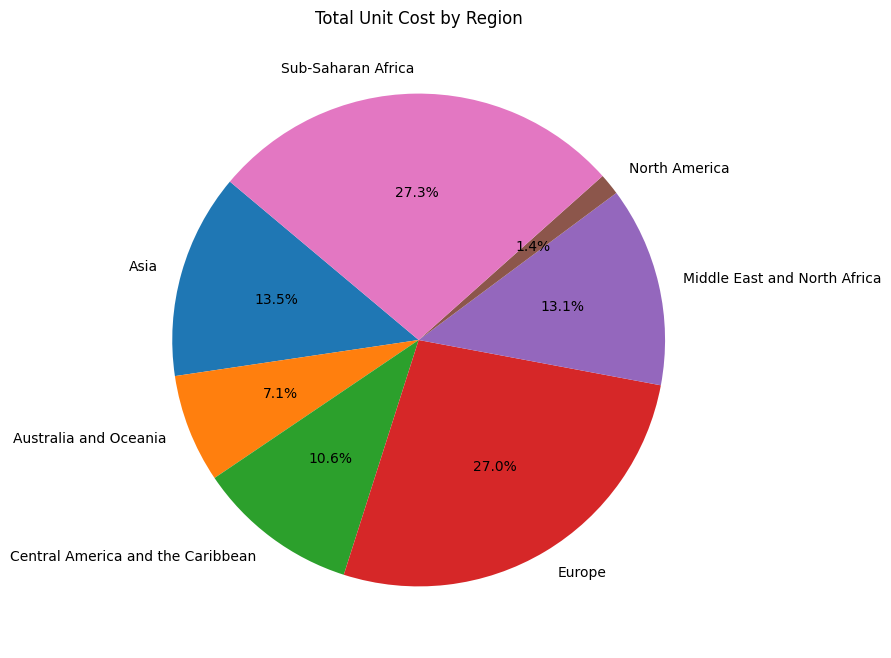

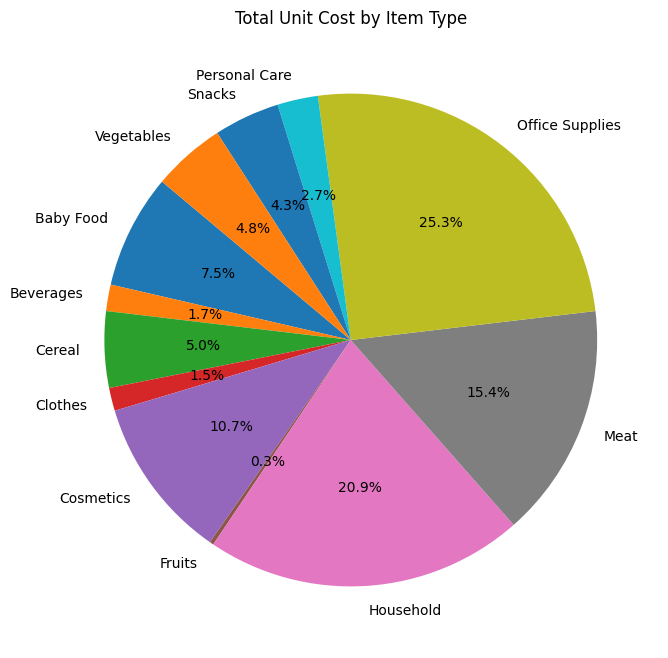

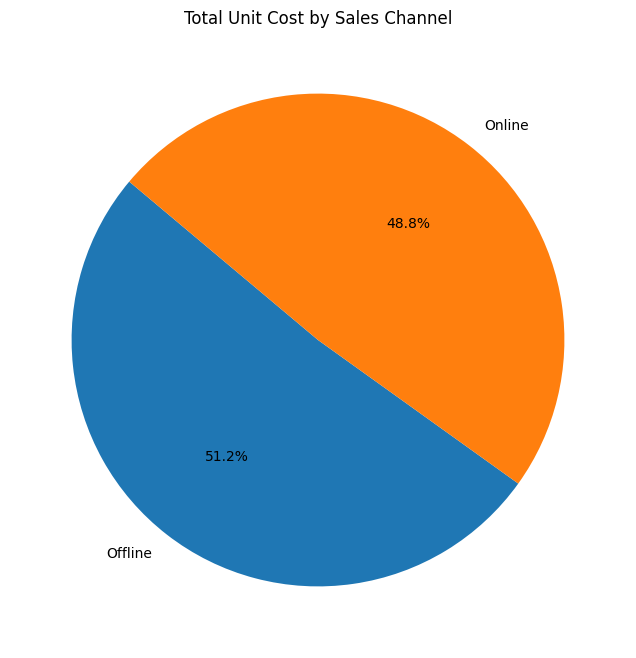

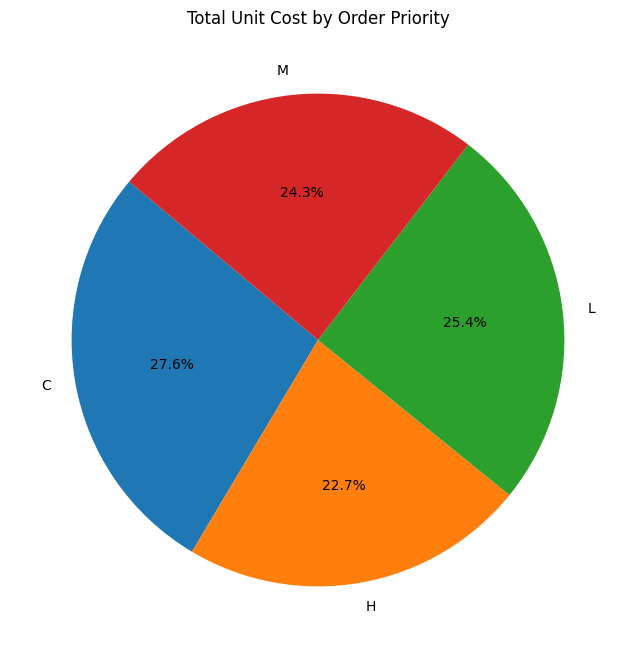

In [26]:
for i in df.columns:
    if i in ['Region', 'Item Type', 'Sales Channel', 'Order Priority']:
        total_unitcost = df.groupby(i)['Unit Cost'].sum()
        plt.figure(figsize=(8, 8))
        total_unitcost.plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title(f'Total Unit Cost by {i}')
        plt.ylabel('')  # Hide y-axis label
        plt.show()

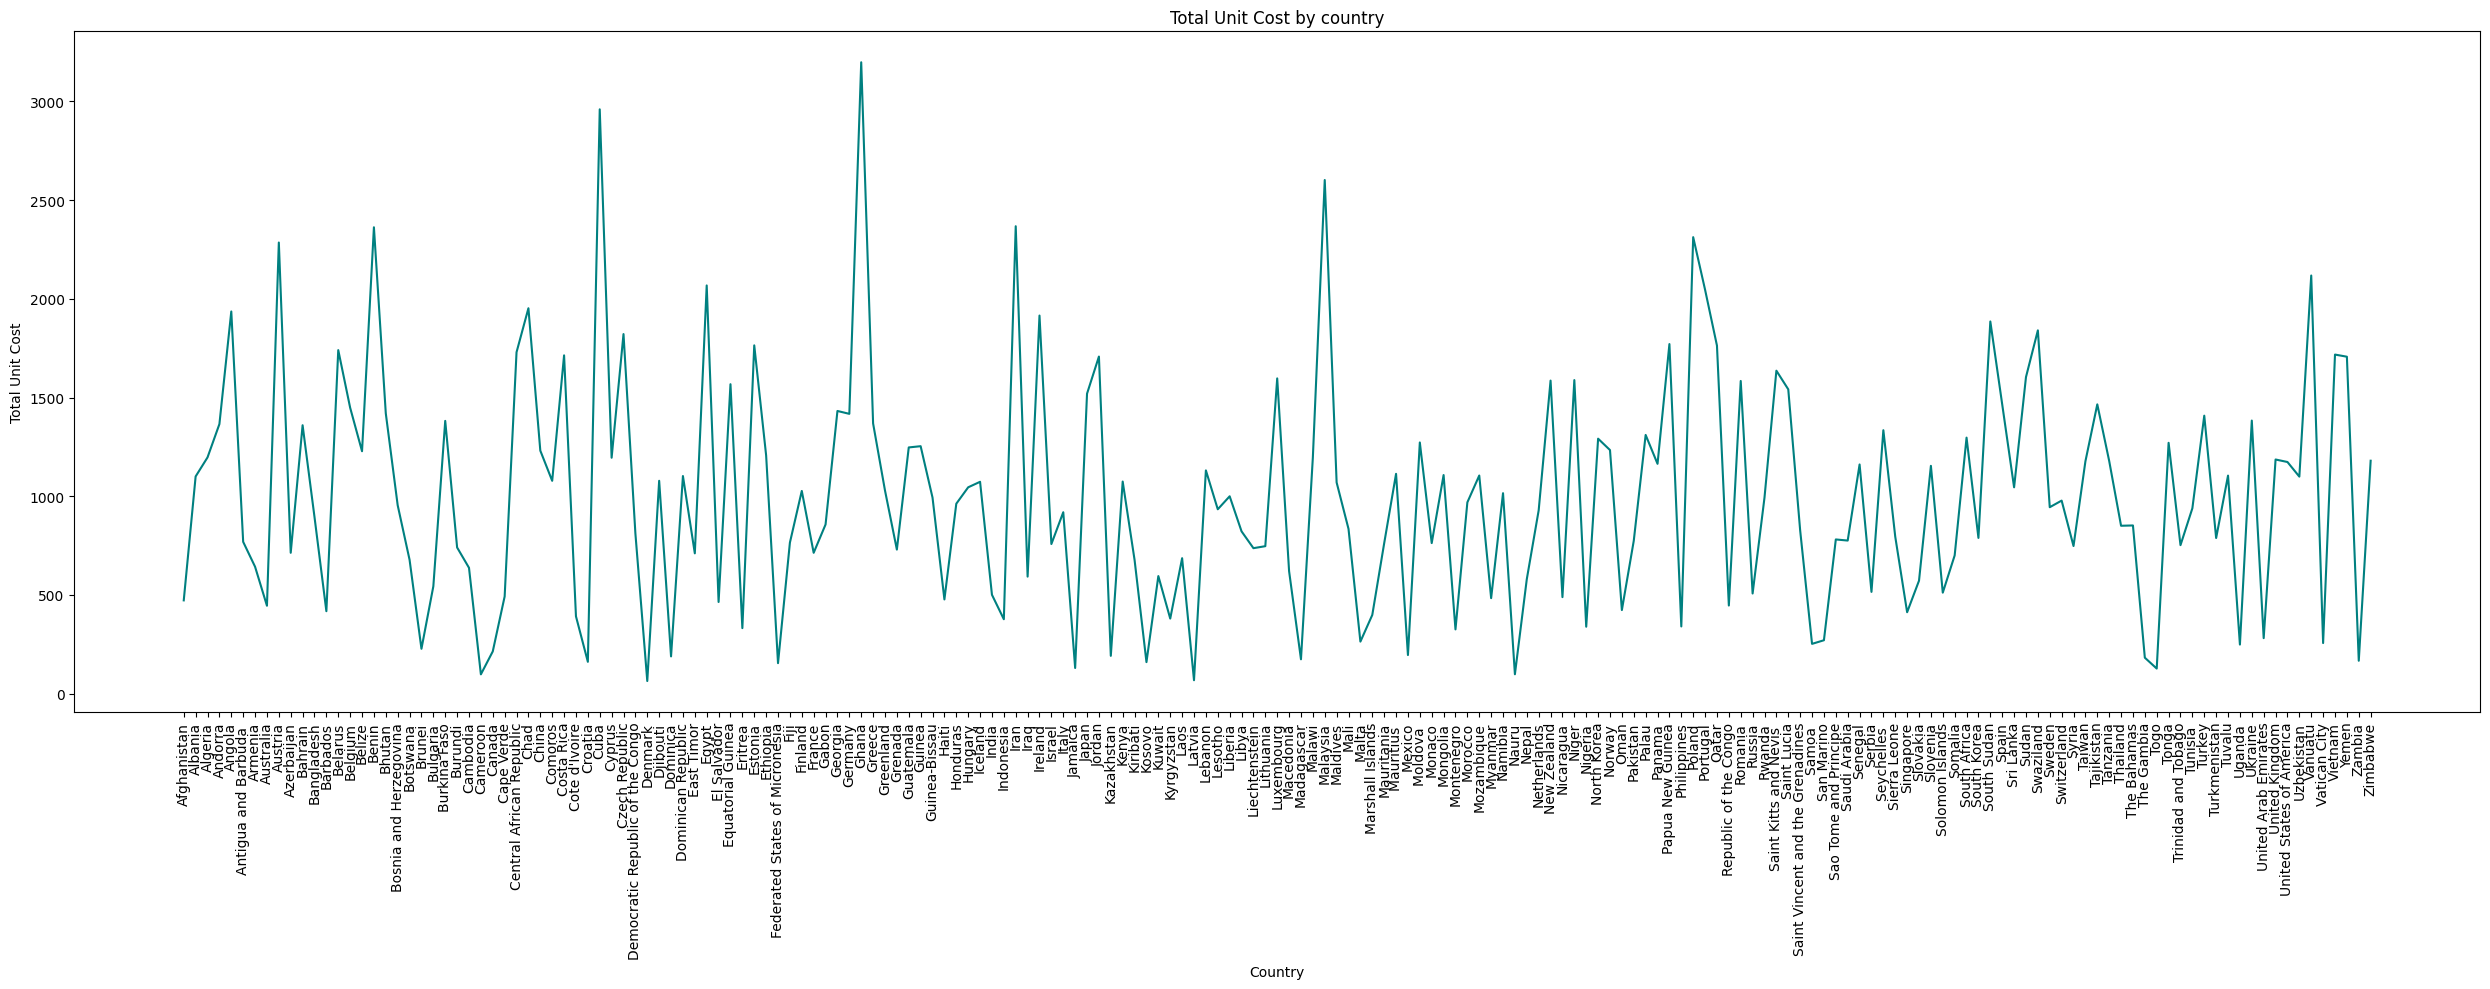

In [27]:
total_countryunitcost = df.groupby('Country')['Unit Cost'].sum()
plt.figure(figsize=(25, 10))
plt.plot(total_countryunitcost.index, total_countryunitcost.values, color= 'teal')
plt.xlabel('Country')
plt.ylabel('Total Unit Cost')
plt.title(f'Total Unit Cost by country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Total days required to ship the order as per country wrt Region, Item type, Sales channel and Order priority.

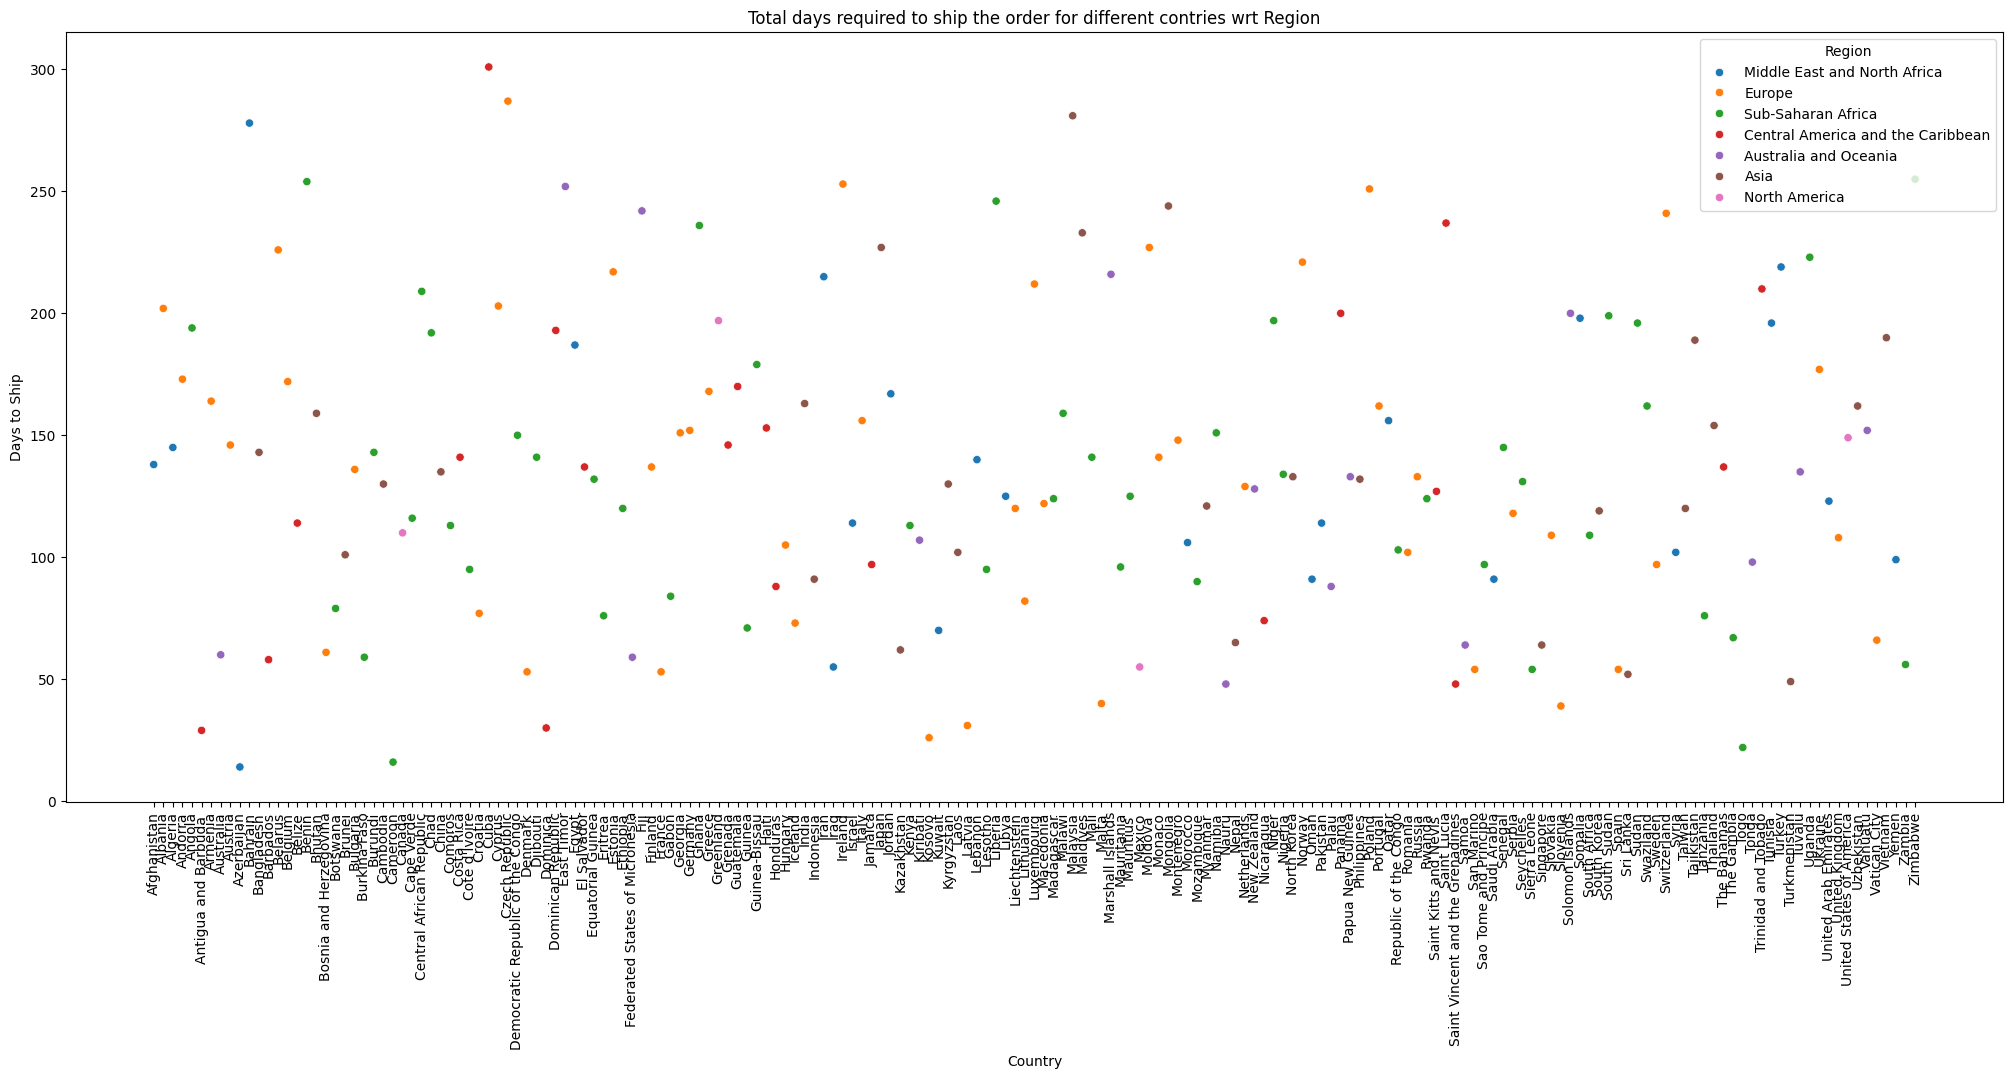

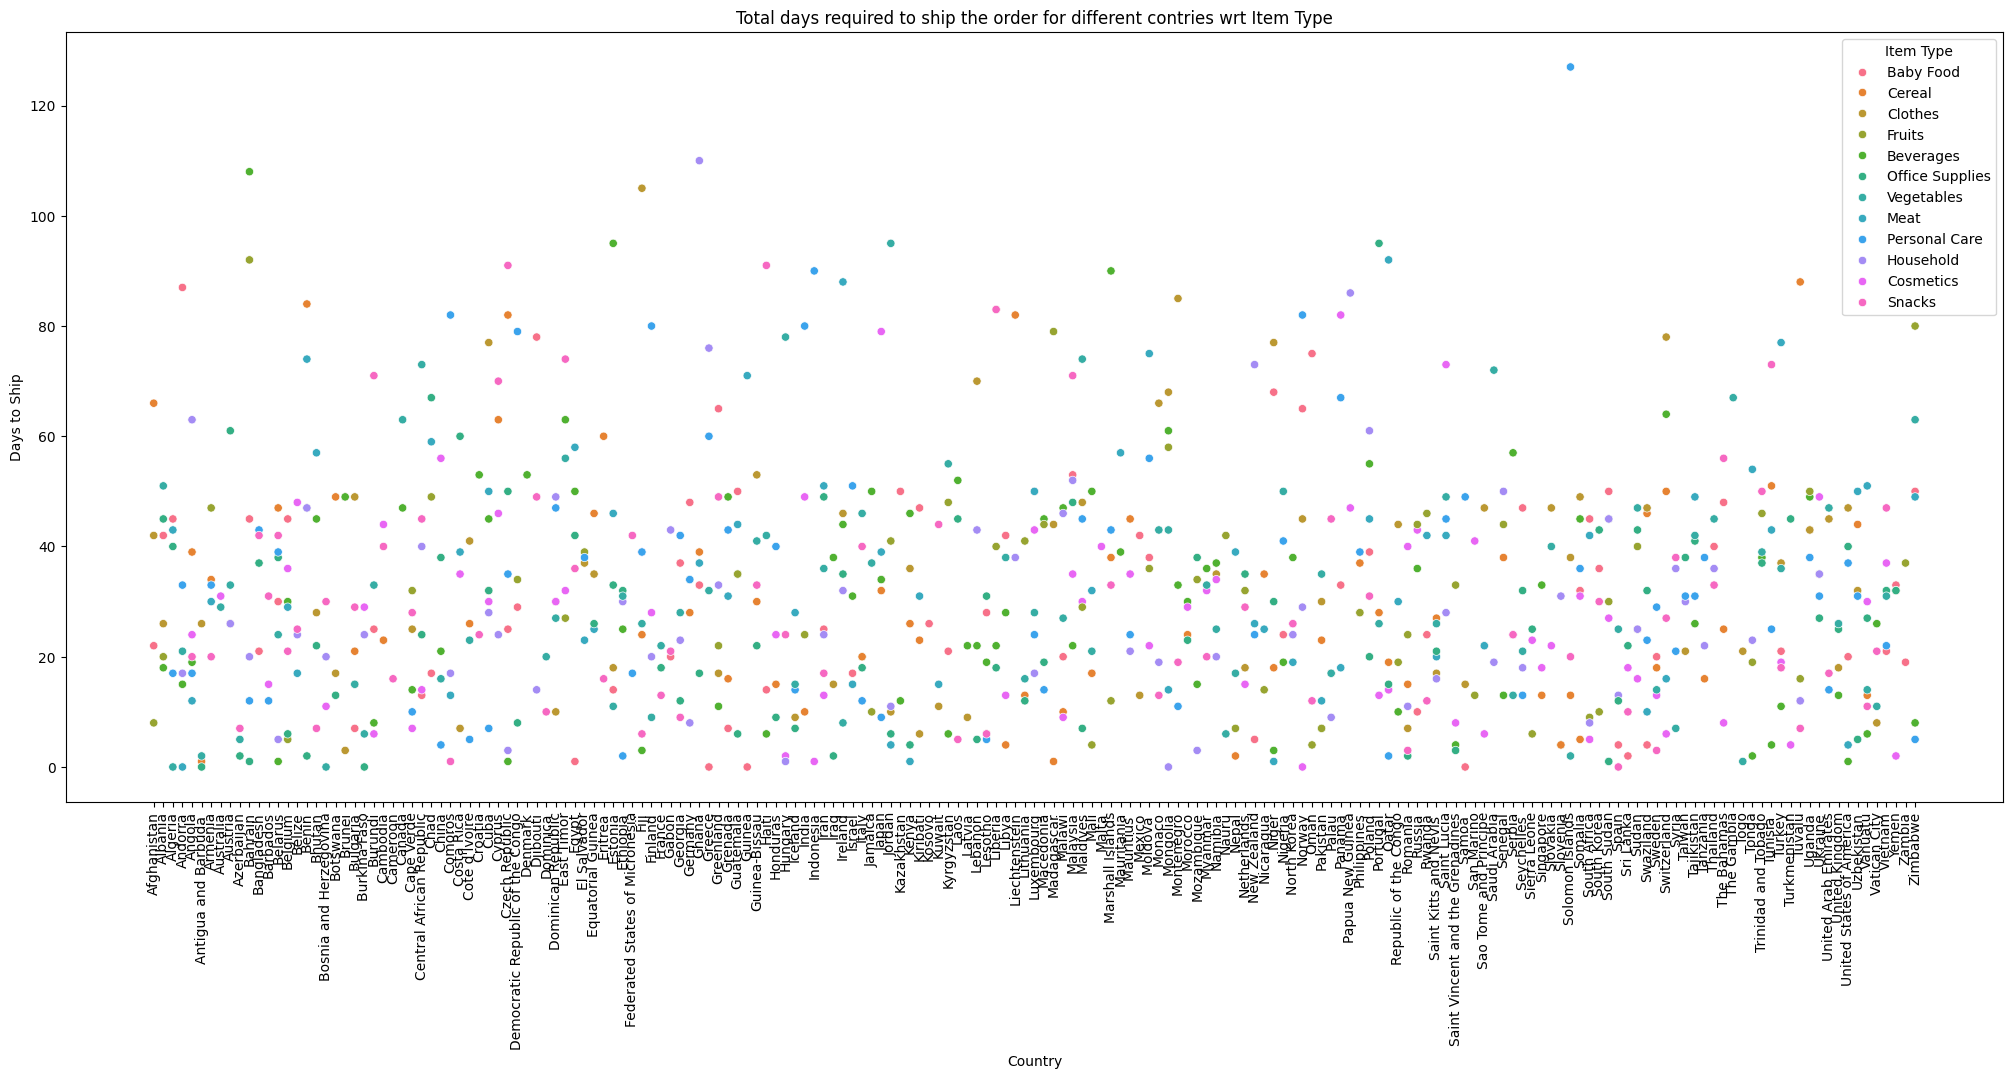

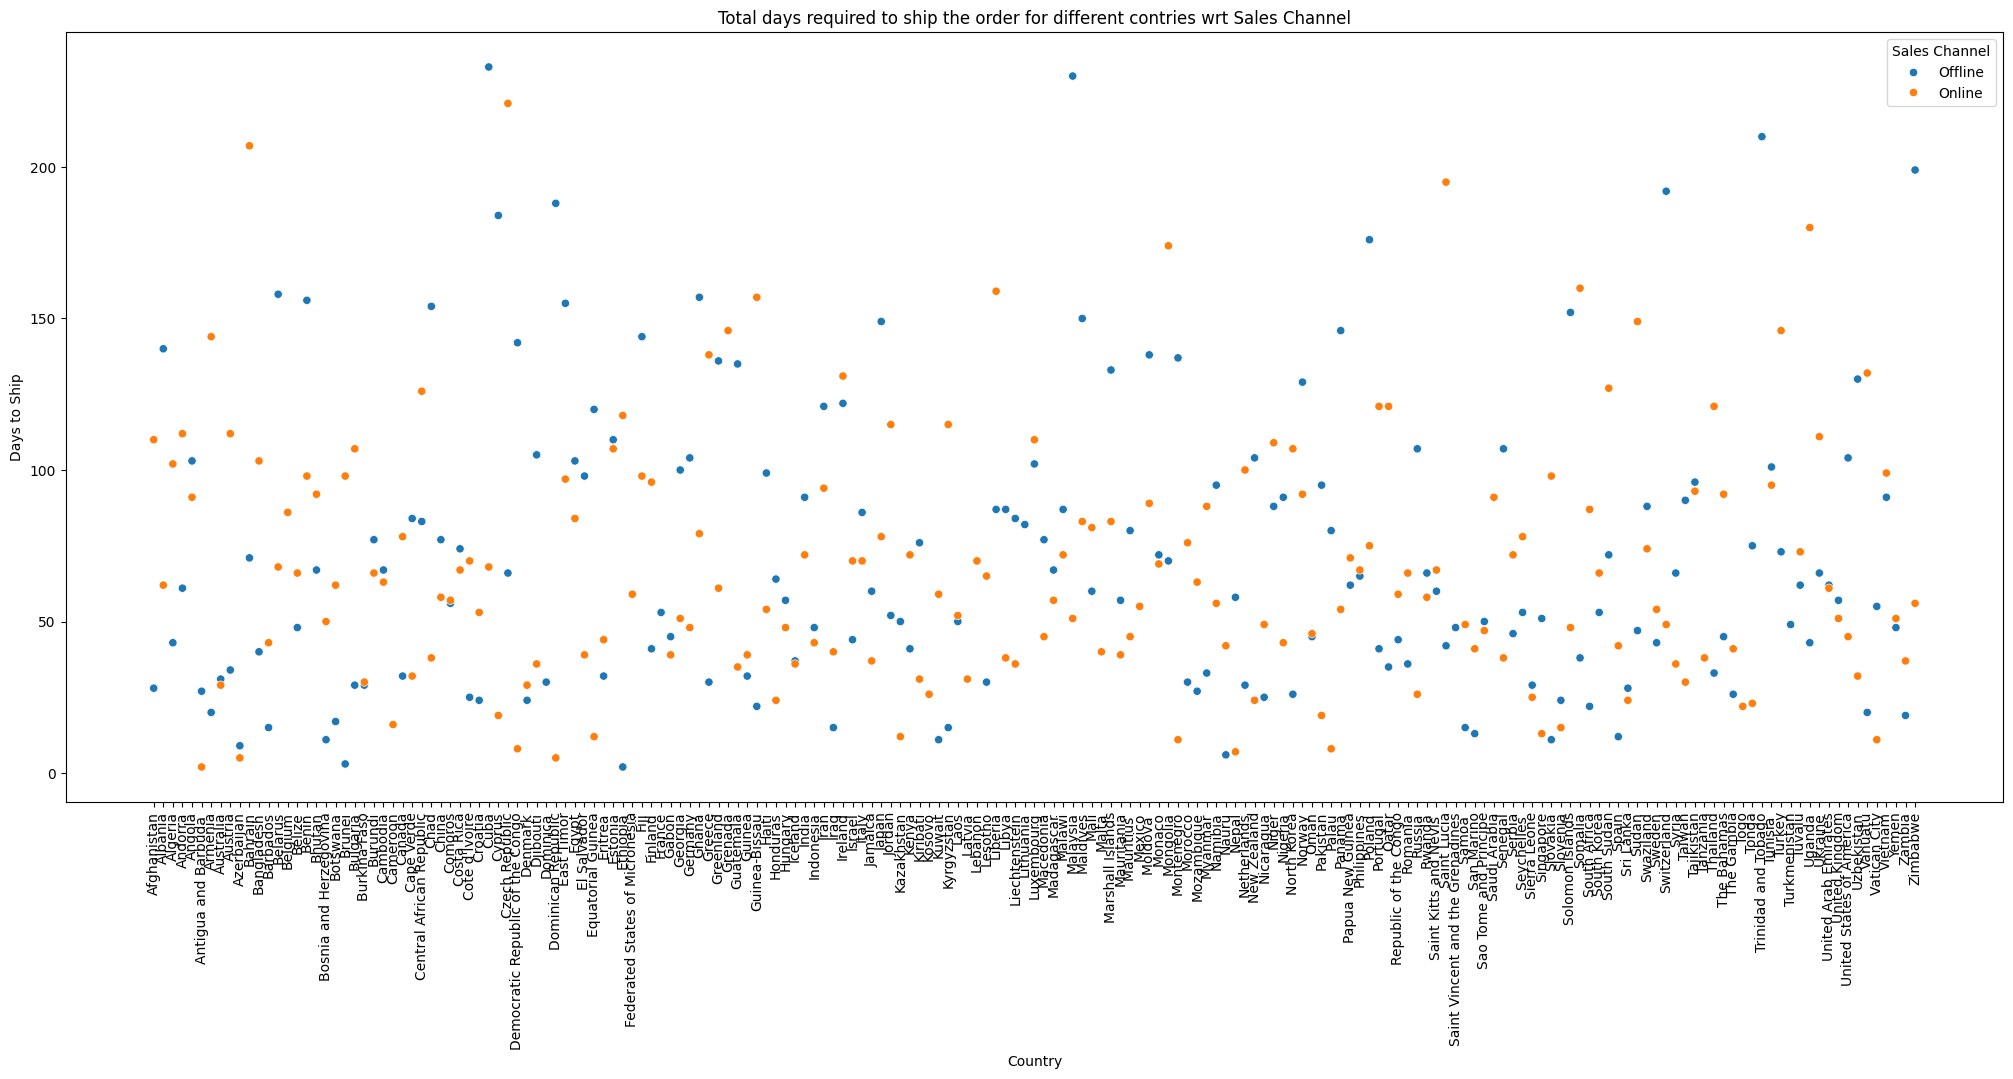

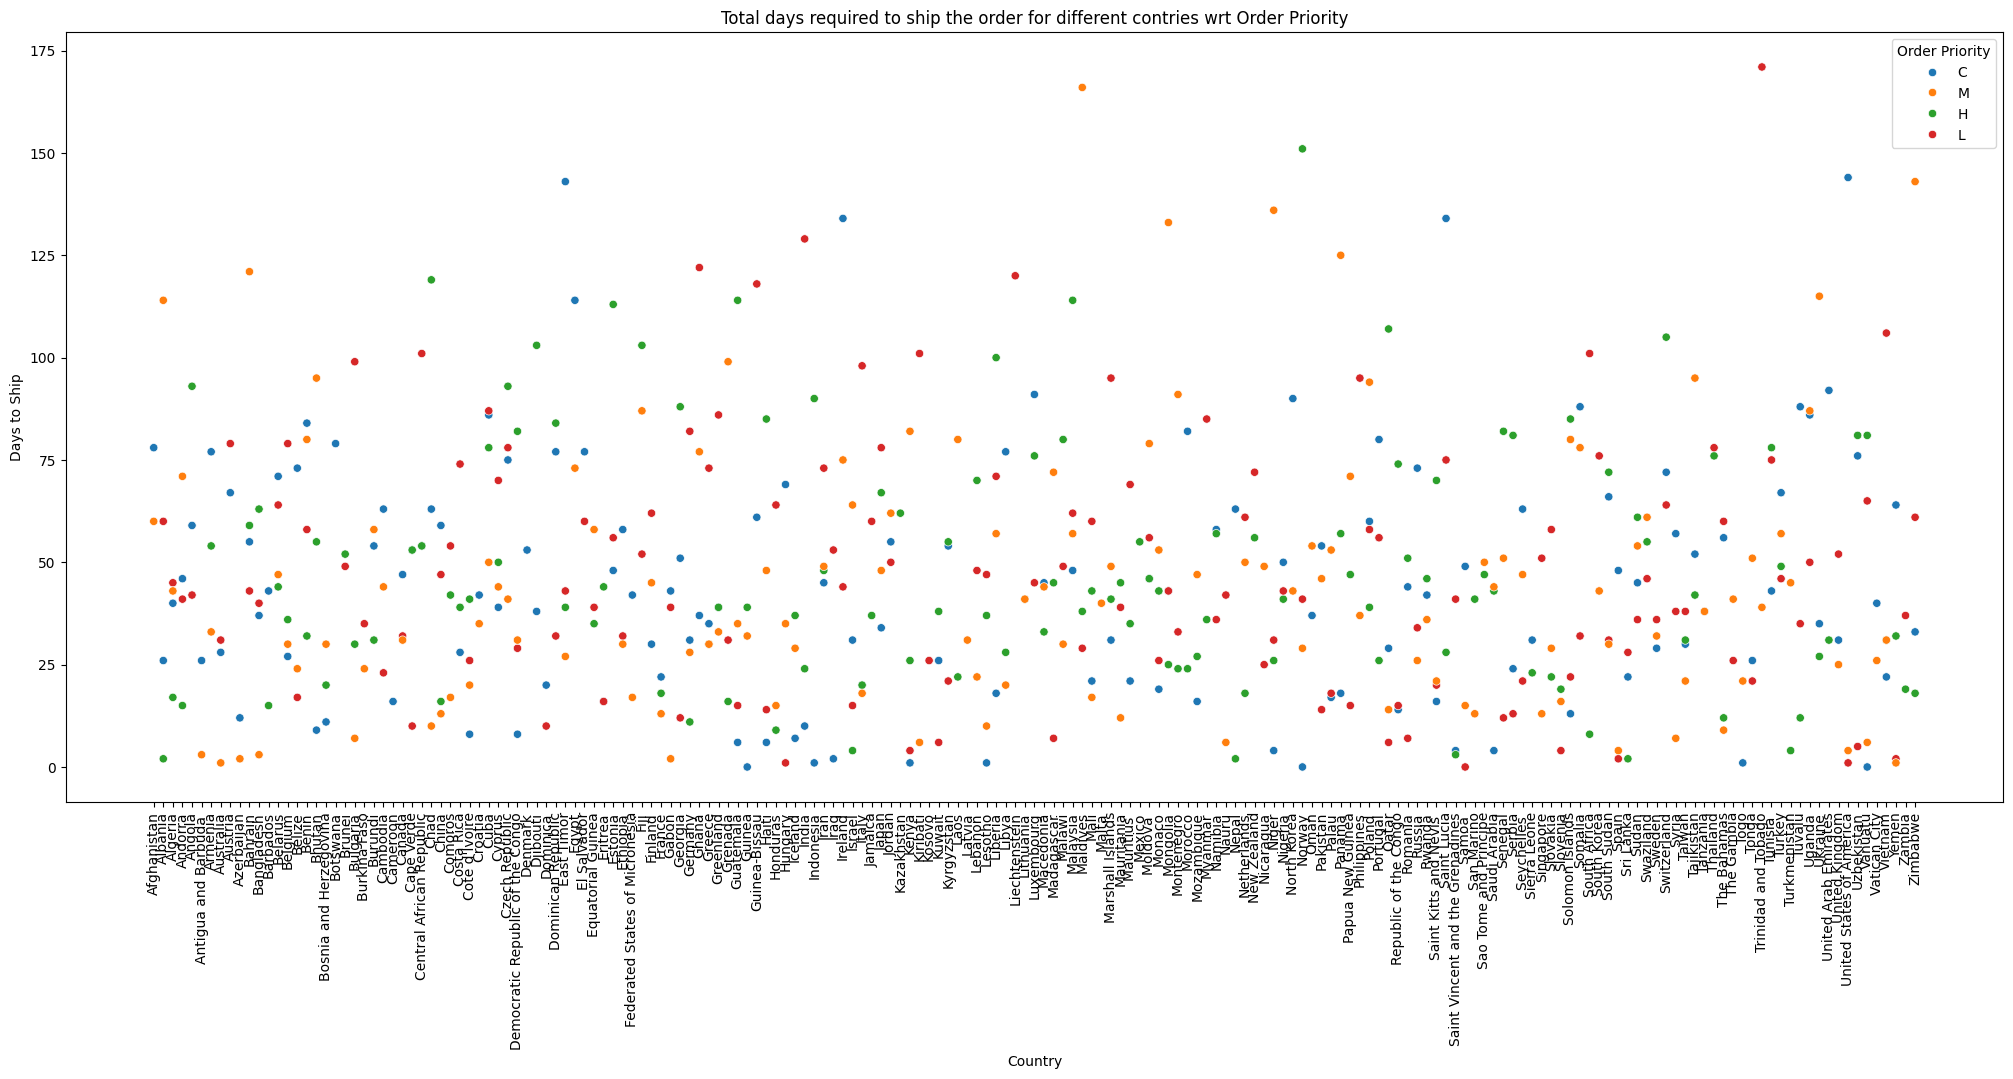

In [31]:
column_for_hue = ['Region',	'Item Type', 'Sales Channel', 'Order Priority']
for i in column_for_hue:
    totaldays_toship = df.groupby(['Country',i])['Days to Ship'].sum().reset_index()
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=totaldays_toship, x='Country',y='Days to Ship', hue=i)
    plt.xticks(rotation=90)
    plt.title(f'Total days required to ship the order for different contries wrt {i}')
    plt.legend(title=i)
    plt.show()